<font size=6><center> Machine Learning - Assignment 4 </center></font>

<font size=5><center> Reinforcement Learning </center></font>

<font size="4"><center>Author: Mohamed Amine DASSOULI </center></font>

<a id='1'></a>
# Importations

In [1]:
import numpy as np 
import math
import gym
import matplotlib.pyplot as plt
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=10, suppress=True)
from matplotlib import colors, rc
rc('font', weight='bold')

In [212]:
IMAGE_DIR = 'images/'  # output images directory


def plot_heatmap_policy(policy, V, rows, columns, pb=None, c_map=None):
    if pb.startswith("Frozen"):
        # Matrix
        data = np.zeros((rows,columns))
        for i in range(len(c_map)):
            for j in range(len(c_map[i])):
                if c_map[i][j]=='S':
                    data[i, j]=10
                elif c_map[i][j]=='G':
                    data[i, j]=20
                elif c_map[i][j]=='F':
                    data[i, j]=5
                    
        # Colormap
        cmap = colors.ListedColormap(['black', 'cyan', 'orange', 'green'])
        bounds = [0,4,9,14,19]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        plt.imshow(data, cmap=cmap, norm=norm)
        
        # Boundaries
        for i in range(rows+1):
            plt.arrow(-0.5+i, -0.5, 0, columns, linewidth=2)
        for j in range(columns+1):
            plt.arrow(-0.5, -0.5+j, rows, 0, linewidth=2)
            
        # Remove ticks
        plt.axis('off')
        
        # Add arrows
        for i in range(rows):
            for j in range(columns):
                if c_map[j][i] in ['F', 'S']:
                    state = j*columns + i
                    if policy[state]==0:
                        plt.arrow(i+0.2, j, -0.4, 0, ec='red', fc='red', head_width = 0.15, width=0.05)
                    elif policy[state]==1:
                        plt.arrow(i, j-0.2, 0, 0.4, ec='red', fc='red', head_width = 0.15, width=0.05)
                    elif policy[state]==2:
                        plt.arrow(i-0.2, j, 0.4, 0, ec='red', fc='red', head_width = 0.15, width=0.05)
                    else:
                        plt.arrow(i, j+0.2, 0, -0.4, ec='red', fc='red', head_width = 0.15, width=0.05)
        
        # Add values
        for i in range(rows):
            for j in range(columns):
                c = c_map[j][i]
                plt.text(i, j, c, va='center', ha='center', fontsize=24, color="white", fontweight='bold')
                

def plot_heatmap_value_function(V, rows, columns):
    sns.heatmap(V.reshape(rows, columns), annot=True, fmt='.3f', linewidths=.5)


def plot_value_convergence(convergence, iteration):
    """Plot helper.

        Args:
          x_axis (ndarray): x axis to plot over.
          y_axis (ndarray): y axis to plot.

        Returns:
          None.
        """
    plt.plot(np.arange(1, iteration + 1), convergence)


def plot_value_function(V, iteration, show_label=False, bar=False):
    """Plot helper.

        Args:
          x_axis (ndarray): x axis to plot over.
          y_axis (ndarray): y axis to plot.
          label (string): label.

        Returns:
          None.
        """
    if show_label:
        plt.plot(np.arange(1, len(V) + 1), V, label='iteration = {}'.format(iteration), color='orange')
    else:
        if not bar:
            plt.plot(np.arange(1, len(V) + 1), V, color='orange')
        else:
            plt.bar(np.arange(1, len(V)+1), V, width=0.3)


def plot_essentials(times, rewards=[], deltas=None, title="Mountain Car | Small | Policy Iteration | Time", save="images/essentials.png"):

    fig, ax1 = plt.subplots(figsize=(12,10))

    ax2 = ax1.twinx()
    ax1.plot(np.arange(1, len(times)+1), times, 'g-', label="time")
    if not deltas is None:
        ax1.plot(np.arange(1, len(times)+1), deltas, 'b-', label="delta")
        ax1.set_ylabel('Delta', {"fontsize":14})

    if rewards != []:
        ax1.bar(np.arange(1, len(times)+1), rewards, width=0.3, label="rewards", color="orange")
    
    ax1.set_xlabel('Iterations', {"fontsize":14})
    ax1.set_ylabel('Time Elapsed', {"fontsize":14})
    ax2.set_title(title, {"fontsize":18})
    ax1.legend(loc=2, fontsize=14)
    ax2.legend(loc=6, fontsize=14)
    plt.savefig(save)

    plt.show()
    

def plot_q_training(times, lr_values, eps_values,
                    title="Mountain Car | Large | Q-learning | Time, Learning Rate, Epsilon", save="images/essentials_q1.png"):

    fig, ax1 = plt.subplots(figsize=(12,10))

    ax2 = ax1.twinx()
    ax2.plot(np.arange(1, len(times)+1), times, 'g-', label="time")
    ax1.plot(np.arange(1, len(times)+1), lr_values, 'b-', label="learning rate")
    ax1.plot(np.arange(1, len(times)+1), eps_values, color="magenta", label="epsilon")
    
    ax1.set_xlabel('Iterations', {"fontsize":14})
    ax1.set_ylim(-0.02,1.02)
    ax2.set_ylabel('Time Elapsed', {"fontsize":14})
    ax2.set_title(title, {"fontsize":18})
    ax1.legend(loc=4, fontsize=14)
    ax2.legend(loc=7, fontsize=14)
    plt.savefig(save)

    plt.show()    
    

            
def plot_optimal_policy(policy):
    plt.bar(np.arange(0, len(policy)), policy, color='blue')


def save_figure(title):
    """Save Figure.

        Args:
          title (string): plot title.

        Returns:
          None.
        """
    plt.savefig(IMAGE_DIR + title)
    plt.close()


def set_plot_title_labels(title, x_label='', y_label='', legend=False):
    """Set plot title and labels.

        Args:
          title (string): plot title.
          x_label (string): x label.
          y_label (string): y label.

        Returns:
          None.
        """
    plt.title(title, {"fontsize": 18})
    plt.xlabel(x_label, {"fontsize": 14})
    plt.ylabel(y_label, {"fontsize": 14})

    if legend:
        plt.legend(loc='best')
        
def plot_policy_no_grid(optimal_policy, position_states, velocity_states, figsize=(16,8), title=""):
    positions = np.array([[p]*len(velocity_states) for p in position_states]).reshape(-1)
    #velocitys = np.array([[v]*len(position_states) for v in velocity_states]).reshape(-1)
    #positions = list(position_states[:])*len(velocity_states)
    velocitys = list(velocity_states[:])*len(position_states)
    actions = [np.argmax(i) for i in optimal_policy]
    color_map = {0: 'red', 1:'black', 2: 'cyan'}
    colors = [color_map[a] for a in actions]
    plt.figure(figsize=figsize)
    plt.scatter(positions, velocitys, c=colors, marker='o')
    plt.xlabel("Position", {"fontsize": 14})
    plt.ylabel("Velocity", {"fontsize": 14})
    plt.title(title, {"fontsize": 18})
    plt.savefig("images/tt.png")


In [3]:
def to_s(row, col, state_size):
    return row*state_size + col


def state_to_index(state, position_states, velocity_states, state_size):
    position, velocity = state

    idx1 = np.searchsorted(position_states, position)
    idx2 = np.searchsorted(velocity_states, velocity)

    return to_s(idx1, idx2, state_size)

def to_state(observation, discrete_states, num_bins):
        # turn the observation features into a space represented by an integer
        state = sum(np.digitize(feature, discrete_states[i]) * (num_bins ** i)
                    for i, feature in enumerate(observation))
        return state

In [12]:
class MDP:

    def __init__(self, environment, convergence_threshold=0.00001, gamma=0.9, 
                 max_iterations=1e4, grid=False, custom_map=None, state_size=20):
        self.env_name = environment
        if environment.startswith("Frozen"):
            self.env = gym.make(environment, desc=custom_map, is_slippery=False)
            self.grid = grid
            self.map = custom_map
            if custom_map:
                self.env.nrow = len(custom_map)
            print(self.env.render())
            
        else:
            self.env = self.adapting_env_to_discrete(state_size=state_size)
            self.grid = None
            self.state_size = state_size
        self.convergence_threshold = convergence_threshold
        self.gamma = gamma
        self.max_iterations = max_iterations
        self.optimal_policy = None
        self.optimal_policy_actions = None
        self.optimal_V = None
        


    def adapting_env_to_discrete(self, state_size=20):
        env = gym.make('MountainCar-v0')

        nA = env.action_space.n
        nS = state_size**2

        minimum_states_value = env.low
        maximum_states_value = env.high

        position_states = np.linspace(minimum_states_value[0], maximum_states_value[0], state_size).round(decimals=4)
        velocity_states = np.linspace(minimum_states_value[1], maximum_states_value[1], state_size).round(decimals=4)

        self.position_states = position_states
        self.velocity_states = velocity_states
        self.discrete_states = [
            self.position_states, self.velocity_states
        ]
        P = {s: {a: [] for a in range(nA)} for s in range(nS)}
        for i in range(state_size):
            for j in range(state_size):
                for action in range(nA):
                    # 2D to 1D
                    state = to_s(i, j, state_size)

                    position, velocity = position_states[i], velocity_states[j]
                    velocity += (action - 1) * env.force + math.cos(3 * position) * (-env.gravity)
                    velocity = np.clip(velocity, -env.max_speed, env.max_speed)
                    new_velocity = np.argmin([np.abs(x-velocity) for x in velocity_states])

                    position += velocity
                    position = np.clip(position, env.min_position, env.max_position)
                    new_position = np.argmin([np.abs(x-position) for x in position_states])

                    reward = np.abs(0.01*(velocity/env.max_speed))
                    done = False

                    if position >= env.goal_position:
                        reward = 1
                        done = True

                    P[state][action].append((1, to_s(new_position, new_velocity, state_size), reward, done))

        env.nA = nA
        env.nS = nS
        env.P = P

        return env
        
        
    
    def epsilon_greedy_policy(self, Q_current_state, epsilon):
        """ Epsilon-greedy policy

            Args:
                state  (np array):  State to act from

            Returns:
                action (int): action to take, random or action that maximizes Q(s,a)

            """
        # If acting randomly, take random action, otherwise take action that maximizes Q(s,a)
        if np.random.random() < epsilon:
            return np.random.randint(self.env.nA)
        else:
            return np.argmax(Q_current_state)

    def one_step_lookahead(self, state, V):

        # Initialize state-action value function at current state
        Q_current_state = np.zeros(self.env.nA)

        # For each possible action in the action space
        for action in range(self.env.nA):
            # For all next state we can end up in, starting from current state and taking current action
            for probability, next_state, reward, _ in self.env.P[state][action]:
                # Update state-action function at current state and action
                Q_current_state[action] += probability * (reward + self.gamma * V[next_state])

        return Q_current_state

    def play_optimal_policy(self):
        self.play_policy(self.optimal_policy)

    def play_policy(self, policy):

        print('\nPlay policy')

        state = self.env.reset()  # reset environment and get initial state
        accumulated_reward = 0.  # initialize accumulated reward
        t = 0  # initialize time

        # Play the episode until it is terminated
        while True:
            t += 1  # increase time
            self.env.render()  # render the environment

            if policy is not None:
                action = np.argmax(policy[state])  # choose an action following the policy
            else:
                action = self.env.action_space.sample()

            new_state, reward, done, _ = self.env.step(action)  # step to the new state
            accumulated_reward = reward + self.gamma * accumulated_reward  # update the accumulated reward
            print('\nt = {} | s, a, r, s1 = {}, {}, {}, {} | done ?= {}'.
                  format(t, state, action, reward, new_state, done))

            # If the episode is terminated
            if done:
                print('Episode terminated after {} timesteps'.format(t))
                break
            else:
                state = new_state

        self.env.render()  # render the environment last state

    def policy_evaluation(self, V, policy=None, iterations_to_save=[1], visualize=False):

        # Initialize iteration counter
        iteration, saving_index = 0, 0
        delta = 1000.
        deltas = []
        rewards = []
        times = []
        t0 = time.time()

        # Start iterating until the maximum number of iterations is reached or we have converged
        while iteration <= self.max_iterations and delta >= self.convergence_threshold:

            iteration += 1  # increase iteration
            delta = 0.  # reset delta of convergence

            # For all possible states in the state space
            for state in range(self.env.nS):
                # Save previous state value
                previous_V = V[state]

                if policy is not None:
                    # Iterative Policy Evaluation: update state value using the Bellman expectation equation
                    Q_current_state = self.one_step_lookahead(state, V)
                    V[state] = 0.
                    for action in range(self.env.nA):
                        V[state] += policy[state, action] * Q_current_state[action]
                else:
                    # Value Iteration: update state value using the Bellman optimality equation
                    V[state] = np.max(self.one_step_lookahead(state, V))

                # Update the delta of convergence to the maximum delta found so far
                delta = max(delta, np.abs(V[state] - previous_V))

                if visualize and policy is None and \
                   iteration == iterations_to_save[saving_index % len(iterations_to_save)]:
                    plot_value_function(V, iteration, show_label=True)
                    saving_index += 1
            t1 = time.time()
            #rewards.append(int(self.check_reward(V)))
            deltas.append(delta)
            times.append(t1-t0)
            t0 += time.time()-t1

        return iteration, deltas, rewards, times

    def policy_improvement(self, V, policy, policy_actions):

        improve_policy = False  # True if we need to continue improving the policy, False if we have converged

        # For each state
        for state in range(self.env.nS):

            # Save previous best action and compute new best action
            previous_best_action = np.argmax(policy[state])
            Q_current_state = self.one_step_lookahead(state, V)
            new_best_action = np.argmax(Q_current_state.round(decimals=4))
            # If policy has improved
            if previous_best_action != new_best_action:
                improve_policy = True  # we need to continue improving the policy

            # Set probability of new best action to 1 both we have improved or not
            # (if we have improved we change the policy accordingly, otherwise if
            # previous_best_action == new_best_action we reset previous_best_action
            # in the case it was originally a random policy and needed to be updated anyway)
            policy[state] = np.eye(self.env.nA)[new_best_action]
            policy_actions[state] = new_best_action

        return improve_policy

    def policy_iteration(self, iterations_to_save=[0], visualize=False):

        print('\nPolicy-iteration')

        # Initialize start time
        start = time.time()

        # Initialize iteration and improve policy flag
        iteration, saving_index = 0, 0
        improve_policy = True

        # Initialize state value function and random policy
        self.optimal_V = np.zeros(self.env.nS)
        self.optimal_policy = np.ones([self.env.nS, self.env.nA]) / self.env.nA
        self.optimal_policy_actions = np.zeros(self.env.nS, dtype=int)

        if visualize and iteration == iterations_to_save[saving_index % len(iterations_to_save)]:
            plt.figure(figsize=(10, 10))
            if self.grid:
                plot_heatmap_policy(self.optimal_policy_actions, self.optimal_V, self.env.nrow, self.env.ncol, 
                                    pb=self.env_name, c_map=self.map)
            else:
                plot_optimal_policy(self.optimal_policy_actions)

            set_plot_title_labels(title='PI - Policy at iteration = {}'.format(0))
            save_figure('{}_PI_policy_iter{}'.format(self.env_name, 0))
            saving_index += 1
        
        t0 = time.time()
        times = []
        #rewards = []

        # Start iterating until the maximum number of iterations is reached or we have converged
        while iteration <= self.max_iterations and improve_policy:
            
            iteration += 1  # increase iteration
            print('PI iteration {}'.format(iteration))

            # Evaluate current policy
            self.policy_evaluation(self.optimal_V, self.optimal_policy)

            # Improve current policy
            improve_policy = self.policy_improvement(self.optimal_V, self.optimal_policy, self.optimal_policy_actions)

            if visualize and iteration == iterations_to_save[saving_index % len(iterations_to_save)]:
                plt.figure(figsize=(10, 10))

                if self.grid:
                    plot_heatmap_policy(self.optimal_policy_actions, self.optimal_V, self.env.nrow, self.env.ncol, 
                                    pb=self.env_name, c_map=self.map)
                else:
                    plot_optimal_policy(self.optimal_policy_actions)

                set_plot_title_labels(title='PI - Policy at iteration = {}'.format(iteration))
                save_figure('{}_PI_policy_iter{}'.format(self.env_name, iteration))
                saving_index += 1
            times.append(time.time()-t0)
            #rewards.append(self.check_reward(self.optimal_V))
            

        if iteration < self.max_iterations:
            print('\n---> converged at iteration {} in {:.4f} seconds'.format(iteration, time.time() - start))
            print('\n---> optimal V = \n{}'.format(self.optimal_V))
            print('\n---> optimal policy = \n{}'.format(self.optimal_policy))
            print('\n---> optimal policy actions = \n{}'.format(self.optimal_policy_actions))
        else:
            print('---> not converged in {} iterations'.format(self.max_iterations))

        if visualize:
            plt.figure(figsize=(10, 10))

            if self.grid:
                plot_heatmap_value_function(self.optimal_V, self.env.nrow, self.env.ncol)
            else:
                plot_value_function(self.optimal_V, 0)

            set_plot_title_labels(title='PI - Optimal Value-function')
            save_figure('{}_PI_optimal_V'.format(self.env_name))
            
            plot_essentials(times)


    def value_iteration(self, iterations_to_save=[1], visualize=False):

        print('\nValue-iteration')

        # Initialize start time
        start = time.time()

        # Initialize state value function
        self.optimal_V = np.zeros(self.env.nS)

        # Compute the optimal state value function using policy evaluation, but with the Bellman optimality equation
        if visualize:
            plt.figure(figsize=(10, 10))

        iteration, deltas, rewards, times = self.policy_evaluation(self.optimal_V,
                                                   iterations_to_save=iterations_to_save,
                                                   visualize=visualize)
        
        if visualize:
            set_plot_title_labels(title='VI - Value-function through iterations',
                                        x_label='State', y_label='V estimate', legend=True)
            save_figure('{}_VI_iterations'.format(self.env_name))

            plt.figure(figsize=(10, 10))
            plot_value_convergence(deltas, iteration)
            set_plot_title_labels(title='VI - Value-function convergence',
                                        x_label='Iterations', y_label='V Delta')
            save_figure('{}_VI_convergence'.format(self.env_name))

        # Initialize optimal policy
        self.optimal_policy = np.zeros((self.env.nS, self.env.nA))
        self.optimal_policy_actions = np.zeros(self.env.nS, dtype=int)

        # For all possible states in the state space
        for state in range(self.env.nS):

            # Select best action based on the highest state-action value at current state
            Q_current_state = self.one_step_lookahead(state, self.optimal_V)
            best_action = np.argmax(Q_current_state.round(decimals=4))

            # Update the optimal policy to perform the best action at current state
            self.optimal_policy[state, best_action] = 1.0
            self.optimal_policy_actions[state] = best_action

        if iteration < self.max_iterations:
            print('\n---> converged at iteration {} in {:.4f} seconds'.format(iteration, times[-1]))
            print('\n---> optimal V = \n{}'.format(self.optimal_V))
            print('\n---> optimal policy = \n{}'.format(self.optimal_policy))
            print('\n---> optimal policy actions = \n{}'.format(self.optimal_policy_actions))
        else:
            print('---> not converged in {} iterations'.format(self.max_iterations))

        if visualize:

            plt.figure(figsize=(10, 10))

            if self.grid:
                print("zbi\n", self.optimal_V)
                plot_heatmap_value_function(self.optimal_V, self.env.nrow, self.env.ncol)
            else:
                print(self.optimal_V)
                plot_value_function(self.optimal_V, 0)

            set_plot_title_labels(title='VI - Optimal Value-function')
            save_figure('{}_VI_optimal_V'.format(self.env_name))

            plt.figure(figsize=(10, 10))

            if self.grid:
                plot_heatmap_policy(self.optimal_policy_actions, self.optimal_V, self.env.nrow, self.env.ncol, 
                                    pb=self.env_name, c_map=self.map)
            else:
                plot_optimal_policy(self.optimal_policy_actions)

            set_plot_title_labels(title='VI - Optimal Policy')
            save_figure('{}_VI_optimal_policy'.format(self.env_name))
                
            plt.figure(figsize=(10, 10))
            if self.grid:
                plt.figure(figsize=(10, 10))
                plot_value_function(rewards, 0, bar=True)
                set_plot_title_labels(title='VI - Rewards',
                                        x_label='Iterations', y_label='Reward')
            save_figure('{}_VI_rewards'.format(self.env_name))
            plot_essentials(times, rewards, deltas)
            
            
            
    def Q_learning(self, num_episodes=1000, learning_rate_decay=0.99, epsilon_decay=0.99, visualize=False, min_rate=0.01, lr=1):

        print('\nQ-Learning')

        # Initialize start time
        start = time.time()

        # Initialize list of accumulated rewards, the episode counter, the epsilon for exploration and the learning rate
        scores, average_scores = [], []
        episode = 0
        epsilon, learning_rate = 1, lr

        # Initialize state-action value function Q
        #Q = np.zeros((self.env.nS, self.env.nA))
        Q = np.random.uniform(low = -1, high = 1, 
                          size = (self.env.nS, self.env.nA))
        times = []
        lr_values = []
        eps_values = []
        t0 = time.time()
        #np.random.seed(42)
        # Play episodes until we have converged
        while True:

            score = 0.  # initialize the accumulated reward
            t = 0  # initialize the time
            episode += 1  # increase episode
            #self.env.seed(42)
            state = self.env.reset()  # reset environment and get initial state
            if not self.env_name.startswith("Frozen"):
                ind_state = to_state(state, self.discrete_states, self.state_size)
            # Play the episode until it is terminated
            
            while True:
                t += 1  # increase time
                # self.env.render()  # render the environment
                if self.env_name.startswith("Frozen"):
                    action = self.epsilon_greedy_policy(Q[state], epsilon)  # choose an action with an epsilon-greedy policy
                    new_state, reward, done, _ = self.env.step(action)  # step to the new state
                else:
                    action = self.epsilon_greedy_policy(Q[ind_state], epsilon)
                    new_state, reward, done, _ = self.env.step(action)
                    ind_new_state = to_state(new_state, self.discrete_states, self.state_size)
                    
                score += reward  # update the accumulated reward

                # print('\nt = {} | s, a, r, s1 = {}, {}, {}, {} | done ?= {}'.
                #       format(t, state, action, reward, new_state, done))

                # If the episode is terminated
                if done:
                    # Update Q at current state and action
                    if self.env_name.startswith("Frozen"):
                        Q[state, action] += learning_rate * (reward - Q[state, action])
                    else:
                        Q[ind_state, action] += learning_rate * (reward + self.gamma * np.max(Q[ind_new_state, :]) - Q[ind_state, action])
                    #print('Episode terminated after {} timesteps'.format(t))
                    #if t < 100:
                        #print(reward)
                    break
                else:
                    # Update Q at current state and action by bootstrapping next state
                    if self.env_name.startswith("Frozen"):
                        Q[state, action] += learning_rate * (reward + self.gamma * np.max(Q[new_state]) - Q[state, action])
                        state = new_state
                    else:
                        Q[ind_state, action] += learning_rate * (reward + self.gamma * np.max(Q[ind_new_state, :]) - Q[ind_state, action])
                        state = new_state
                        
                        
                        ind_state = ind_new_state
                    
            if (not self.env_name.startswith("Frozen")) and score >-200:
                print(score)
            scores.append(score)  # save the accumulated reward
            average_scores.append(np.mean(scores[-100:]))
            # self.env.render()  # render the environment last state

            if episode % 100 == 0:
                print('\nEpisode {}'.format(episode))
                print('average score = {}'.format(average_scores[-1]))
                print(epsilon)
                print(learning_rate)

            # If we have converged, break
            if episode > num_episodes:
                print('\n---> converged at episode {} in {:.4f} seconds'.format(episode, time.time() - start))
                break 

            epsilon = epsilon_decay * epsilon  # exponentially decay epsilon
            """
            if episode == 10000:
                learning_rate /= 10
            if episode == 30000:
                learning_rate /= 10
            """
            learning_rate = max(min_rate, learning_rate_decay * learning_rate)  # exponentially decay learning rate
            times.append(time.time()-t0)
            lr_values.append(learning_rate)
            eps_values.append(epsilon)
            # if episode % 10 == 0:
            #     print('epsilon = {:.4f}, lr = {:.4f}'.format(epsilon, learning_rate))

        # Initialize optimal policy and state value function
        self.optimal_V = np.zeros(self.env.nS)
        self.optimal_policy = np.zeros((self.env.nS, self.env.nA))
        self.optimal_policy_actions = np.zeros(self.env.nS, dtype=int)

        # For all possible states in the state space
        for state in range(self.env.nS):
            # Select best action and best value based on the highest state-action value at current state
            if self.env_name.startswith("Frozen"):
                best_action = np.argmax(Q[state])
                best_value = np.max(Q[state])

                # Update the optimal state value and policy to perform the best action at current state
                self.optimal_policy[state, best_action] = 1.0
                self.optimal_V[state] = best_value
                self.optimal_policy_actions[state] = best_action
            else:
                best_action = np.argmax(Q[state])
                best_value = np.max(Q[state])

                # Update the optimal state value and policy to perform the best action at current state
                self.optimal_policy[state, best_action] = 1.0
                self.optimal_V[state] = best_value
                self.optimal_policy_actions[state] = best_action
            

        print('\n---> optimal Q = \n{}'.format(Q))
        print('\n---> optimal V = \n{}'.format(self.optimal_V))
        print('\n---> optimal policy = \n{}'.format(self.optimal_policy))
        print('\n---> time t = \n{}'.format(times[-1]))

        if visualize:

            plt.figure(figsize=(10, 10))
            plot_value_function(average_scores, 0)
            set_plot_title_labels(title='Q-Learning - Average reward over the 100 last episodes',
                                        x_label='Episodes')
            save_figure('{}_QL_accumulated_reward'.format(self.env_name))

            plt.figure(figsize=(10, 10))

            if self.grid:
                plot_heatmap_value_function(self.optimal_V, self.env.nrow, self.env.ncol)
            else:
                plot_value_function(self.optimal_V, 0)

            set_plot_title_labels(title='Q-Learning - Optimal State-Value-function')
            save_figure('{}_QL_optimal_V'.format(self.env_name))

            plt.figure(figsize=(10, 10))

            if self.grid:
                plot_heatmap_policy(self.optimal_policy_actions, self.optimal_V, self.env.nrow, self.env.ncol, 
                                    pb=self.env_name, c_map=self.map)
            else:
                plot_optimal_policy(self.optimal_policy_actions)

            set_plot_title_labels(title='Q-Learning - Optimal Policy')
            save_figure('{}_QL_optimal_policy'.format(self.env_name))
            
            
            plt.figure(figsize=(10, 10))
            plot_value_function(times, 0)
            set_plot_title_labels(title='Q-Learning - Wall Clock Time',
                                        x_label='Episodes', y_label='Time Elapsed')
            save_figure('{}_QL_time_elapsed'.format(self.env_name))
            
            plot_q_training(times, lr_values, eps_values)
            
            return scores, average_scores

    def check_reward(self, V):
        if self.env_name.startswith("Frozen"):
            # Initialize optimal policy
            #policy = np.zeros((self.env.nS, self.env.nA))
            policy_actions = np.zeros(self.env.nS, dtype=int)

            # For all possible states in the state space
            for state in range(self.env.nS):
                # Select best action based on the highest state-action value at current state
                Q_current_state = self.one_step_lookahead(state, V)
                # Update the optimal policy to perform the best action at current state
                #policy[state, best_action] = 1.0
                policy_actions[state] = np.argmax(Q_current_state.round(decimals=4))
            
            
            state = self.env.reset()
            done = False
            while not done:
                state, reward, done, _ = self.env.step(policy_actions[state])
            if reward == 1: 
                return True
            else:
                return False
            
        else:
            
            #policy = np.zeros((self.env.nS, self.env.nA))
            policy_actions = np.zeros(self.env.nS, dtype=int)

            # For all possible states in the state space
            for state in range(self.env.nS):
                # Select best action based on the highest state-action value at current state
                Q_current_state = self.one_step_lookahead(state, V)
                # Update the optimal policy to perform the best action at current state
                #policy[state, best_action] = 1.0
                policy_actions[state] = np.argmax(Q_current_state.round(decimals=4))
            
            
            r = []

            for _ in range(10):
                state = self.env.reset()
                r_tot = 0
                while True:
                    ind_s = to_state(state, self.discrete_states, self.state_size)
                    state, reward, done, _ = self.env.step(policy_actions[ind_s])
                    r_tot -= 1
                    if done:
                        r.append(r_tot)
                        r_tot = 0
                        break
            print(np.mean(r))
            return np.mean(r)
            
                

<a id='1'></a>
# Frozen Lake

In [184]:
c_map = [
    'SFFF',
    'FHFH',
    'FFFH',
    'HFFG']
frozen_lake_s = MDP(environment='FrozenLake-v0', convergence_threshold=0.001, grid=True, custom_map=c_map)



SFFF
FHFH
FFFH
HFFG
None


In [6]:
c_map = [
    'SFFFFFHF',
    'FFFFFHFF',
    'FFFFFFFF',
    'FFFFFFFF',
    'FHFFHFFH',
    'FFHFFFFF',
    'HFFFFFFF',
    'HFFFFFHG']
frozen_lake_m = MDP(environment='FrozenLake-v0', convergence_threshold=0.0001, grid=True, custom_map=c_map)



SFFFFFHF
FFFFFHFF
FFFFFFFF
FFFFFFFF
FHFFHFFH
FFHFFFFF
HFFFFFFF
HFFFFFHG
None


In [7]:
c_map = [
    'SFFFFFHFFFFHFFFF',
    'FFFFFHFFFFFFFHFF',
    'FFFFFFFFFHFFHFFF',
    'FFFFFFFFFFFFFFFF',
    'FHFFHFFHFFFFFFHF',
    'FFHFFFFFFFFFFFFF',
    'HFFFFFFFHHFFFFFF',
    'HFFFFFHFFFFFFFFF',
    'FFFFFFFFFFFFFFFF',
    'FFFFFFHFFFFFFFFF',
    'FFFHFFFFFFFFHFFF',
    'HFFFFFHHFFFFFFFF',
    'FFFFFFHHFFFFHFFF',
    'FFFHFFHHFFFFFFFH',
    'FFFFFFFFFFFFFFFF',
    'HHHHHFFFFFFFFFFG',]
frozen_lake_l = MDP(environment='FrozenLake-v0', convergence_threshold=0.0001, grid=True, custom_map=c_map)


SFFFFFHFFFFHFFFF
FFFFFHFFFFFFFHFF
FFFFFFFFFHFFHFFF
FFFFFFFFFFFFFFFF
FHFFHFFHFFFFFFHF
FFHFFFFFFFFFFFFF
HFFFFFFFHHFFFFFF
HFFFFFHFFFFFFFFF
FFFFFFFFFFFFFFFF
FFFFFFHFFFFFFFFF
FFFHFFFFFFFFHFFF
HFFFFFHHFFFFFFFF
FFFFFFHHFFFFHFFF
FFFHFFHHFFFFFFFH
FFFFFFFFFFFFFFFF
HHHHHFFFFFFFFFFG
None


<a id='1'></a>
# Value Iteration


Value-iteration

---> converged at iteration 7 in 0.0297 seconds

---> optimal V = 
[0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]

---> optimal policy = 
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

---> optimal policy actions = 
[1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
zbi
 [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]


<Figure size 720x720 with 0 Axes>

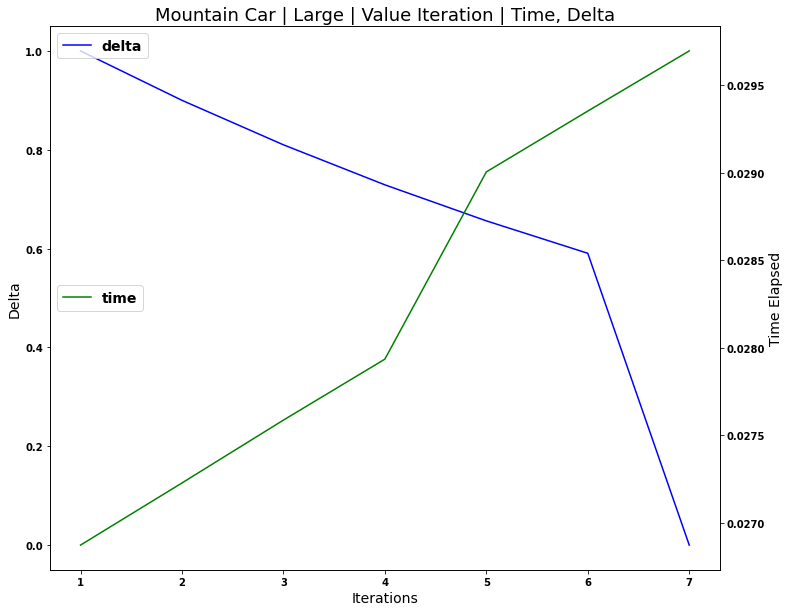

In [185]:
frozen_lake_s.value_iteration(iterations_to_save=[1, 5, 10, 15, 20, 25, 30, 35], visualize=True)


Value-iteration

---> converged at iteration 15 in 0.8875 seconds

---> optimal V = 
[0.2541865828 0.2824295365 0.3138105961 0.3486784401 0.387420489
 0.3486784401 0.           0.43046721   0.2824295365 0.3138105961
 0.3486784401 0.387420489  0.43046721   0.           0.531441
 0.4782969    0.3138105961 0.3486784401 0.387420489  0.43046721
 0.4782969    0.531441     0.59049      0.531441     0.3486784401
 0.387420489  0.43046721   0.4782969    0.531441     0.59049
 0.6561       0.59049      0.387420489  0.           0.4782969
 0.531441     0.           0.6561       0.729        0.
 0.43046721   0.4782969    0.           0.59049      0.6561
 0.729        0.81         0.9          0.           0.531441
 0.59049      0.6561       0.729        0.81         0.9
 1.           0.           0.4782969    0.531441     0.59049
 0.6561       0.729        0.           0.          ]

---> optimal policy = 
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1

<Figure size 720x720 with 0 Axes>

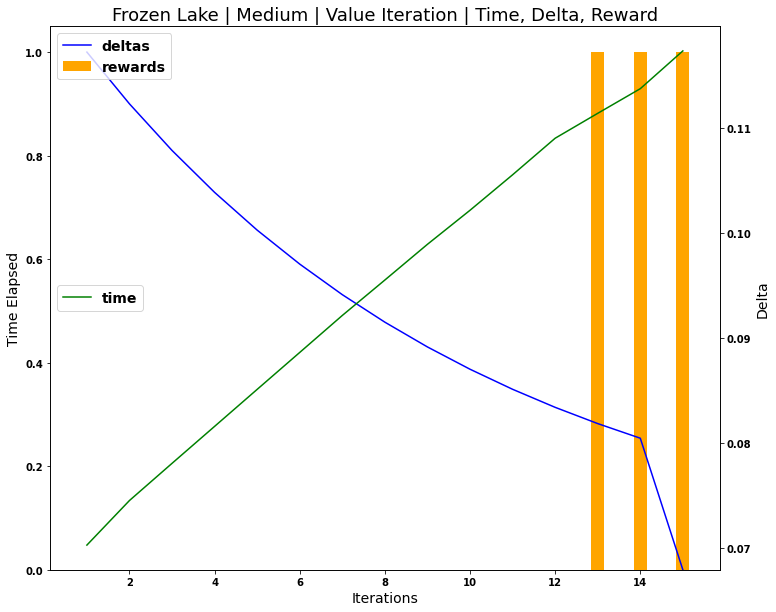

In [700]:
frozen_lake_m.value_iteration(iterations_to_save=[1], visualize=True)


Value-iteration

---> converged at iteration 31 in 0.6837 seconds

---> optimal V = 
[0.047101287  0.0523347633 0.058149737  0.0646108189 0.0717897988
 0.0646108189 0.           0.0984770902 0.1094189891 0.1215766546
 0.1350851718 0.           0.1350851718 0.1500946353 0.166771817
 0.1853020189 0.0523347633 0.058149737  0.0646108189 0.0717897988
 0.0797664431 0.           0.0984770902 0.1094189891 0.1215766546
 0.1350851718 0.1500946353 0.166771817  0.1500946353 0.
 0.1853020189 0.2058911321 0.058149737  0.0646108189 0.0717897988
 0.0797664431 0.0886293812 0.0984770902 0.1094189891 0.1215766546
 0.1350851718 0.           0.166771817  0.1853020189 0.
 0.2287679245 0.2058911321 0.2287679245 0.0646108189 0.0717897988
 0.0797664431 0.0886293812 0.0984770902 0.1094189891 0.1215766546
 0.1350851718 0.1500946353 0.166771817  0.1853020189 0.2058911321
 0.2287679245 0.2541865828 0.2287679245 0.2541865828 0.0717897988
 0.           0.0886293812 0.0984770902 0.           0.1215766546
 0.13508517

<Figure size 720x720 with 0 Axes>

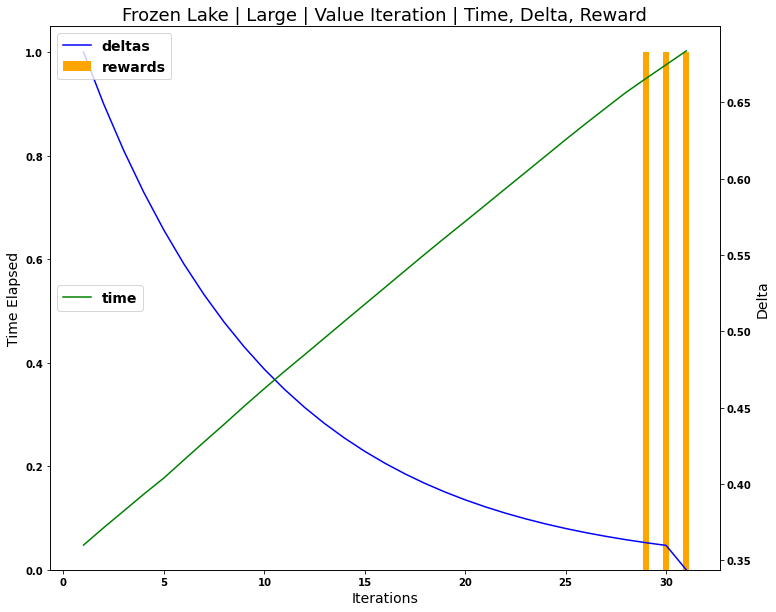

In [710]:
frozen_lake_l.value_iteration(iterations_to_save=[1], visualize=True)

<a id='1'></a>
# Policy iteration


Policy-iteration
PI iteration 1
PI iteration 2

---> converged at iteration 2 in 0.2727 seconds

---> optimal V = 
[0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]

---> optimal policy = 
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

---> optimal policy actions = 
[1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]


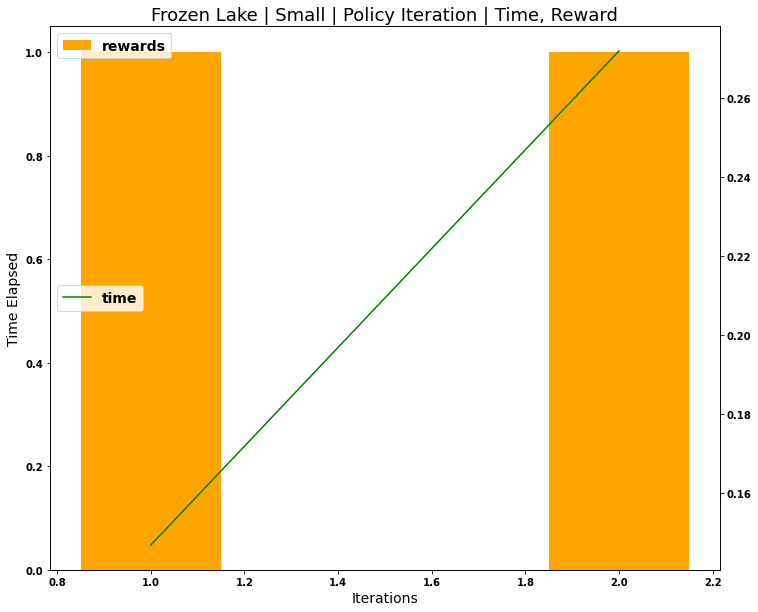

In [832]:
frozen_lake_s.policy_iteration(iterations_to_save=[1, 2], visualize=True)


Policy-iteration
PI iteration 1
PI iteration 2
PI iteration 3
PI iteration 4

---> converged at iteration 4 in 0.3748 seconds

---> optimal V = 
[0.2541865828 0.2824295365 0.3138105961 0.3486784401 0.387420489
 0.3486784401 0.           0.43046721   0.2824295365 0.3138105961
 0.3486784401 0.387420489  0.43046721   0.           0.531441
 0.4782969    0.3138105961 0.3486784401 0.387420489  0.43046721
 0.4782969    0.531441     0.59049      0.531441     0.3486784401
 0.387420489  0.43046721   0.4782969    0.531441     0.59049
 0.6561       0.59049      0.387420489  0.           0.4782969
 0.531441     0.           0.6561       0.729        0.
 0.43046721   0.4782969    0.           0.59049      0.6561
 0.729        0.81         0.9          0.           0.531441
 0.59049      0.6561       0.729        0.81         0.9
 1.           0.           0.4782969    0.531441     0.59049
 0.6561       0.729        0.           0.          ]

---> optimal policy = 
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0

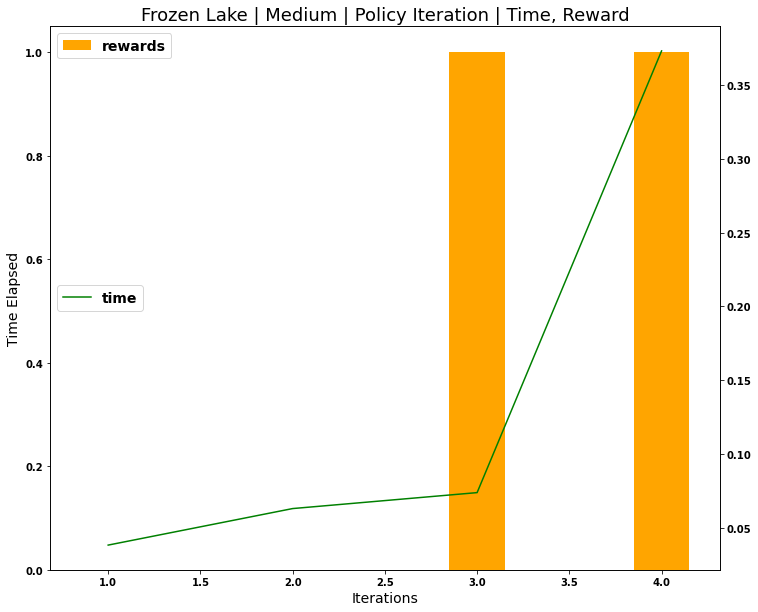

In [837]:
frozen_lake_m.policy_iteration(iterations_to_save=[4], visualize=True)


Policy-iteration
PI iteration 1
PI iteration 2
PI iteration 3
PI iteration 4
PI iteration 5
PI iteration 6
PI iteration 7
PI iteration 8
PI iteration 9
PI iteration 10
PI iteration 11
PI iteration 12
PI iteration 13
PI iteration 14
PI iteration 15
PI iteration 16
PI iteration 17
PI iteration 18

---> converged at iteration 18 in 1.9819 seconds

---> optimal V = 
[0.047101287  0.0523347633 0.058149737  0.0646108189 0.0717897988
 0.0646108189 0.           0.0984770902 0.1094189891 0.1215766546
 0.1350851718 0.           0.1350851718 0.1500946353 0.166771817
 0.1853020189 0.0523347633 0.058149737  0.0646108189 0.0717897988
 0.0797664431 0.           0.0984770902 0.1094189891 0.1215766546
 0.1350851718 0.1500946353 0.166771817  0.1500946353 0.
 0.1853020189 0.2058911321 0.058149737  0.0646108189 0.0717897988
 0.0797664431 0.0886293812 0.0984770902 0.1094189891 0.1215766546
 0.1350851718 0.           0.166771817  0.1853020189 0.
 0.2287679245 0.2058911321 0.2287679245 0.0646108189 0.071789

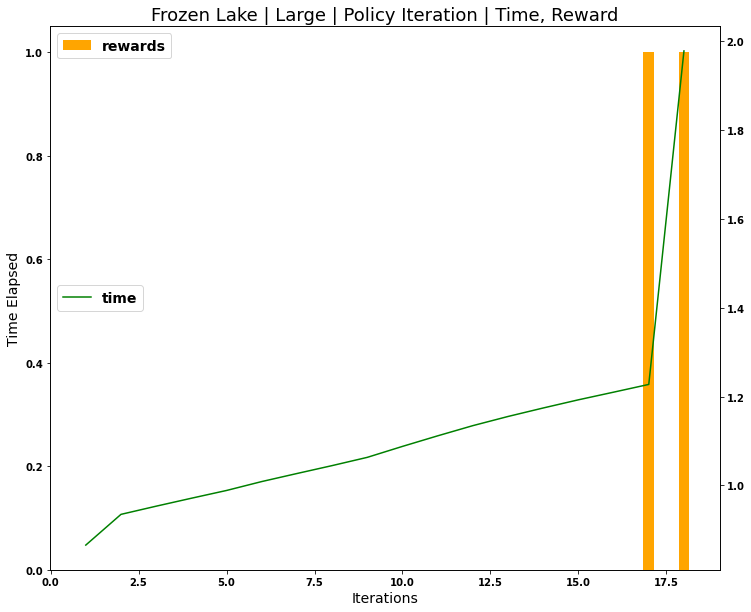

In [829]:
frozen_lake_l.policy_iteration(iterations_to_save=[1, 18], visualize=True)

# Q-learning


Q-Learning

Episode 100
average score = 0.12
0.6088145090359074
0.3622791379834671

Episode 200
average score = 0.48
0.36880183088056995
0.3277873191105649

Episode 300
average score = 0.67
0.22340924607110255
0.29657939225469465

Episode 400
average score = 0.71
0.1353347165085562
0.26834270510780406

Episode 500
average score = 0.88
0.08198177029173696
0.24279437231679107

Episode 600
average score = 0.97
0.04966213277390804
0.21967844143563475

Episode 700
average score = 0.94
0.030083851847510768
0.19876332870114102

Episode 800
average score = 0.97
0.018223908064988973
0.1798394989429732

Episode 900
average score = 1.0
0.011039504743095268
0.1627173663844663

Episode 1000
average score = 0.98
0.00668740560686628
0.14722539530368936

Episode 1100
average score = 1.0
0.004051032613461926
0.13320838152648978

Episode 1200
average score = 1.0
0.002453995794495004
0.12052589753489487

Episode 1300
average score = 1.0
0.001486558103577649
0.10905088561340444

Episode 1400
average scor

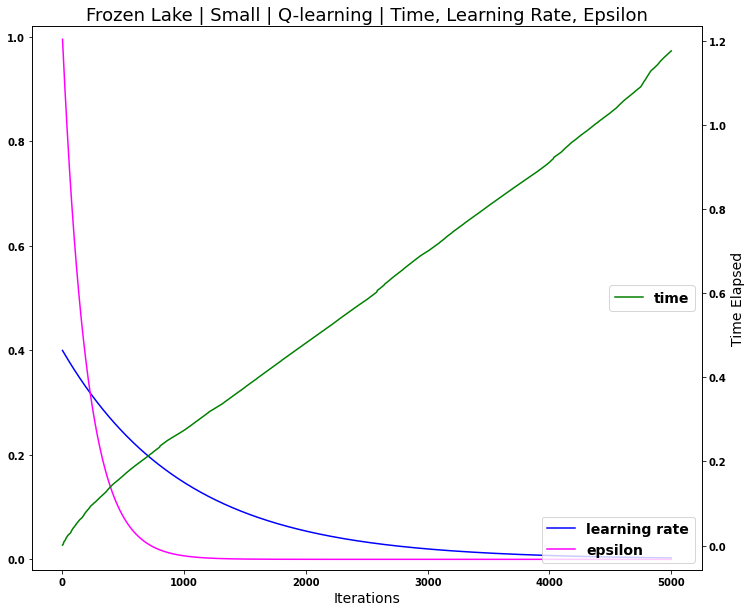

In [1036]:
frozen_lake_s.Q_learning(num_episodes=5000, learning_rate_decay=0.999, epsilon_decay=0.995, lr=0.4, min_rate=0.0001, 
                        visualize=True)


Q-Learning

Episode 100
average score = 0.02
0.6088145090359074
0.3622791379834671

Episode 200
average score = 0.2
0.36880183088056995
0.3277873191105649

Episode 300
average score = 0.68
0.22340924607110255
0.29657939225469465

Episode 400
average score = 0.75
0.1353347165085562
0.26834270510780406

Episode 500
average score = 0.92
0.08198177029173696
0.24279437231679107

Episode 600
average score = 0.96
0.04966213277390804
0.21967844143563475

Episode 700
average score = 0.96
0.030083851847510768
0.19876332870114102

Episode 800
average score = 0.99
0.018223908064988973
0.1798394989429732

Episode 900
average score = 0.97
0.011039504743095268
0.1627173663844663

Episode 1000
average score = 0.99
0.00668740560686628
0.14722539530368936

Episode 1100
average score = 1.0
0.004051032613461926
0.13320838152648978

Episode 1200
average score = 1.0
0.002453995794495004
0.12052589753489487

Episode 1300
average score = 1.0
0.001486558103577649
0.10905088561340444

Episode 1400
average scor

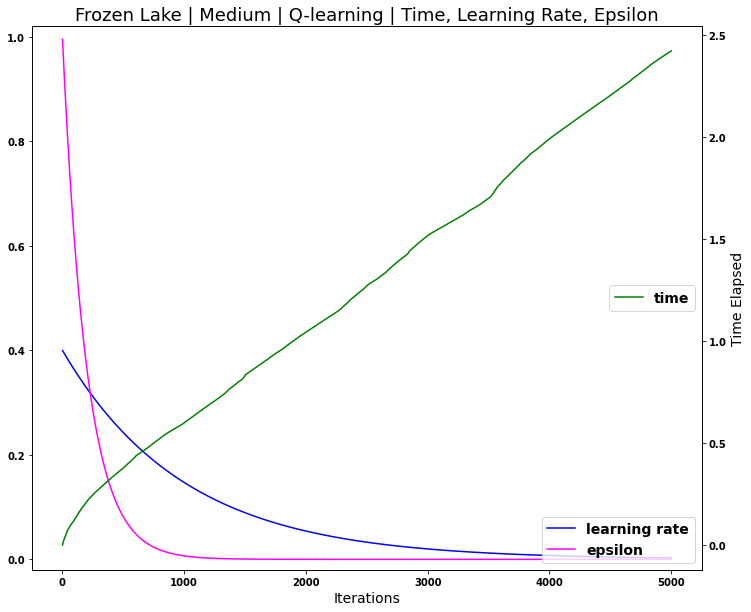

In [1040]:
frozen_lake_m.Q_learning(num_episodes=5000, learning_rate_decay=0.999, epsilon_decay=0.995, lr=0.4, min_rate=0.0001, 
                        visualize=True)


Q-Learning

Episode 100
average score = 0.0
0.9516933769307994
0.39605934141068966

Episode 200
average score = 0.0
0.9052674235521029
0.3921182890461936

Episode 300
average score = 0.0
0.8611062428400729
0.38821645275897626

Episode 400
average score = 0.0
0.8190993535905904
0.38435344232313484

Episode 500
average score = 0.0
0.7791416641455342
0.380528871395772

Episode 600
average score = 0.0
0.7411332094774175
0.37674235747835827

Episode 700
average score = 0.0
0.7049789010996835
0.37299352187847706

Episode 800
average score = 0.0
0.6705882891769959
0.36928198967195186

Episode 900
average score = 0.0
0.6378753362403742
0.36560738966535006

Episode 1000
average score = 0.0
0.6067582019410674
0.3619693543588584

Episode 1100
average score = 0.0
0.5771590383046616
0.35836751990953053

Episode 1200
average score = 0.0
0.5490037949732016
0.3548015260948977

Episode 1300
average score = 0.0
0.5222220339480774
0.35127101627694285

Episode 1400
average score = 0.0
0.49674675337021873


Episode 11400
average score = 1.0
0.003342870699968475
0.12793310988551054

Episode 11500
average score = 0.99
0.003179797211143476
0.12666009083888013

Episode 11600
average score = 0.98
0.0030246788498553595
0.12539973917362235

Episode 11700
average score = 1.0
0.0028771275453356405
0.12415192884091528

Episode 11800
average score = 0.98
0.0027367741578663562
0.12291653504620645

Episode 11900
average score = 1.0
0.002603267555276678
0.12169343423673157

Episode 12000
average score = 0.99
0.002476273734490283
0.120482504089158

---> converged at episode 12001 in 10.5260 seconds

---> optimal Q = 
[[ 0.0423911583  0.047101287   0.047101287   0.0423911583]
 [ 0.0423911583  0.0523347633  0.0523347633  0.047101287 ]
 [ 0.047101287   0.058149737   0.058149737   0.0523347633]
 ...
 [ 0.490377927   0.4714812488  0.8999551822  0.729       ]
 [ 0.644555457   0.6973927876  1.            0.7288612225]
 [-0.5932283713 -0.1787653016 -0.5283393195  0.9815767432]]

---> optimal V = 
[ 0.047101287

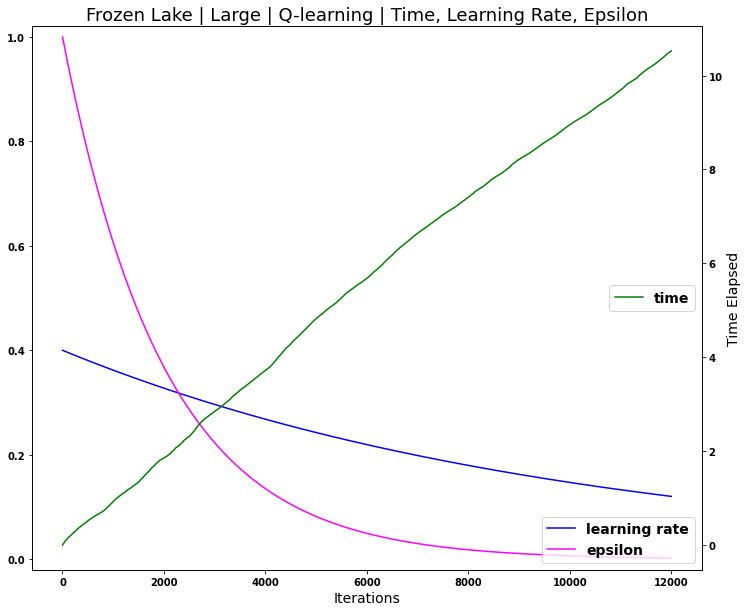

In [1043]:
frozen_lake_l.Q_learning(num_episodes=12000, learning_rate_decay=0.9999, epsilon_decay=0.9995, lr=0.4, min_rate=0.0001, 
                        visualize=True)

<a id='1'></a>
# Mountain Car

In [220]:
mountain_car_s = MDP(environment='MC', state_size=10, gamma=0.9, convergence_threshold=0.0000001)

In [241]:
mountain_car_l = MDP(environment='MC', state_size=25, gamma=0.9, convergence_threshold=0.1)

<a id='1'></a>
# Value Iteration


Value-iteration

---> converged at iteration 133 in 0.7374 seconds

---> optimal V = 
[0.0982257822 0.0759400862 0.0537972472 0.0315115512 0.0093687123
 0.0157741243 0.0379169632 0.0602026592 0.0823454982 0.0999999179
 0.0978928036 0.0756071076 0.0534642686 0.0311785726 0.0090357337
 0.0161071028 0.0382499418 0.0605356378 0.0826784768 0.0999999179
 0.0987949414 0.0765092454 0.0543664064 0.0320807104 0.0099378714
 0.0152049651 0.037347804  0.0596335    0.081776339  0.0999999179
 0.0999999179 0.0783313568 0.0561885178 0.0339028218 0.0117599829
 0.0133828536 0.0355256926 0.0578113886 0.0799542276 0.0999999179
 0.0999999179 0.080436926  0.058294087  0.036008391  0.013865552
 0.0112772845 0.0334201234 0.0557058194 0.0778486584 0.0999999179
 0.0999999179 0.082090417  0.059947578  0.037661882  0.015519043
 0.0096237935 0.0317666324 0.0540523284 0.0761951674 0.0984808634
 0.0999999179 0.0827142178 0.0605713789 0.0382856829 0.0161428439
 0.0089999926 0.0311428316 0.0534285276 0.0755713665 0.09

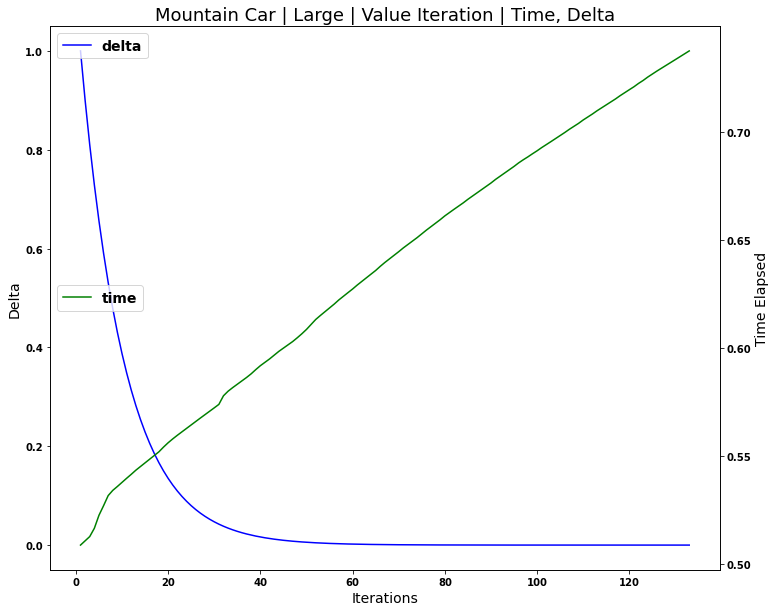

In [199]:
mountain_car_s.value_iteration(iterations_to_save=[1], visualize=True)

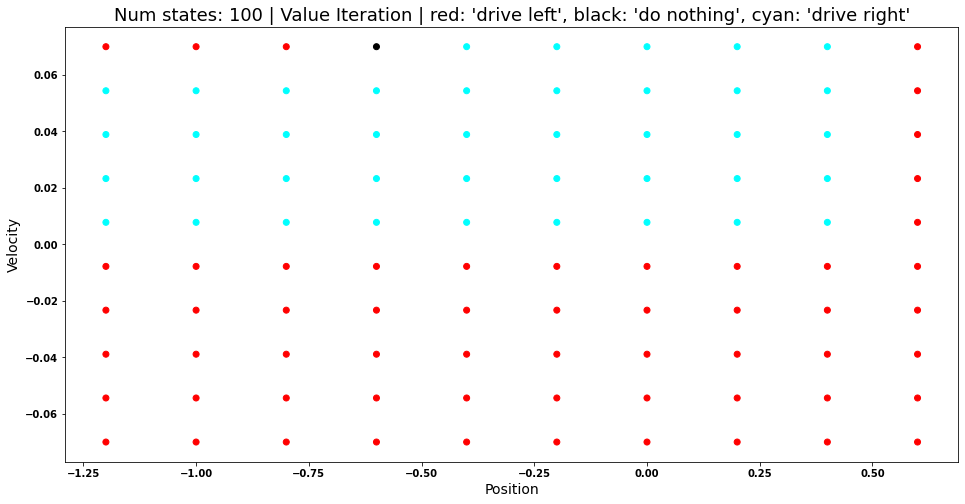

In [921]:
plot_policy_no_grid(mountain_car_s.optimal_policy, mountain_car_s.position_states, mountain_car_s.velocity_states, figsize=(16,8))

In [922]:
r = []

for _ in range(100):
    state = mountain_car_s.env.reset()
    r_tot = 0
    while True:
        #mountain_car_s.env.render()
        #ind_s = to_state(state, fr.discrete_states, 16)
        ind_s = state_to_index(state, mountain_car_s.position_states, 
                               mountain_car_s.velocity_states, mountain_car_s.state_size)
        a = np.argmax(mountain_car_s.optimal_policy[ind_s])
        state, reward, done, _ = mountain_car_s.env.step(a)
        r_tot -= 1
        if done:
            r.append(r_tot)
            r_tot = 0
            break
    #mountain_car_s.env.close()
print("avg:", np.mean(r))

avg: -156.56



Value-iteration

---> converged at iteration 45 in 0.9385 seconds

---> optimal V = 
[0.1180161545 0.1302302734 0.1447221515 0.1617607463 0.1816131532
 0.204592018  0.2310605979 0.2613907661 0.2960115879 0.3354156756
 0.3801186302 0.4307092147 0.4878574832 0.5512470208 0.6207592055
 0.6970584583 0.780914771  0.8731678168 0.9747346931 0.9783891685
 0.9815013793 0.984003991  0.985857287  0.9870045743 0.9873700177
 0.1267169303 0.1389310492 0.1534229274 0.1704615222 0.1903139291
 0.2312262384 0.2606843847 0.2943362933 0.3326479378 0.3761529396
 0.4254124654 0.4810659067 0.5438395717 0.6134191329 0.6898091215
 0.7737503787 0.8660978073 0.9677854264 1.0798351618 1.0866661429
 1.0898060362 1.0923275403 1.0941875851 1.0953261679 1.0956644236
 0.1345379569 0.1467520759 0.161243954  0.1782825488 0.2142750558
 0.2607368574 0.2934847077 0.3307918429 0.3731648503 0.4211824776
 0.4754560317 0.5366806156 0.6056444391 0.6820804614 0.7660887402
 0.8584947642 0.9602474893 1.0723854379 1.1960466505 1.2

No handles with labels found to put in legend.


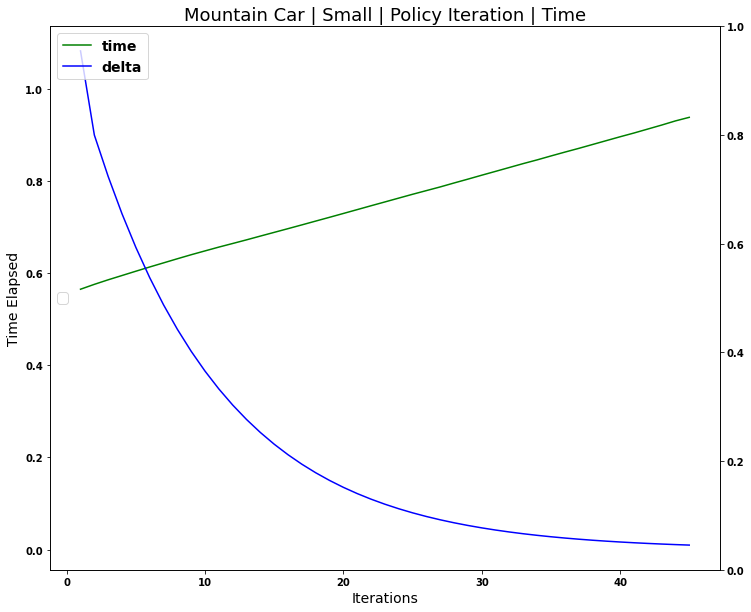

In [239]:
mountain_car_l.value_iteration(iterations_to_save=[1], visualize=True)

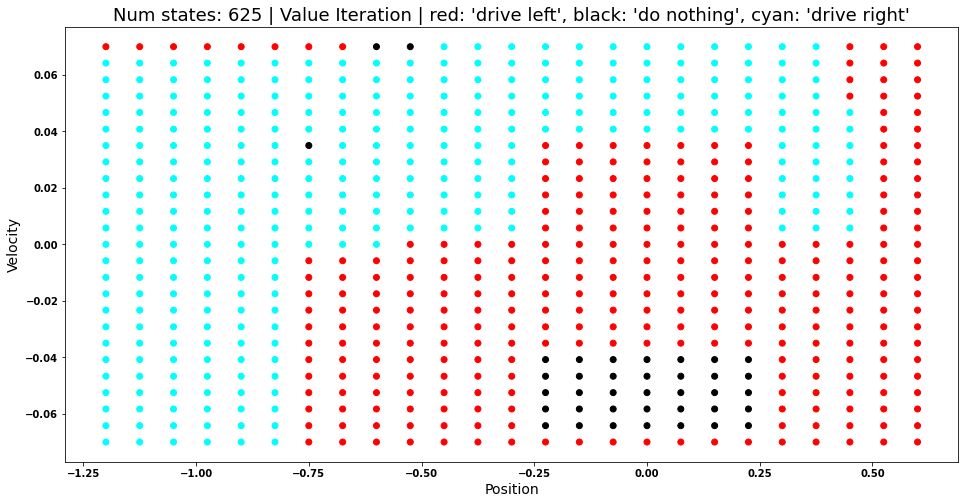

In [959]:
plot_policy_no_grid(mountain_car_l.optimal_policy, mountain_car_l.position_states, 
                    mountain_car_l.velocity_states, figsize=(16,8), 
                    title="Num states: 625 | Value Iteration | red: 'drive left', black: 'do nothing', cyan: 'drive right'")

In [960]:
r = []
l = mountain_car_l
for _ in range(100):
    state = l.env.reset()
    r_tot = 0
    while True:
        #mountain_car_s.env.render()
        #ind_s = to_state(state, fr.discrete_states, 16)
        ind_s = state_to_index(state, l.position_states, 
                               l.velocity_states, l.state_size)
        a = np.argmax(l.optimal_policy[ind_s])
        state, reward, done, _ = l.env.step(a)
        r_tot -= 1
        if done:
            r.append(r_tot)
            r_tot = 0
            break
    #mountain_car_s.env.close()
print("avg:", np.mean(r))

avg: -138.26


<a id='1'></a>
# Policy Iteration


Policy-iteration
PI iteration 1
PI iteration 2

---> converged at iteration 2 in 0.4722 seconds

---> optimal V = 
[0.0982249677 0.0759392534 0.0537963963 0.031510682  0.0093678248
 0.0157732421 0.0379160992 0.0602018135 0.0823446707 0.1
 0.0978919888 0.0756062745 0.0534634174 0.0311777031 0.009034846
 0.0161062209 0.0382490781 0.0605347924 0.0826776495 0.1
 0.0987941273 0.076508413  0.0543655559 0.0320798416 0.0099369845
 0.0152040824 0.0373469396 0.0596326539 0.081775511  0.1
 0.0999993627 0.078330526  0.0561876688 0.0339019545 0.0117590974
 0.0133819695 0.0355248267 0.0578105409 0.0799533981 0.0993831224
 0.0999999719 0.0804360969 0.0582932397 0.0360075254 0.0138646683
 0.0112763986 0.0334192558 0.05570497   0.0778478272 0.099999161
 0.1          0.0820895892 0.0599467321 0.0376610178 0.0155181607
 0.0096229063 0.0317657634 0.0540514777 0.0761943348 0.0984800491
 0.1          0.0827133906 0.0605705335 0.0382848192 0.016141962
 0.0089991049 0.031141962  0.0534276763 0.0755705335 0.0

No handles with labels found to put in legend.


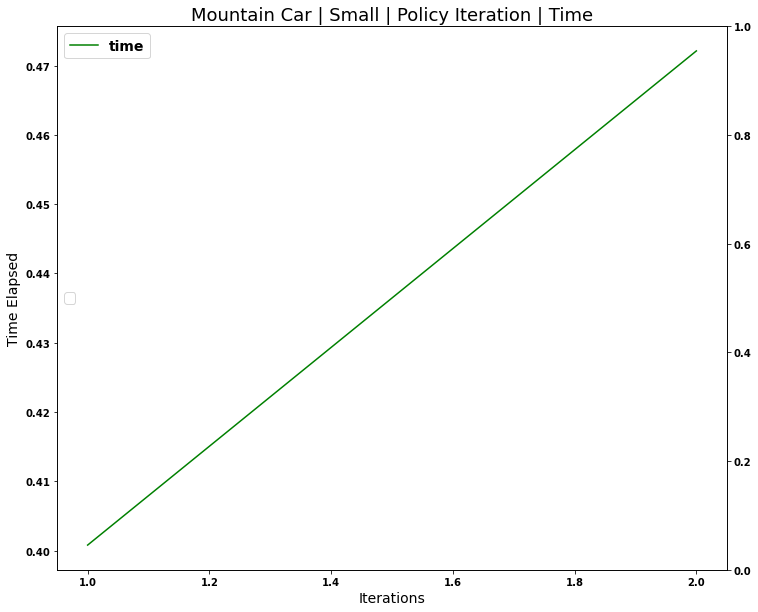

In [221]:
mountain_car_s.policy_iteration(iterations_to_save=[1], visualize=True)

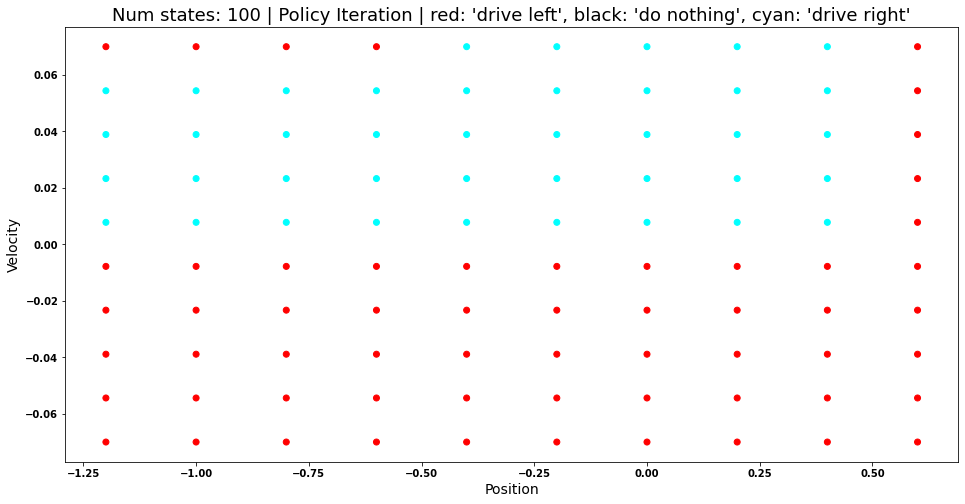

In [974]:
plot_policy_no_grid(mountain_car_s.optimal_policy, mountain_car_s.position_states, mountain_car_s.velocity_states,
                    figsize=(16,8), title="Num states: 100 | Policy Iteration | red: 'drive left', black: 'do nothing', cyan: 'drive right'")

In [968]:
r = []
l = mountain_car_s
for _ in range(100):
    state = l.env.reset()
    r_tot = 0
    while True:
        #mountain_car_s.env.render()
        #ind_s = to_state(state, fr.discrete_states, 16)
        ind_s = state_to_index(state, l.position_states, 
                               l.velocity_states, l.state_size)
        a = np.argmax(l.optimal_policy[ind_s])
        state, reward, done, _ = l.env.step(a)
        r_tot -= 1
        if done:
            r.append(r_tot)
            r_tot = 0
            break
    #mountain_car_s.env.close()
print("avg:", np.mean(r))

avg: -159.16



Policy-iteration
PI iteration 1
PI iteration 2
PI iteration 3
PI iteration 4
PI iteration 5
PI iteration 6
PI iteration 7
PI iteration 8
PI iteration 9
PI iteration 10
PI iteration 11
PI iteration 12
PI iteration 13
PI iteration 14
PI iteration 15
PI iteration 16
PI iteration 17
PI iteration 18
PI iteration 19
PI iteration 20
PI iteration 21
PI iteration 22
PI iteration 23
PI iteration 24
PI iteration 25
PI iteration 26
PI iteration 27

---> converged at iteration 27 in 1.7635 seconds

---> optimal V = 
[0.2035261467 0.2157402656 0.2302321438 0.2472707385 0.2671231454
 0.2901020102 0.3165705902 0.3469007583 0.3815215801 0.4209256678
 0.4656171868 0.5162065006 0.5733533573 0.636757013  0.7062338745
 0.7825490842 0.8664247632 0.9586293547 1.0602446853 1.0638991607
 1.0670113715 1.0695139832 1.0713672792 1.0725145665 1.0728800099
 0.2036759233 0.2158900423 0.2303819204 0.2474205152 0.2672729221
 0.3167362306 0.3461943769 0.3798462855 0.41815793   0.4616629318
 0.5109224576 0.566575899  0

No handles with labels found to put in legend.


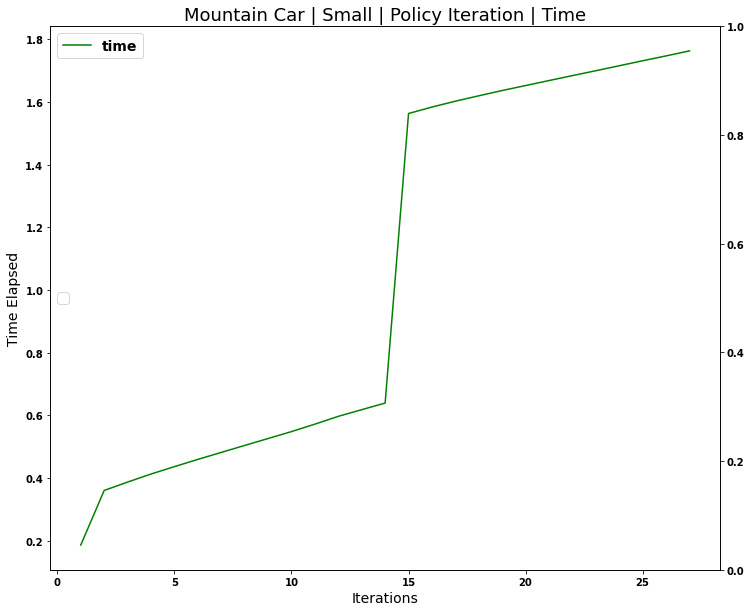

In [242]:
mountain_car_l.policy_iteration(iterations_to_save=[15], visualize=True)

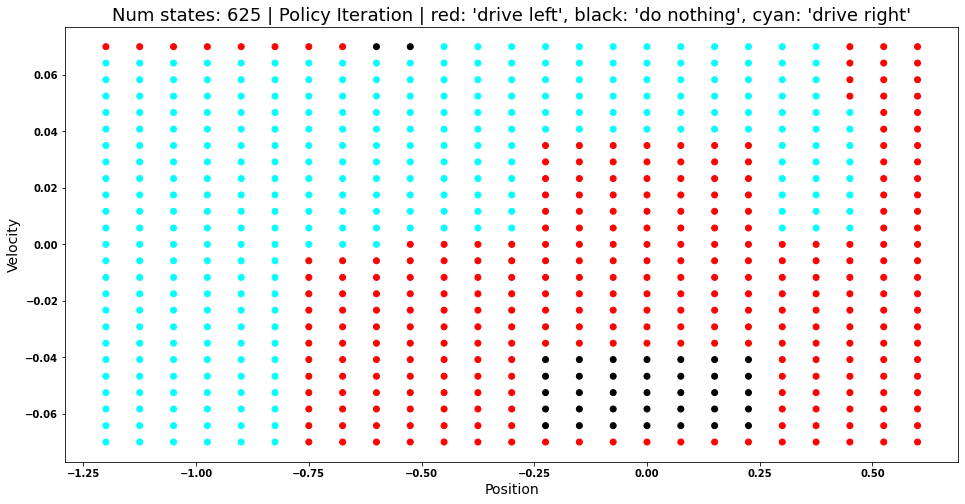

In [976]:
plot_policy_no_grid(mountain_car_l.optimal_policy, mountain_car_l.position_states, mountain_car_l.velocity_states,
                    figsize=(16,8),title="Num states: 625 | Policy Iteration | red: 'drive left', black: 'do nothing', cyan: 'drive right'") 

In [980]:
r = []
l = mountain_car_l
for _ in range(100):
    state = l.env.reset()
    r_tot = 0
    while True:
        #mountain_car_s.env.render()
        #ind_s = to_state(state, fr.discrete_states, 16)
        ind_s = state_to_index(state, l.position_states, 
                               l.velocity_states, l.state_size)
        a = np.argmax(l.optimal_policy[ind_s])
        state, reward, done, _ = l.env.step(a)
        r_tot -= 1
        if done:
            r.append(r_tot)
            r_tot = 0
            break
    #mountain_car_s.env.close()
print("avg:", np.mean(r))

avg: -137.55


<a id='1'></a>
# Q-learning


Q-Learning

Episode 100
average score = -200.0
0.9238258520543502
0.28269388889080527

Episode 200
average score = -200.0
0.8527714415600073
0.2662262843843909

Episode 300
average score = -200.0
0.7871820537639053
0.2507179577712611

Episode 400
average score = -200.0
0.7266373562351002
0.2361130287880675

Episode 500
average score = -200.0
0.6707493456586049
0.2223588723322999

Episode 600
average score = -200.0
0.6191598612993441
0.2094059288412753

Episode 700
average score = -200.0
0.5715382897135811
0.1972075257170095

Episode 800
average score = -200.0
0.5275794459983539
0.18571970915352284

Episode 900
average score = -200.0
0.4870016180008106
0.17490108576061367

Episode 1000
average score = -200.0
0.44954476095368484
0.1647126734134307

Episode 1100
average score = -200.0
0.41496883096714743
0.15511776079041922

Episode 1200
average score = -200.0
0.3830522466971471
0.14608177509352327

Episode 1300
average score = -200.0
0.353590469331776
0.1375721574740057
-196.0
-198.0
-1

-88.0
-164.0
-162.0
-159.0
-166.0
-156.0
-162.0
-161.0
-167.0
-159.0
-167.0

Episode 3700
average score = -166.05
0.05179900638408448
0.03258057944156803
-166.0
-175.0
-169.0
-159.0
-169.0
-159.0
-158.0
-165.0
-158.0
-164.0
-162.0
-154.0
-164.0
-158.0
-158.0
-167.0
-158.0
-170.0
-159.0
-169.0
-169.0
-167.0
-163.0
-150.0
-167.0
-166.0
-175.0
-167.0
-154.0
-166.0
-164.0
-163.0
-153.0
-164.0
-157.0
-153.0
-161.0
-156.0
-153.0
-152.0
-160.0
-164.0
-149.0
-155.0
-153.0
-163.0
-153.0
-161.0
-156.0
-154.0
-157.0
-157.0
-160.0
-153.0
-151.0
-152.0
-165.0
-174.0
-169.0
-151.0
-150.0
-169.0
-165.0
-153.0
-160.0
-153.0
-158.0
-161.0
-159.0
-158.0
-160.0
-161.0
-157.0
-159.0
-158.0
-164.0
-154.0
-167.0
-158.0
-158.0

Episode 3800
average score = -168.2
0.04781497859937891
0.030682681687432992
-150.0
-158.0
-154.0
-165.0
-161.0
-150.0
-147.0
-160.0
-149.0
-160.0
-156.0
-159.0
-153.0
-156.0
-150.0
-156.0
-161.0
-168.0
-155.0
-154.0
-164.0
-189.0
-179.0
-187.0
-199.0
-194.0
-188.0
-198.0
-197.0
-187.

-145.0
-149.0
-147.0
-143.0
-152.0
-146.0
-149.0
-151.0
-150.0
-149.0
-147.0

Episode 5300
average score = -163.38
0.014394680002883062
0.012471278405930875
-145.0
-160.0
-153.0
-152.0
-154.0
-172.0
-160.0
-150.0
-151.0
-145.0
-147.0
-142.0
-147.0
-143.0
-147.0
-148.0
-145.0
-148.0
-147.0
-140.0
-144.0
-143.0
-145.0
-148.0
-150.0
-147.0
-147.0
-149.0
-133.0
-138.0
-144.0
-141.0
-136.0
-149.0
-147.0
-145.0
-144.0
-173.0
-146.0
-149.0
-145.0
-140.0
-137.0
-148.0
-137.0
-169.0
-150.0
-167.0
-141.0
-142.0
-142.0
-144.0
-148.0
-138.0
-134.0
-137.0
-139.0
-147.0
-138.0
-136.0
-134.0
-133.0
-164.0
-136.0
-141.0
-135.0
-147.0
-143.0
-165.0
-150.0
-149.0
-147.0

Episode 5400
average score = -161.37
0.013287538976698196
0.011744796198324386
-147.0
-144.0
-143.0
-169.0
-136.0
-147.0
-143.0
-197.0
-147.0
-141.0
-147.0
-145.0
-139.0
-148.0
-146.0
-143.0
-154.0
-153.0
-141.0
-142.0
-166.0
-149.0
-138.0
-196.0
-151.0
-149.0
-152.0
-150.0
-155.0
-161.0
-160.0
-144.0
-151.0
-142.0
-161.0
-167.0
-158.0


-154.0
-158.0
-152.0
-158.0
-149.0
-155.0
-157.0
-153.0
-147.0
-149.0
-151.0
-154.0
-156.0
-156.0
-149.0
-150.0
-153.0
-153.0
-151.0
-153.0
-157.0
-158.0
-145.0
-153.0
-154.0
-148.0

Episode 6600
average score = -161.41
0.005085749800773701
0.005715570854522769
-156.0
-157.0
-154.0
-190.0
-152.0
-160.0
-152.0
-153.0
-155.0
-156.0
-152.0
-152.0
-146.0
-154.0
-150.0
-155.0
-149.0
-148.0
-161.0
-155.0
-157.0
-178.0
-150.0
-151.0
-150.0
-150.0
-152.0
-160.0
-154.0
-158.0
-156.0
-152.0
-153.0
-147.0
-154.0
-154.0
-150.0
-151.0
-150.0
-150.0
-176.0
-152.0
-146.0
-152.0
-150.0
-153.0
-151.0
-153.0
-155.0
-152.0
-153.0
-155.0
-164.0
-163.0
-156.0
-156.0
-159.0
-153.0
-150.0
-159.0
-156.0
-151.0
-152.0
-151.0
-152.0
-150.0
-152.0
-148.0
-149.0
-148.0
-150.0
-152.0
-148.0
-151.0
-147.0
-152.0
-147.0

Episode 6700
average score = -164.48
0.004694588465320579
0.005382624993082426
-146.0
-148.0
-145.0
-148.0
-148.0
-152.0
-147.0
-153.0
-149.0
-155.0
-155.0
-156.0
-156.0
-151.0
-147.0
-152.0
-156.0


-156.0
-160.0
-143.0
-157.0
-167.0
-149.0
-146.0
-166.0
-148.0
-157.0
-161.0
-157.0
-142.0
-148.0
-142.0
-143.0
-173.0
-173.0
-177.0
-161.0
-105.0
-155.0
-165.0
-153.0
-145.0
-161.0
-142.0
-163.0
-163.0
-163.0
-165.0
-159.0
-142.0
-145.0
-159.0
-160.0
-145.0
-156.0
-163.0
-153.0
-146.0
-165.0
-162.0
-167.0
-158.0
-142.0
-158.0
-165.0
-159.0
-143.0
-154.0
-148.0
-143.0
-169.0
-176.0
-146.0
-155.0
-158.0
-162.0
-160.0
-148.0
-155.0
-164.0
-174.0
-149.0
-171.0
-156.0
-144.0
-143.0
-198.0

Episode 8000
average score = -169.26
0.001658633769381235
0.0024668501119065114
-143.0
-160.0
-169.0
-164.0
-168.0
-164.0
-164.0
-164.0
-172.0
-164.0
-143.0
-163.0
-142.0
-143.0
-156.0
-148.0
-162.0
-164.0
-142.0
-148.0
-193.0
-162.0
-160.0
-160.0
-156.0
-156.0
-159.0
-155.0
-191.0
-162.0
-167.0
-163.0
-157.0
-169.0
-176.0
-147.0
-162.0
-142.0
-155.0
-144.0
-156.0
-143.0
-159.0
-160.0
-158.0
-164.0
-177.0
-159.0
-158.0
-162.0
-157.0
-162.0
-162.0
-185.0
-158.0
-158.0
-168.0
-159.0
-157.0
-145.0
-152.0
-1

-164.0
-160.0
-142.0
-142.0
-160.0
-154.0
-161.0
-155.0
-161.0
-161.0
-165.0
-162.0
-156.0
-159.0
-158.0
-175.0
-160.0
-156.0
-144.0
-163.0
-162.0
-167.0
-156.0
-158.0
-175.0
-158.0
-146.0
-187.0
-176.0
-164.0
-165.0
-160.0
-145.0
-153.0
-144.0
-157.0
-159.0
-147.0
-144.0
-157.0
-164.0
-169.0
-165.0
-169.0
-143.0
-162.0
-163.0
-169.0
-160.0
-175.0
-166.0
-163.0
-171.0
-165.0
-162.0
-148.0
-161.0
-162.0
-142.0
-163.0
-159.0
-149.0
-160.0
-162.0
-147.0
-175.0
-168.0
-156.0
-145.0
-163.0
-143.0
-144.0
-162.0
-153.0
-165.0

Episode 9300
average score = -169.02
0.0005860079112906721
0.0011305542337491175
-162.0
-142.0
-171.0
-160.0
-166.0
-160.0
-146.0
-144.0
-146.0
-160.0
-174.0
-169.0
-164.0
-148.0
-162.0
-169.0
-147.0
-158.0
-147.0
-155.0
-173.0
-164.0
-163.0
-145.0
-161.0
-162.0
-143.0
-145.0
-162.0
-160.0
-160.0
-160.0
-168.0
-168.0
-161.0
-146.0
-159.0
-145.0
-161.0
-175.0
-163.0
-159.0
-160.0
-177.0
-145.0
-165.0
-170.0
-160.0
-151.0
-167.0
-166.0
-161.0
-164.0
-165.0
-166.0
-167.0
-

-163.0
-159.0
-171.0
-171.0
-173.0
-178.0
-175.0
-150.0
-162.0
-162.0
-173.0
-165.0
-161.0
-165.0
-175.0
-145.0
-162.0
-161.0
-167.0
-166.0
-150.0
-162.0
-171.0
-168.0
-162.0
-165.0
-162.0
-159.0
-180.0
-166.0
-177.0
-159.0
-151.0
-171.0
-174.0
-164.0
-166.0
-162.0
-160.0
-181.0
-172.0
-187.0
-168.0
-155.0
-167.0
-160.0
-171.0
-164.0
-196.0
-177.0
-166.0
-173.0
-167.0
-171.0
-173.0

Episode 10600
average score = -174.58
0.0002070410469354942
0.0005181315513573022
-146.0
-165.0
-150.0
-165.0
-165.0
-153.0
-148.0
-167.0
-184.0
-163.0
-162.0
-164.0
-151.0
-145.0
-177.0
-173.0
-147.0
-169.0
-159.0
-188.0
-150.0
-169.0
-170.0
-162.0
-151.0
-180.0
-164.0
-166.0
-187.0
-146.0
-164.0
-164.0
-182.0
-167.0
-144.0
-159.0
-164.0
-158.0
-149.0
-157.0
-163.0
-167.0
-169.0
-175.0
-147.0
-172.0
-175.0
-166.0
-164.0
-173.0
-102.0
-150.0
-168.0
-178.0
-168.0
-165.0
-145.0
-188.0
-160.0
-152.0
-169.0
-163.0
-151.0
-157.0
-157.0
-160.0
-145.0
-160.0
-167.0
-159.0
-179.0
-173.0
-168.0
-170.0
-158.0
-169.0


-145.0
-174.0
-150.0
-168.0
-170.0
-154.0
-176.0
-156.0
-186.0
-155.0
-154.0
-177.0
-174.0
-169.0
-154.0
-158.0
-175.0
-160.0
-151.0
-159.0
-169.0
-152.0
-147.0
-162.0
-163.0
-196.0
-137.0
-168.0
-186.0
-155.0
-159.0
-183.0
-166.0
-169.0
-145.0
-149.0
-150.0
-96.0
-98.0
-166.0
-171.0
-154.0

Episode 11900
average score = -167.02
7.314917476409836e-05
0.00023745902363450785
-165.0
-155.0
-146.0
-161.0
-92.0
-152.0
-193.0
-196.0
-151.0
-173.0
-167.0
-167.0
-174.0
-161.0
-150.0
-161.0
-196.0
-149.0
-186.0
-153.0
-172.0
-192.0
-153.0
-174.0
-172.0
-176.0
-165.0
-186.0
-165.0
-181.0
-152.0
-151.0
-169.0
-164.0
-162.0
-191.0
-158.0
-184.0
-161.0
-161.0
-153.0
-182.0
-150.0
-171.0
-186.0
-158.0
-167.0
-191.0
-183.0
-155.0
-154.0
-174.0
-169.0
-92.0
-88.0
-171.0
-155.0
-148.0
-168.0
-188.0
-190.0
-173.0
-156.0
-169.0
-167.0
-183.0
-164.0
-154.0
-162.0
-180.0
-176.0
-152.0
-161.0
-164.0
-183.0
-172.0

Episode 12000
average score = -173.46
6.752303702455291e-05
0.00022362645971515545
-171.0
-169

-167.0
-186.0
-141.0
-152.0
-190.0
-164.0
-161.0
-147.0
-178.0
-167.0
-162.0
-150.0
-147.0

Episode 13200
average score = -169.59
2.5844159155240828e-05
0.0001088271651431812
-193.0
-168.0
-180.0
-159.0
-170.0
-154.0
-171.0
-164.0
-189.0
-160.0
-171.0
-178.0
-166.0
-164.0
-186.0
-167.0
-183.0
-149.0
-173.0
-151.0
-160.0
-148.0
-170.0
-148.0
-91.0
-187.0
-183.0
-157.0
-173.0
-172.0
-198.0
-182.0
-158.0
-92.0
-164.0
-199.0
-187.0
-151.0
-147.0
-186.0
-186.0
-161.0
-167.0
-161.0
-186.0
-167.0
-159.0
-89.0
-148.0
-150.0
-171.0
-181.0
-188.0
-173.0
-175.0
-167.0
-167.0
-165.0
-161.0
-157.0
-155.0
-172.0
-154.0
-91.0
-177.0
-150.0
-90.0
-168.0
-186.0
-189.0
-187.0
-178.0
-152.0
-143.0
-175.0
-146.0
-167.0
-168.0

Episode 13300
average score = -171.76
2.385640195033682e-05
0.0001024877188885634
-157.0
-156.0
-170.0
-158.0
-151.0
-164.0
-164.0
-175.0
-153.0
-166.0
-151.0
-166.0
-195.0
-175.0
-168.0
-177.0
-147.0
-150.0
-151.0
-183.0
-165.0
-182.0
-160.0
-143.0
-148.0
-165.0
-181.0
-173.0
-146.

-176.0
-170.0
-151.0
-179.0
-148.0
-105.0
-161.0
-155.0
-148.0
-145.0
-156.0

Episode 14500
average score = -169.24
9.130937766494573e-06
4.987534982595687e-05
-152.0
-182.0
-150.0
-164.0
-148.0
-168.0
-157.0
-100.0
-169.0
-139.0
-185.0
-165.0
-172.0
-169.0
-146.0
-99.0
-146.0
-198.0
-165.0
-181.0
-188.0
-108.0
-152.0
-185.0
-163.0
-188.0
-177.0
-188.0
-92.0
-147.0
-98.0
-184.0
-153.0
-148.0
-153.0
-178.0
-160.0
-158.0
-152.0
-169.0
-167.0
-147.0
-152.0
-178.0
-164.0
-169.0
-113.0
-96.0
-194.0
-173.0
-162.0
-174.0
-161.0
-164.0
-153.0
-165.0
-90.0
-91.0
-171.0
-188.0
-182.0
-146.0
-169.0
-166.0
-172.0
-162.0
-147.0
-167.0
-156.0
-168.0
-178.0
-98.0
-178.0

Episode 14600
average score = -168.57
8.428648045097346e-06
4.696998976042612e-05
-146.0
-96.0
-167.0
-155.0
-161.0
-162.0
-188.0
-154.0
-150.0
-109.0
-171.0
-146.0
-167.0
-150.0
-161.0
-195.0
-107.0
-138.0
-156.0
-154.0
-179.0
-163.0
-170.0
-153.0
-148.0
-161.0
-183.0
-181.0
-169.0
-174.0
-174.0
-161.0
-162.0
-148.0
-153.0
-171.0
-1

-168.0
-167.0
-170.0
-181.0
-182.0
-185.0
-164.0
-150.0
-187.0
-186.0
-93.0
-162.0
-169.0
-159.0
-176.0
-170.0
-158.0
-167.0
-150.0
-188.0
-170.0
-170.0
-177.0
-160.0
-170.0
-165.0
-161.0
-164.0
-192.0
-154.0
-159.0
-152.0
-180.0
-150.0
-163.0
-162.0
-144.0
-146.0
-169.0
-153.0
-160.0
-172.0
-150.0
-172.0
-151.0
-148.0
-154.0
-165.0
-166.0
-164.0
-164.0
-166.0
-159.0
-156.0
-183.0
-103.0
-177.0
-168.0
-167.0
-168.0

Episode 15900
average score = -171.12
2.977905386403859e-06
2.1526285900590153e-05
-172.0
-196.0
-145.0
-183.0
-184.0
-97.0
-170.0
-168.0
-158.0
-164.0
-149.0
-165.0
-164.0
-171.0
-164.0
-151.0
-168.0
-153.0
-165.0
-154.0
-153.0
-153.0
-173.0
-173.0
-155.0
-183.0
-162.0
-91.0
-175.0
-182.0
-148.0
-172.0
-189.0
-167.0
-183.0
-145.0
-146.0
-179.0
-151.0
-154.0
-168.0
-166.0
-168.0
-158.0
-152.0
-158.0
-176.0
-182.0
-146.0
-169.0
-149.0
-161.0
-186.0
-147.0
-187.0
-153.0
-149.0
-165.0
-137.0
-174.0
-155.0
-159.0
-186.0
-168.0
-168.0
-151.0
-147.0
-148.0
-118.0
-196.0
-187.0
-1

-150.0
-163.0
-148.0
-97.0
-166.0
-146.0
-92.0
-151.0
-160.0
-112.0
-96.0
-176.0
-178.0
-162.0
-96.0
-168.0
-152.0
-93.0
-165.0
-171.0
-165.0
-166.0
-165.0
-149.0
-178.0
-149.0
-183.0
-162.0
-151.0
-170.0
-157.0

Episode 17200
average score = -172.06
1.0521165960336013e-06
9.865469143967364e-06
-170.0
-176.0
-153.0
-162.0
-167.0
-151.0
-166.0
-158.0
-178.0
-164.0
-173.0
-156.0
-175.0
-149.0
-160.0
-196.0
-176.0
-155.0
-145.0
-172.0
-178.0
-165.0
-161.0
-188.0
-90.0
-179.0
-152.0
-155.0
-183.0
-91.0
-176.0
-100.0
-185.0
-176.0
-163.0
-177.0
-99.0
-173.0
-167.0
-145.0
-147.0
-174.0
-106.0
-103.0
-168.0
-168.0
-181.0
-154.0
-165.0
-153.0
-162.0
-185.0
-159.0
-170.0
-152.0
-161.0
-191.0
-174.0
-118.0
-155.0
-163.0
-148.0
-169.0
-195.0
-165.0
-182.0
-149.0
-163.0
-171.0
-163.0
-161.0
-170.0
-105.0
-179.0
-164.0
-167.0

Episode 17300
average score = -169.65
9.71194932782632e-07
9.290781644458503e-06
-184.0
-167.0
-164.0
-93.0
-172.0
-100.0
-151.0
-155.0
-164.0
-148.0
-158.0
-181.0
-146.0
-16

-158.0
-159.0
-146.0
-159.0
-165.0
-189.0
-176.0
-167.0
-159.0
-168.0
-192.0
-146.0
-160.0
-157.0
-163.0
-167.0
-94.0
-158.0

Episode 18500
average score = -168.98
3.717207862624849e-07
4.521331821013453e-06
-90.0
-148.0
-94.0
-164.0
-171.0
-185.0
-155.0
-170.0
-145.0
-157.0
-163.0
-172.0
-166.0
-91.0
-178.0
-92.0
-151.0
-150.0
-175.0
-155.0
-146.0
-169.0
-162.0
-158.0
-159.0
-185.0
-168.0
-166.0
-150.0
-170.0
-151.0
-191.0
-160.0
-167.0
-148.0
-168.0
-167.0
-166.0
-199.0
-161.0
-158.0
-152.0
-163.0
-160.0
-163.0
-152.0
-162.0
-163.0
-159.0
-167.0
-97.0
-167.0
-172.0
-159.0
-163.0
-169.0
-160.0
-172.0
-177.0
-184.0
-170.0
-176.0
-167.0
-145.0
-174.0
-145.0
-169.0
-191.0
-94.0
-185.0
-160.0
-190.0
-182.0
-150.0
-197.0
-194.0
-149.0

Episode 18600
average score = -169.4
3.4313054787757696e-07
4.257953279075906e-06
-184.0
-100.0
-93.0
-172.0
-177.0
-161.0
-193.0
-174.0
-183.0
-162.0
-151.0
-96.0
-156.0
-158.0
-175.0
-153.0
-153.0
-194.0
-99.0
-95.0
-194.0
-148.0
-192.0
-183.0
-145.0
-143.

-170.0
-181.0
-173.0
-181.0
-162.0
-170.0
-166.0
-189.0
-155.0
-149.0
-182.0
-156.0
-170.0
-96.0
-174.0
-162.0
-149.0
-170.0
-170.0
-179.0
-199.0
-146.0
-167.0
-183.0
-167.0
-166.0
-148.0
-164.0
-171.0
-176.0
-163.0
-188.0
-163.0
-161.0
-165.0
-169.0
-170.0
-145.0
-152.0
-166.0
-157.0
-168.0
-195.0
-162.0
-94.0
-178.0
-164.0
-179.0
-151.0
-160.0
-164.0
-166.0
-93.0
-160.0
-166.0
-154.0
-166.0
-158.0
-181.0
-170.0
-156.0
-146.0
-182.0
-175.0
-185.0
-190.0
-168.0
-172.0
-148.0
-185.0
-147.0
-186.0
-165.0

Episode 19900
average score = -170.4
1.2123062931292916e-07
1.9514145117819083e-06
-185.0
-161.0
-166.0
-159.0
-150.0
-189.0
-164.0
-180.0
-171.0
-151.0
-164.0
-183.0
-184.0
-165.0
-169.0
-163.0
-167.0
-184.0
-146.0
-166.0
-176.0
-168.0
-174.0
-184.0
-150.0
-151.0
-172.0
-165.0
-183.0
-163.0
-145.0
-160.0
-93.0
-184.0
-169.0
-156.0
-163.0
-150.0
-169.0
-155.0
-159.0
-149.0
-172.0
-167.0
-176.0
-103.0
-151.0
-180.0
-150.0
-174.0
-156.0
-157.0
-179.0
-167.0
-163.0
-174.0
-170.0
-97.0
-162

-177.0
-160.0
-190.0
-166.0
-169.0
-166.0
-152.0
-150.0
-147.0
-174.0
-183.0
-167.0
-149.0
-161.0
-152.0
-148.0
-146.0
-185.0
-183.0
-164.0
-190.0
-150.0
-168.0
-163.0
-167.0
-187.0
-152.0
-170.0
-159.0
-164.0
-166.0
-173.0
-156.0
-162.0
-199.0
-172.0
-179.0
-168.0
-149.0
-158.0
-152.0
-173.0
-156.0
-187.0
-194.0
-162.0
-164.0
-164.0
-149.0
-182.0
-182.0
-180.0

Episode 21200
average score = -174.82
4.283170232005226e-08
1e-06
-182.0
-187.0
-148.0
-182.0
-166.0
-187.0
-168.0
-180.0
-178.0
-171.0
-171.0
-148.0
-163.0
-183.0
-177.0
-181.0
-161.0
-93.0
-159.0
-165.0
-168.0
-164.0
-162.0
-163.0
-162.0
-161.0
-171.0
-171.0
-169.0
-153.0
-92.0
-150.0
-168.0
-146.0
-163.0
-171.0
-152.0
-149.0
-149.0
-176.0
-90.0
-147.0
-147.0
-162.0
-179.0
-151.0
-186.0
-152.0
-172.0
-153.0
-170.0
-91.0
-92.0
-162.0
-95.0
-165.0
-180.0
-138.0
-166.0
-173.0
-163.0
-161.0
-161.0
-159.0
-162.0
-187.0
-176.0
-189.0
-167.0
-168.0
-163.0
-197.0
-153.0
-188.0
-186.0
-192.0
-90.0
-152.0
-166.0
-193.0
-161.0
-183.0
-1

-185.0
-178.0
-149.0
-162.0
-160.0
-159.0
-167.0
-177.0

Episode 22500
average score = -172.13
1.5132765820245714e-08
1e-06
-155.0
-153.0
-148.0
-165.0
-153.0
-149.0
-164.0
-175.0
-151.0
-171.0
-150.0
-184.0
-169.0
-167.0
-158.0
-106.0
-91.0
-160.0
-167.0
-153.0
-175.0
-152.0
-173.0
-158.0
-193.0
-178.0
-99.0
-104.0
-156.0
-180.0
-159.0
-173.0
-172.0
-149.0
-160.0
-146.0
-164.0
-189.0
-149.0
-161.0
-165.0
-150.0
-157.0
-161.0
-96.0
-148.0
-154.0
-98.0
-171.0
-182.0
-163.0
-167.0
-166.0
-167.0
-97.0
-163.0
-158.0
-166.0
-149.0
-182.0
-170.0
-92.0
-166.0
-159.0
-146.0
-159.0
-196.0
-150.0
-152.0
-168.0
-174.0
-169.0
-167.0
-170.0
-167.0
-96.0
-163.0
-182.0

Episode 22600
average score = -165.85
1.3968856245605185e-08
1e-06
-165.0
-164.0
-168.0
-175.0
-151.0
-181.0
-164.0
-170.0
-169.0
-148.0
-148.0
-89.0
-176.0
-151.0
-154.0
-153.0
-169.0
-162.0
-151.0
-171.0
-165.0
-99.0
-151.0
-158.0
-164.0
-195.0
-155.0
-174.0
-163.0
-177.0
-178.0
-153.0
-148.0
-173.0
-167.0
-167.0
-164.0
-162.0
-158.

-183.0
-180.0
-177.0
-104.0
-189.0
-174.0
-191.0
-170.0
-153.0
-173.0
-151.0
-172.0
-172.0
-150.0
-150.0
-150.0
-174.0
-155.0
-163.0
-165.0
-146.0
-169.0
-90.0
-151.0
-179.0
-168.0
-160.0
-166.0
-178.0
-157.0
-149.0
-166.0
-188.0
-165.0
-185.0
-176.0
-171.0
-154.0
-158.0
-163.0
-175.0
-162.0
-175.0
-150.0
-171.0
-152.0
-151.0
-169.0
-175.0
-164.0
-163.0
-171.0
-163.0
-164.0
-169.0
-165.0
-169.0
-163.0
-167.0
-156.0
-91.0

Episode 23900
average score = -171.25
4.935303032362913e-09
1e-06
-193.0
-166.0
-151.0
-161.0
-146.0
-169.0
-174.0
-174.0
-170.0
-174.0
-145.0
-153.0
-90.0
-159.0
-148.0
-169.0
-165.0
-188.0
-166.0
-151.0
-172.0
-153.0
-153.0
-184.0
-176.0
-153.0
-175.0
-154.0
-162.0
-150.0
-146.0
-180.0
-171.0
-175.0
-162.0
-178.0
-191.0
-173.0
-167.0
-196.0
-181.0
-153.0
-166.0
-166.0
-172.0
-183.0
-176.0
-176.0
-170.0
-163.0
-92.0
-161.0
-177.0
-163.0
-177.0
-168.0
-163.0
-162.0
-161.0
-195.0
-184.0
-172.0
-177.0
-181.0
-186.0
-188.0
-166.0
-175.0
-92.0
-161.0
-155.0
-170.0
-166.0


-181.0
-176.0
-166.0
-169.0
-152.0
-162.0
-164.0
-166.0
-180.0
-169.0
-167.0
-153.0
-165.0

Episode 25200
average score = -168.15
1.7436800546153381e-09
1e-06
-159.0
-154.0
-165.0
-148.0
-165.0
-152.0
-151.0
-173.0
-178.0
-168.0
-182.0
-165.0
-176.0
-165.0
-155.0
-168.0
-165.0
-165.0
-169.0
-109.0
-173.0
-91.0
-151.0
-156.0
-153.0
-148.0
-166.0
-161.0
-104.0
-151.0
-151.0
-153.0
-151.0
-168.0
-153.0
-147.0
-151.0
-161.0
-182.0
-161.0
-172.0
-160.0
-99.0
-159.0
-170.0
-151.0
-181.0
-147.0
-166.0
-169.0
-163.0
-151.0
-154.0
-151.0
-152.0
-196.0
-180.0
-160.0
-166.0
-189.0
-184.0
-169.0
-185.0
-166.0
-166.0
-146.0
-170.0
-158.0
-157.0
-147.0
-148.0
-91.0
-159.0
-168.0

Episode 25300
average score = -169.14
1.6095680267954576e-09
1e-06
-173.0
-177.0
-165.0
-146.0
-182.0
-164.0
-190.0
-152.0
-165.0
-189.0
-145.0
-171.0
-184.0
-161.0
-93.0
-145.0
-153.0
-179.0
-168.0
-151.0
-167.0
-156.0
-164.0
-167.0
-175.0
-158.0
-179.0
-152.0
-165.0
-179.0
-153.0
-160.0
-187.0
-149.0
-184.0
-168.0
-179.0


-180.0
-166.0
-168.0
-161.0
-154.0
-166.0
-154.0
-155.0
-169.0
-164.0
-157.0
-164.0
-171.0
-178.0
-164.0
-178.0
-151.0
-159.0
-103.0
-160.0
-149.0
-174.0
-181.0
-178.0
-164.0
-175.0
-161.0
-146.0
-148.0
-167.0
-144.0
-176.0
-170.0
-169.0
-171.0
-154.0
-169.0
-171.0
-147.0
-173.0
-163.0
-152.0
-177.0
-172.0
-191.0
-163.0
-147.0
-172.0
-172.0
-177.0
-144.0
-94.0
-160.0
-168.0
-173.0
-150.0
-166.0
-150.0
-165.0
-149.0

Episode 26600
average score = -168.7
5.686726116848122e-10
1e-06
-149.0
-154.0
-191.0
-182.0
-151.0
-169.0
-153.0
-167.0
-186.0
-172.0
-189.0
-159.0
-175.0
-160.0
-164.0
-160.0
-181.0
-192.0
-156.0
-170.0
-187.0
-166.0
-147.0
-163.0
-183.0
-180.0
-164.0
-185.0
-169.0
-161.0
-151.0
-166.0
-172.0
-161.0
-163.0
-163.0
-185.0
-178.0
-177.0
-163.0
-191.0
-172.0
-186.0
-192.0
-195.0
-184.0
-188.0
-168.0
-161.0
-193.0
-169.0
-166.0
-150.0
-167.0
-146.0
-166.0
-119.0
-175.0
-171.0
-166.0
-151.0
-170.0
-161.0
-152.0
-151.0
-184.0
-172.0
-153.0
-145.0
-152.0

Episode 26700
average sc

-153.0
-159.0
-188.0
-193.0
-161.0
-148.0
-170.0
-192.0
-155.0
-151.0
-181.0
-161.0
-170.0
-170.0
-171.0
-161.0
-158.0
-162.0
-161.0
-160.0
-175.0
-152.0
-176.0
-150.0
-183.0
-169.0
-154.0
-167.0
-184.0
-155.0
-165.0
-171.0
-175.0
-182.0
-173.0
-150.0
-157.0
-173.0
-154.0
-189.0
-181.0
-166.0
-178.0
-151.0
-163.0
-151.0
-163.0
-163.0
-169.0
-151.0
-151.0
-151.0
-180.0
-165.0
-168.0
-171.0
-145.0
-195.0
-142.0
-89.0
-164.0

Episode 28000
average score = -174.77
1.8546323244591275e-10
1e-06
-193.0
-190.0
-150.0
-183.0
-151.0
-165.0
-153.0
-177.0
-167.0
-152.0
-189.0
-175.0
-151.0
-183.0
-152.0
-172.0
-188.0
-155.0
-163.0
-161.0
-159.0
-162.0
-179.0
-161.0
-190.0
-145.0
-193.0
-189.0
-155.0
-169.0
-162.0
-88.0
-165.0
-149.0
-90.0
-191.0
-170.0
-162.0
-160.0
-145.0
-163.0
-188.0
-148.0
-163.0
-190.0
-167.0
-162.0
-164.0
-165.0
-159.0
-175.0
-185.0
-148.0
-90.0
-172.0
-163.0
-89.0
-158.0
-161.0
-164.0
-153.0
-162.0
-174.0
-146.0
-163.0
-176.0
-184.0
-155.0
-159.0
-153.0
-175.0
-164.0
-149.0

-163.0
-170.0
-104.0
-163.0
-169.0
-161.0
-162.0
-167.0
-106.0
-149.0
-168.0
-146.0
-164.0
-154.0
-182.0
-161.0
-155.0
-182.0
-153.0
-164.0
-88.0
-186.0
-169.0
-180.0
-161.0
-93.0
-199.0
-166.0
-177.0
-165.0
-148.0
-148.0
-149.0
-161.0
-150.0
-105.0
-174.0
-174.0
-153.0
-150.0
-102.0
-166.0
-115.0
-157.0
-150.0
-147.0
-172.0
-169.0
-155.0
-157.0
-175.0
-151.0
-152.0
-177.0
-170.0
-105.0
-155.0
-189.0
-171.0
-161.0
-153.0
-161.0

Episode 29400
average score = -167.03
6.048578722189471e-11
1e-06
-94.0
-179.0
-156.0
-156.0
-93.0
-149.0
-159.0
-166.0
-183.0
-161.0
-147.0
-157.0
-146.0
-152.0
-148.0
-156.0
-93.0
-183.0
-164.0
-150.0
-159.0
-162.0
-177.0
-172.0
-148.0
-158.0
-163.0
-155.0
-168.0
-171.0
-93.0
-194.0
-164.0
-160.0
-178.0
-145.0
-159.0
-187.0
-152.0
-172.0
-169.0
-159.0
-183.0
-161.0
-149.0
-168.0
-185.0
-158.0
-163.0
-93.0
-186.0
-145.0
-159.0
-187.0
-193.0
-148.0
-147.0
-148.0
-160.0
-162.0
-163.0
-171.0
-171.0
-163.0
-168.0
-176.0
-161.0
-152.0
-156.0
-181.0
-149.0
-157.0
-1

-154.0
-176.0
-145.0
-150.0

Episode 30700
average score = -168.5
2.1370088133378423e-11
1e-06
-151.0
-149.0
-147.0
-147.0
-164.0
-153.0
-166.0
-189.0
-186.0
-153.0
-182.0
-153.0
-146.0
-171.0
-151.0
-148.0
-170.0
-147.0
-178.0
-151.0
-165.0
-164.0
-168.0
-161.0
-175.0
-95.0
-165.0
-181.0
-158.0
-152.0
-181.0
-177.0
-161.0
-170.0
-91.0
-160.0
-172.0
-93.0
-146.0
-162.0
-169.0
-164.0
-144.0
-149.0
-162.0
-163.0
-167.0
-96.0
-178.0
-163.0
-163.0
-152.0
-154.0
-151.0
-171.0
-95.0
-167.0
-187.0
-181.0
-150.0
-160.0
-161.0
-150.0
-159.0
-151.0
-190.0
-159.0
-147.0
-181.0
-166.0
-190.0
-163.0
-160.0
-151.0
-160.0
-169.0
-183.0
-170.0
-154.0
-174.0
-158.0

Episode 30800
average score = -166.81
1.9726446086392242e-11
1e-06
-92.0
-190.0
-174.0
-165.0
-165.0
-164.0
-175.0
-161.0
-152.0
-168.0
-169.0
-179.0
-146.0
-172.0
-164.0
-169.0
-161.0
-161.0
-174.0
-159.0
-151.0
-151.0
-173.0
-157.0
-147.0
-170.0
-155.0
-147.0
-160.0
-165.0
-149.0
-176.0
-179.0
-155.0
-167.0
-153.0
-147.0
-175.0
-160.0
-19

-149.0
-167.0
-160.0
-177.0
-172.0
-95.0
-172.0
-149.0
-159.0
-109.0
-165.0
-174.0
-92.0
-165.0
-149.0
-184.0
-158.0
-103.0
-163.0
-154.0
-97.0
-168.0
-184.0
-164.0
-164.0
-175.0
-175.0
-188.0
-192.0
-177.0
-165.0
-168.0
-161.0
-162.0
-159.0
-164.0
-169.0
-150.0

Episode 32100
average score = -169.6
6.969503263271486e-12
1e-06
-150.0
-149.0
-106.0
-167.0
-169.0
-96.0
-169.0
-149.0
-148.0
-149.0
-165.0
-100.0
-149.0
-160.0
-160.0
-167.0
-160.0
-160.0
-169.0
-172.0
-151.0
-150.0
-153.0
-151.0
-173.0
-162.0
-147.0
-151.0
-166.0
-149.0
-165.0
-161.0
-173.0
-149.0
-173.0
-188.0
-134.0
-161.0
-145.0
-171.0
-192.0
-152.0
-157.0
-148.0
-169.0
-160.0
-157.0
-169.0
-178.0
-164.0
-161.0
-157.0
-93.0
-92.0
-171.0
-170.0
-177.0
-172.0
-178.0
-102.0
-165.0
-166.0
-163.0
-168.0
-156.0
-149.0
-157.0
-179.0
-164.0
-183.0
-168.0
-152.0
-167.0
-155.0
-164.0
-169.0
-173.0
-161.0
-148.0
-163.0

Episode 32200
average score = -165.76
6.433456404754886e-12
1e-06
-173.0
-147.0
-172.0
-164.0
-93.0
-162.0
-148.0

-153.0
-186.0
-156.0
-172.0
-156.0
-163.0
-160.0
-90.0
-178.0
-172.0
-164.0
-186.0
-163.0
-160.0
-154.0
-199.0
-187.0
-155.0
-183.0
-182.0
-174.0
-146.0
-107.0
-103.0
-181.0
-152.0
-189.0
-158.0
-153.0
-149.0
-151.0
-156.0
-181.0
-158.0
-175.0
-91.0
-161.0
-150.0
-159.0
-181.0
-164.0
-195.0
-163.0
-87.0
-112.0
-151.0
-158.0
-91.0
-163.0
-173.0
-172.0
-199.0
-151.0
-198.0
-175.0
-173.0
-167.0
-99.0
-174.0
-162.0
-161.0
-157.0
-175.0
-159.0
-163.0
-173.0
-154.0
-168.0
-156.0

Episode 33500
average score = -168.81
2.272989022487136e-12
1e-06
-168.0
-157.0
-190.0
-153.0
-166.0
-166.0
-177.0
-148.0
-162.0
-190.0
-167.0
-164.0
-168.0
-168.0
-171.0
-188.0
-154.0
-152.0
-153.0
-181.0
-176.0
-92.0
-163.0
-171.0
-160.0
-104.0
-157.0
-181.0
-103.0
-176.0
-151.0
-179.0
-154.0
-164.0
-170.0
-177.0
-157.0
-161.0
-146.0
-168.0
-172.0
-159.0
-165.0
-168.0
-173.0
-162.0
-153.0
-148.0
-166.0
-148.0
-168.0
-163.0
-156.0
-177.0
-165.0
-157.0
-151.0
-169.0
-152.0
-161.0
-167.0
-91.0
-157.0
-173.0
-166.0
-1

-195.0
-180.0
-152.0
-162.0
-167.0
-145.0
-183.0
-151.0
-148.0
-166.0
-168.0
-148.0
-170.0
-179.0
-152.0
-152.0
-169.0
-160.0
-163.0
-159.0
-160.0
-163.0
-184.0
-158.0
-146.0
-168.0
-159.0
-162.0
-172.0
-157.0
-152.0
-148.0
-175.0
-178.0
-185.0
-158.0
-169.0
-186.0
-155.0
-185.0
-162.0
-177.0
-171.0
-108.0
-153.0
-164.0
-153.0
-196.0
-147.0
-149.0
-106.0
-169.0
-170.0
-150.0
-158.0
-161.0
-165.0
-167.0
-174.0
-163.0
-149.0
-153.0
-164.0
-154.0
-176.0
-175.0
-151.0
-150.0
-163.0
-149.0

Episode 34900
average score = -170.76
7.412980382079459e-13
1e-06
-176.0
-145.0
-163.0
-172.0
-96.0
-169.0
-160.0
-159.0
-164.0
-162.0
-111.0
-158.0
-148.0
-151.0
-163.0
-181.0
-162.0
-153.0
-148.0
-179.0
-164.0
-147.0
-160.0
-89.0
-93.0
-172.0
-92.0
-173.0
-167.0
-169.0
-150.0
-151.0
-149.0
-155.0
-161.0
-177.0
-153.0
-170.0
-160.0
-167.0
-162.0
-152.0
-177.0
-151.0
-168.0
-151.0
-151.0
-89.0
-153.0
-154.0
-163.0
-152.0
-156.0
-169.0
-169.0
-164.0
-153.0
-160.0
-147.0
-170.0
-153.0
-151.0
-162.0
-181.0


-175.0
-150.0
-150.0
-175.0
-164.0
-162.0
-149.0
-109.0
-147.0
-152.0
-102.0
-151.0
-147.0
-95.0
-150.0
-173.0
-156.0
-153.0
-185.0
-174.0
-166.0
-175.0
-169.0
-148.0
-179.0
-142.0

Episode 36200
average score = -165.93
2.619062285076774e-13
1e-06
-187.0
-164.0
-175.0
-166.0
-162.0
-151.0
-149.0
-159.0
-170.0
-173.0
-162.0
-159.0
-155.0
-192.0
-179.0
-172.0
-157.0
-172.0
-169.0
-147.0
-161.0
-93.0
-176.0
-190.0
-152.0
-166.0
-150.0
-152.0
-152.0
-154.0
-155.0
-174.0
-169.0
-149.0
-181.0
-154.0
-171.0
-166.0
-149.0
-154.0
-157.0
-173.0
-156.0
-187.0
-150.0
-166.0
-171.0
-160.0
-166.0
-193.0
-159.0
-159.0
-158.0
-165.0
-158.0
-170.0
-183.0
-198.0
-182.0
-173.0
-164.0
-180.0
-181.0
-185.0
-166.0
-183.0
-167.0
-169.0
-172.0
-185.0
-162.0
-165.0
-167.0
-176.0
-164.0
-154.0

Episode 36300
average score = -174.12
2.417621801136787e-13
1e-06
-164.0
-145.0
-170.0
-184.0
-165.0
-192.0
-168.0
-168.0
-168.0
-150.0
-174.0
-184.0
-113.0
-176.0
-153.0
-146.0
-164.0
-178.0
-174.0
-167.0
-186.0
-168.0


-171.0
-146.0
-167.0
-163.0
-164.0
-172.0
-164.0
-165.0
-186.0
-149.0
-153.0
-165.0
-170.0
-148.0
-146.0
-176.0
-159.0
-150.0
-190.0
-152.0
-147.0
-170.0
-161.0
-162.0
-151.0
-93.0
-164.0
-146.0
-143.0
-154.0
-87.0
-164.0
-166.0
-91.0
-187.0
-93.0
-170.0
-181.0

Episode 37600
average score = -168.57
8.5416414890883e-14
1e-06
-162.0
-169.0
-174.0
-183.0
-148.0
-188.0
-150.0
-145.0
-176.0
-169.0
-162.0
-165.0
-171.0
-184.0
-180.0
-160.0
-163.0
-147.0
-192.0
-185.0
-147.0
-171.0
-163.0
-159.0
-174.0
-169.0
-172.0
-173.0
-151.0
-172.0
-150.0
-159.0
-152.0
-154.0
-144.0
-150.0
-160.0
-157.0
-150.0
-164.0
-159.0
-169.0
-179.0
-162.0
-160.0
-169.0
-191.0
-170.0
-166.0
-177.0
-153.0
-159.0
-151.0
-178.0
-187.0
-154.0
-186.0
-150.0
-152.0
-161.0
-166.0
-155.0
-93.0
-156.0
-152.0
-166.0
-154.0
-170.0
-154.0
-154.0
-165.0
-171.0

Episode 37700
average score = -173.53
7.884676435218512e-14
1e-06
-165.0
-156.0
-160.0
-161.0
-177.0
-159.0
-164.0
-148.0
-90.0
-177.0
-178.0
-163.0
-148.0
-170.0
-173.0

-175.0
-167.0
-165.0
-176.0
-170.0
-153.0
-161.0
-168.0
-152.0
-101.0
-180.0
-158.0
-183.0
-171.0
-171.0
-149.0
-172.0
-179.0
-166.0
-163.0
-148.0
-157.0
-184.0
-94.0
-149.0
-175.0
-146.0
-172.0
-154.0
-151.0
-152.0
-174.0
-162.0
-102.0
-164.0
-90.0
-168.0
-149.0
-189.0
-161.0
-177.0
-171.0
-170.0
-159.0
-168.0
-179.0
-150.0
-145.0
-91.0
-150.0
-165.0
-153.0
-147.0
-178.0
-177.0
-92.0

Episode 39000
average score = -173.63
2.7857160841051016e-14
1e-06
-153.0
-118.0
-150.0
-147.0
-148.0
-147.0
-106.0
-146.0
-151.0
-157.0
-93.0
-186.0
-149.0
-147.0
-172.0
-148.0
-150.0
-195.0
-145.0
-169.0
-161.0
-177.0
-191.0
-91.0
-193.0
-175.0
-163.0
-156.0
-152.0
-150.0
-147.0
-146.0
-163.0
-145.0
-106.0
-151.0
-177.0
-148.0
-156.0
-189.0
-148.0
-99.0
-152.0
-155.0
-158.0
-163.0
-176.0
-194.0
-90.0
-150.0
-159.0
-196.0
-176.0
-180.0
-175.0
-195.0
-192.0
-183.0
-89.0
-188.0
-166.0
-184.0
-154.0
-176.0
-179.0
-191.0
-173.0
-152.0
-199.0
-199.0
-155.0
-158.0
-173.0
-173.0
-189.0
-156.0
-148.0

Episode 3

-163.0
-170.0
-170.0
-167.0
-158.0
-183.0
-97.0
-172.0
-169.0
-171.0
-174.0
-170.0
-153.0
-171.0
-161.0
-163.0
-183.0
-150.0
-177.0
-180.0
-169.0
-177.0
-161.0
-183.0
-164.0
-151.0
-158.0
-181.0
-147.0
-162.0
-176.0
-180.0
-166.0
-186.0
-162.0
-173.0
-162.0
-172.0
-147.0
-168.0
-157.0
-170.0
-150.0
-179.0
-175.0
-191.0
-172.0
-168.0
-193.0
-179.0
-167.0
-164.0
-177.0
-161.0
-168.0
-166.0
-147.0
-179.0
-165.0
-162.0
-147.0
-172.0
-154.0
-151.0
-158.0

Episode 40400
average score = -173.84
9.085155483469202e-15
1e-06
-149.0
-156.0
-91.0
-160.0
-180.0
-179.0
-149.0
-150.0
-170.0
-181.0
-189.0
-168.0
-101.0
-99.0
-183.0
-149.0
-156.0
-164.0
-151.0
-172.0
-156.0
-166.0
-145.0
-98.0
-159.0
-176.0
-159.0
-148.0
-192.0
-160.0
-159.0
-154.0
-181.0
-155.0
-161.0
-171.0
-147.0
-160.0
-192.0
-170.0
-151.0
-167.0
-177.0
-168.0
-151.0
-156.0
-166.0
-179.0
-159.0
-153.0
-182.0
-144.0
-166.0
-160.0
-189.0
-168.0
-150.0
-154.0
-181.0
-93.0
-159.0
-149.0
-158.0
-154.0
-153.0
-181.0
-156.0
-159.0
-156.0


-152.0
-185.0
-164.0
-164.0
-188.0
-164.0
-184.0
-152.0
-183.0
-100.0
-158.0
-144.0
-148.0
-151.0
-159.0
-152.0
-165.0
-174.0
-168.0
-164.0
-168.0
-166.0
-160.0
-182.0
-166.0
-147.0
-164.0
-165.0
-162.0
-166.0
-184.0
-154.0
-154.0
-172.0
-163.0
-165.0
-182.0
-185.0
-148.0
-164.0
-158.0
-158.0
-160.0
-189.0
-151.0
-160.0
-149.0
-177.0
-165.0
-168.0
-152.0
-182.0
-161.0
-186.0
-166.0
-161.0
-189.0
-152.0
-168.0
-171.0
-171.0
-170.0
-161.0

Episode 41800
average score = -171.62
2.9629742467214193e-15
1e-06
-144.0
-146.0
-161.0
-147.0
-171.0
-183.0
-159.0
-187.0
-186.0
-180.0
-171.0
-168.0
-152.0
-160.0
-157.0
-170.0
-149.0
-161.0
-171.0
-161.0
-146.0
-153.0
-163.0
-157.0
-171.0
-165.0
-188.0
-101.0
-162.0
-155.0
-176.0
-157.0
-150.0
-146.0
-166.0
-107.0
-160.0
-154.0
-161.0
-164.0
-174.0
-181.0
-157.0
-166.0
-161.0
-150.0
-150.0
-163.0
-149.0
-195.0
-168.0
-160.0
-181.0
-164.0
-154.0
-161.0
-160.0
-172.0
-168.0
-149.0
-191.0
-173.0
-179.0
-173.0
-165.0
-148.0
-166.0
-91.0
-172.0
-199.0
-9

-159.0
-160.0
-164.0
-157.0
-146.0
-158.0
-150.0
-150.0
-148.0
-172.0

Episode 43100
average score = -169.28
1.0468413109525801e-15
1e-06
-182.0
-157.0
-185.0
-174.0
-147.0
-152.0
-170.0
-172.0
-166.0
-196.0
-157.0
-159.0
-186.0
-168.0
-161.0
-160.0
-179.0
-160.0
-187.0
-142.0
-148.0
-186.0
-148.0
-163.0
-169.0
-165.0
-161.0
-168.0
-170.0
-162.0
-192.0
-155.0
-92.0
-167.0
-167.0
-173.0
-163.0
-164.0
-171.0
-164.0
-145.0
-160.0
-180.0
-176.0
-150.0
-152.0
-164.0
-183.0
-156.0
-145.0
-145.0
-161.0
-151.0
-164.0
-153.0
-155.0
-163.0
-176.0
-90.0
-149.0
-162.0
-165.0
-171.0
-160.0
-147.0
-156.0
-165.0
-163.0
-166.0
-174.0
-158.0
-192.0
-178.0
-162.0
-183.0
-155.0
-150.0

Episode 43200
average score = -171.33
9.663253868036146e-16
1e-06
-162.0
-156.0
-157.0
-160.0
-194.0
-166.0
-177.0
-168.0
-159.0
-148.0
-145.0
-147.0
-171.0
-160.0
-93.0
-145.0
-149.0
-175.0
-91.0
-144.0
-175.0
-160.0
-175.0
-152.0
-177.0
-162.0
-94.0
-163.0
-199.0
-153.0
-142.0
-147.0
-193.0
-167.0
-168.0
-166.0
-181.0
-1

-163.0
-187.0
-148.0
-151.0
-158.0
-95.0
-179.0
-147.0
-152.0
-103.0
-153.0
-172.0
-160.0
-152.0
-153.0
-176.0
-152.0
-152.0
-153.0
-174.0
-153.0
-153.0
-181.0
-162.0
-170.0
-149.0
-163.0
-151.0
-152.0
-194.0
-185.0
-159.0
-164.0
-150.0
-158.0
-170.0
-165.0
-168.0
-99.0

Episode 44500
average score = -173.95
3.414101002894635e-16
1e-06
-165.0
-103.0
-170.0
-155.0
-158.0
-151.0
-98.0
-167.0
-166.0
-160.0
-174.0
-102.0
-194.0
-157.0
-158.0
-177.0
-169.0
-147.0
-170.0
-178.0
-165.0
-168.0
-176.0
-199.0
-163.0
-147.0
-147.0
-173.0
-146.0
-161.0
-96.0
-97.0
-189.0
-158.0
-95.0
-103.0
-156.0
-113.0
-106.0
-147.0
-159.0
-177.0
-152.0
-152.0
-175.0
-94.0
-147.0
-166.0
-164.0
-172.0
-174.0
-155.0
-167.0
-169.0
-149.0
-157.0
-157.0
-167.0
-148.0
-174.0
-165.0
-166.0
-167.0
-149.0
-108.0
-179.0
-175.0
-150.0
-152.0
-170.0
-172.0
-173.0
-162.0
-162.0
-153.0
-164.0
-160.0
-171.0
-153.0
-147.0
-187.0
-160.0

Episode 44600
average score = -163.44
3.15151154018435e-16
1e-06
-151.0
-162.0
-152.0
-184.0

-192.0
-186.0
-180.0
-87.0
-193.0
-184.0
-172.0
-153.0
-148.0
-164.0
-150.0
-151.0
-153.0
-96.0
-150.0
-173.0
-172.0
-167.0
-168.0
-150.0
-165.0
-161.0
-154.0
-160.0
-165.0
-166.0
-165.0
-166.0
-157.0
-155.0
-103.0
-146.0
-169.0
-163.0
-152.0
-162.0
-161.0
-175.0
-163.0
-106.0
-168.0
-149.0
-175.0
-176.0
-156.0
-156.0
-106.0
-179.0
-163.0
-170.0
-167.0
-90.0
-96.0
-192.0
-91.0
-175.0
-184.0
-159.0
-145.0
-149.0
-94.0
-147.0
-170.0
-148.0

Episode 45900
average score = -166.35
1.1134529690426142e-16
1e-06
-162.0
-191.0
-178.0
-100.0
-97.0
-148.0
-164.0
-175.0
-95.0
-184.0
-159.0
-168.0
-169.0
-169.0
-151.0
-150.0
-92.0
-177.0
-162.0
-171.0
-146.0
-173.0
-176.0
-152.0
-151.0
-150.0
-160.0
-166.0
-177.0
-160.0
-178.0
-179.0
-168.0
-151.0
-193.0
-183.0
-152.0
-180.0
-184.0
-167.0
-181.0
-159.0
-169.0
-152.0
-154.0
-167.0
-153.0
-166.0
-164.0
-158.0
-159.0
-148.0
-160.0
-163.0
-165.0
-174.0
-161.0
-186.0
-187.0
-146.0
-164.0
-163.0
-165.0
-164.0
-179.0
-155.0
-162.0
-171.0

Episode 46000
av

-168.0
-172.0
-176.0
-174.0
-170.0
-153.0
-173.0
-138.0
-166.0
-171.0
-161.0
-182.0
-189.0
-145.0
-180.0
-173.0
-149.0
-159.0
-161.0
-153.0
-170.0
-149.0
-161.0
-150.0
-178.0
-151.0
-169.0
-166.0
-156.0
-174.0
-177.0
-163.0
-172.0
-191.0
-183.0
-146.0
-94.0

Episode 47200
average score = -170.94
3.9339139281631585e-17
1e-06
-166.0
-171.0
-152.0
-174.0
-155.0
-160.0
-184.0
-159.0
-181.0
-176.0
-171.0
-191.0
-164.0
-149.0
-93.0
-94.0
-153.0
-178.0
-177.0
-154.0
-188.0
-167.0
-160.0
-171.0
-148.0
-168.0
-96.0
-189.0
-168.0
-151.0
-163.0
-147.0
-156.0
-190.0
-161.0
-162.0
-193.0
-172.0
-170.0
-162.0
-167.0
-159.0
-178.0
-146.0
-173.0
-152.0
-160.0
-176.0
-174.0
-168.0
-173.0
-144.0
-165.0
-148.0
-160.0
-186.0
-196.0
-177.0
-185.0
-176.0
-186.0
-160.0
-154.0
-149.0
-147.0
-167.0
-182.0
-187.0
-180.0
-159.0
-183.0
-165.0
-166.0
-157.0
-174.0
-179.0
-180.0
-169.0
-162.0
-147.0
-163.0
-172.0

Episode 47300
average score = -171.35
3.6313439854845306e-17
1e-06
-173.0
-150.0
-167.0
-177.0
-180.0


-163.0
-167.0
-180.0
-155.0

Episode 48500
average score = -168.33
1.3898816765922855e-17
1e-06
-176.0
-150.0
-172.0
-179.0
-153.0
-159.0
-181.0
-161.0
-159.0
-155.0
-170.0
-172.0
-194.0
-181.0
-168.0
-167.0
-173.0
-165.0
-188.0
-175.0
-156.0
-162.0
-184.0
-159.0
-194.0
-92.0
-166.0
-152.0
-159.0
-182.0
-151.0
-155.0
-166.0
-151.0
-160.0
-189.0
-169.0
-168.0
-93.0
-162.0
-159.0
-183.0
-170.0
-152.0
-163.0
-158.0
-161.0
-170.0
-163.0
-146.0
-166.0
-149.0
-181.0
-153.0
-158.0
-167.0
-169.0
-169.0
-161.0
-185.0
-153.0
-192.0
-148.0
-171.0
-193.0
-148.0
-165.0
-165.0
-153.0
-158.0
-171.0
-151.0
-150.0
-168.0

Episode 48600
average score = -173.37
1.2829814172332908e-17
1e-06
-163.0
-96.0
-160.0
-179.0
-174.0
-187.0
-151.0
-167.0
-153.0
-158.0
-190.0
-163.0
-159.0
-153.0
-166.0
-156.0
-174.0
-152.0
-149.0
-186.0
-162.0
-152.0
-168.0
-164.0
-94.0
-184.0
-171.0
-191.0
-158.0
-163.0
-167.0
-150.0
-165.0
-160.0
-150.0
-154.0
-167.0
-167.0
-159.0
-153.0
-178.0
-147.0
-166.0
-192.0
-149.0
-158.0


-181.0
-162.0
-164.0
-167.0
-173.0
-192.0
-151.0
-192.0
-171.0
-156.0
-159.0
-188.0
-192.0
-156.0
-152.0
-165.0
-178.0
-183.0
-147.0
-162.0
-155.0
-159.0
-166.0
-152.0
-171.0
-167.0
-167.0
-170.0
-161.0
-161.0
-158.0
-166.0
-166.0
-151.0
-146.0
-150.0
-185.0
-147.0
-146.0
-153.0
-165.0
-165.0
-180.0
-169.0
-172.0
-160.0
-163.0
-152.0
-163.0
-160.0
-186.0
-181.0
-93.0
-193.0
-186.0
-162.0
-189.0
-170.0
-186.0
-186.0
-161.0
-178.0
-150.0
-172.0
-163.0
-185.0
-171.0
-135.0

Episode 49900
average score = -171.24
4.53287081462296e-18
1e-06
-181.0
-186.0
-146.0
-170.0
-192.0
-154.0
-157.0
-162.0
-172.0
-181.0
-149.0
-151.0
-152.0
-160.0
-94.0
-174.0
-169.0
-179.0
-163.0
-151.0
-152.0
-177.0
-178.0
-176.0
-88.0
-172.0
-167.0
-158.0
-166.0
-189.0
-187.0
-170.0
-167.0
-145.0
-160.0
-166.0
-163.0
-145.0
-159.0
-146.0
-164.0
-150.0
-187.0
-186.0
-170.0
-177.0
-164.0
-170.0
-145.0
-160.0
-159.0
-184.0
-186.0
-160.0
-161.0
-154.0
-154.0
-176.0
-173.0
-197.0
-153.0
-172.0
-158.0
-164.0
-171.0
-157.0

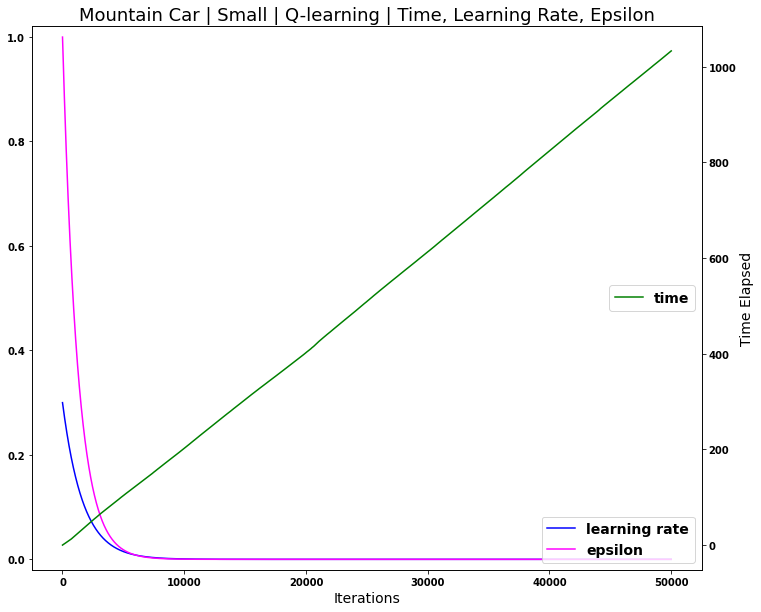

In [17]:
scores_s, scores_avg_s = mountain_car_s.Q_learning(num_episodes=50000, lr=0.3, epsilon_decay=0.9992, 
                                                   visualize=True, min_rate=0.000001, learning_rate_decay=0.9994)

In [156]:
def plot_q_curve(scores, avg_scores):
    plt.figure(figsize=(12,10))
    n = len(scores)
    plt.ylim(-200, -100)
    
    s=[]
    for i in range(1, n+1):
        s.append(scores[i-1])
        if i%10==0:
            s_avg = np.mean(s)
            plt.plot([i-5, i-5], [-200, s_avg], color="orange", linewidth=0.15)
            s = []
            
    plt.plot(np.arange(1, n+1), avg_scores, 'r-', label="Average reward")
    plt.ylabel("Reward", {"fontsize":14})
    plt.xlabel("Iteration", {"fontsize":14})
    plt.title("Mountain Car | Large | Q-learning | Rewards", {"fontsize": 18})
    plt.legend(fontsize=14)
    plt.savefig("curve_q_learning.png")
    plt.show() 

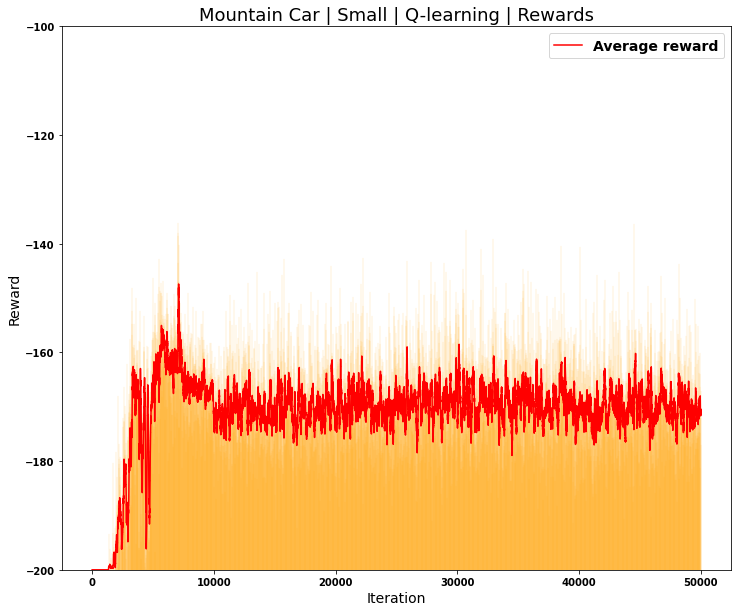

In [144]:
plot_q_curve(scores_s, scores_avg_s)

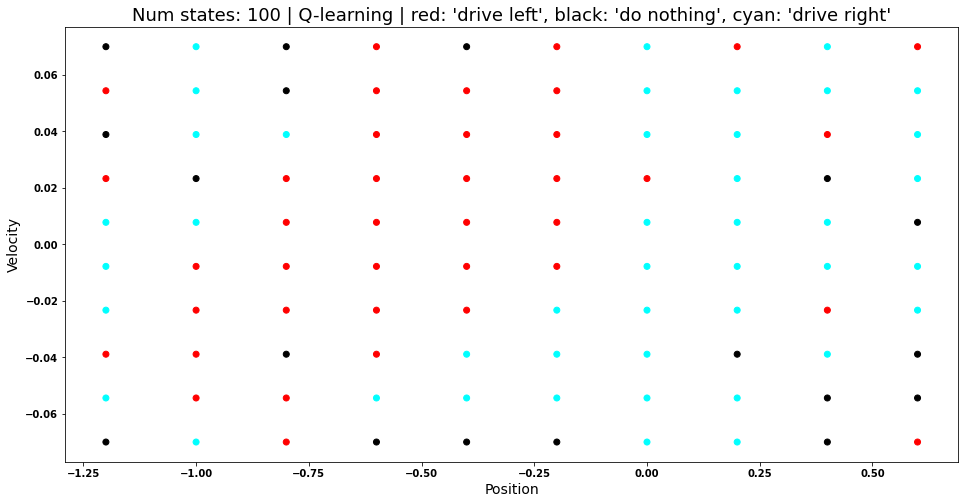

In [146]:
plot_policy_no_grid(mountain_car_s.optimal_policy, mountain_car_s.position_states, mountain_car_s.velocity_states,
                    figsize=(16,8), title="Num states: 100 | Q-learning | red: 'drive left', black: 'do nothing', cyan: 'drive right'")

In [150]:
r = []
l = mountain_car_s
for _ in range(100):
    state = l.env.reset()
    r_tot = 0
    while True:
        #mountain_car_s.env.render()
        ind_s = to_state(state, l.discrete_states, 10)
        #ind_s = state_to_index(state, l.position_states, 
        #                       l.velocity_states, l.state_size)
        a = np.argmax(l.optimal_policy[ind_s])
        state, reward, done, _ = l.env.step(a)
        r_tot -= 1
        if done:
            r.append(r_tot)
            r_tot = 0
            break
    #mountain_car_s.env.close()
print("avg:", np.mean(r))

avg: -168.7



Q-Learning

Episode 100
average score = -200.0
0.9901483535267248
0.39802484316695247

Episode 200
average score = -200.0
0.9802957226154846
0.39603963647322027

Episode 300
average score = -200.0
0.9705411318974407
0.3940643312861013

Episode 400
average score = -200.0
0.9608836058078369
0.3920988782203937

Episode 500
average score = -200.0
0.95132217848943
0.39014322813721153

Episode 600
average score = -200.0
0.9418558936958947
0.38819733214275604

Episode 700
average score = -200.0
0.9324838046961919
0.3862611415870936

Episode 800
average score = -200.0
0.9232049741798795
0.38433460806293945

Episode 900
average score = -200.0
0.9140184741633747
0.38241768340444615

Episode 1000
average score = -200.0
0.9049233858971459
0.3805103196860022

Episode 1100
average score = -200.0
0.8959187997738268
0.37861246922102987

Episode 1200
average score = -200.0
0.8870038152372448
0.3767240845607968

Episode 1300
average score = -200.0
0.8781775406923579
0.37484511849322755

Episode 1400
av

-159.0
-162.0
-195.0
-187.0

Episode 10700
average score = -199.03
0.3430244681773377
0.23427629645855877
-197.0

Episode 10800
average score = -199.97
0.33961114787393304
0.2331078094158611
-172.0
-186.0
-153.0
-176.0
-168.0

Episode 10900
average score = -198.55
0.3362317923648051
0.23194515037193938
-163.0
-176.0
-170.0
-189.0
-184.0
-192.0

Episode 11000
average score = -198.74
0.3328860636777899
0.23078829025880343
-170.0
-197.0
-198.0
-197.0

Episode 11100
average score = -199.62
0.3295736272037698
0.2296372001534438
-198.0

Episode 11200
average score = -199.98
0.32629415166320913
0.2284918512771091
-198.0

Episode 11300
average score = -199.98
0.3230473090730225
0.2273522149945861
-174.0
-163.0
-188.0
-199.0

Episode 11400
average score = -199.24
0.3198327747137729
0.2262182628134837
-161.0
-189.0
-194.0
-169.0
-152.0
-161.0

Episode 11500
average score = -198.26
0.3166502270971973
0.22508996638352077
-189.0
-154.0
-193.0
-191.0
-165.0
-164.0
-172.0
-196.0
-163.0
-192.0
-191.0


-175.0
-164.0
-161.0
-169.0
-150.0

Episode 15400
average score = -179.05
0.21438603222045388
0.18521092258548275
-175.0
-157.0
-183.0
-158.0
-172.0
-187.0
-159.0
-165.0
-170.0
-166.0
-170.0
-168.0
-198.0
-167.0
-173.0
-155.0
-152.0
-166.0

Episode 15500
average score = -194.41
0.21225274942452763
0.18428715621868147
-158.0
-164.0
-167.0
-158.0
-148.0
-181.0
-164.0
-189.0
-195.0
-190.0
-187.0
-165.0
-160.0
-187.0
-162.0
-190.0
-164.0
-191.0
-178.0
-186.0
-192.0
-192.0

Episode 15600
average score = -194.68
0.2101406942031791
0.18336799727075437
-190.0
-192.0
-150.0
-189.0
-126.0
-155.0
-157.0
-189.0
-195.0
-186.0
-179.0
-158.0
-190.0
-153.0
-164.0
-191.0
-156.0
-160.0
-152.0
-161.0
-159.0
-167.0
-177.0

Episode 15700
average score = -192.96
0.20804965532800315
0.1824534227615307
-158.0
-186.0
-180.0
-181.0
-190.0
-164.0
-156.0
-160.0
-159.0
-184.0
-180.0
-154.0
-171.0
-147.0
-171.0
-153.0
-181.0
-158.0
-155.0
-174.0
-185.0
-153.0
-187.0

Episode 15800
average score = -192.87
0.20597942

-162.0
-155.0
-154.0
-165.0
-169.0
-187.0
-155.0
-156.0
-160.0
-179.0
-162.0
-165.0
-158.0

Episode 18200
average score = -185.31
0.1620272089993836
0.16101407726645975
-175.0
-159.0
-160.0
-155.0
-157.0
-155.0
-158.0
-175.0
-168.0
-150.0
-149.0
-148.0
-160.0
-161.0
-146.0
-170.0
-160.0
-155.0
-160.0
-155.0
-136.0
-153.0
-172.0
-152.0
-167.0
-148.0
-190.0
-172.0
-154.0
-167.0
-184.0
-193.0
-160.0
-157.0
-186.0
-184.0
-186.0
-190.0
-159.0
-157.0
-198.0
-178.0
-160.0
-177.0
-177.0
-197.0
-182.0
-175.0
-177.0

Episode 18300
average score = -183.64
0.1604149311198484
0.1602109961787789
-162.0
-197.0
-194.0
-196.0
-159.0
-180.0
-157.0
-175.0
-189.0
-154.0
-197.0
-167.0
-168.0
-178.0
-178.0
-152.0
-182.0
-167.0
-169.0
-173.0
-179.0
-179.0
-182.0
-197.0
-151.0
-178.0
-177.0
-185.0
-154.0
-198.0
-150.0
-151.0
-197.0
-154.0
-155.0
-154.0
-158.0
-192.0
-158.0
-196.0
-158.0
-174.0
-179.0
-183.0
-157.0
-161.0
-156.0
-155.0
-157.0
-156.0
-149.0
-181.0
-198.0
-186.0
-161.0
-195.0
-164.0
-169.0
-196.

-191.0
-193.0
-157.0
-160.0
-157.0
-170.0
-154.0
-185.0
-196.0
-180.0
-148.0
-150.0
-156.0
-153.0
-193.0
-183.0
-187.0
-151.0
-157.0
-153.0
-152.0
-150.0
-154.0
-184.0
-169.0
-182.0
-147.0
-160.0
-147.0
-149.0
-155.0
-147.0
-166.0
-191.0
-186.0
-150.0
-182.0
-152.0
-150.0
-191.0
-199.0
-151.0
-162.0
-155.0
-186.0
-158.0
-156.0
-158.0
-154.0
-155.0
-158.0
-159.0
-154.0
-153.0
-192.0
-193.0
-162.0
-157.0
-157.0
-167.0
-163.0
-156.0
-151.0
-154.0
-165.0

Episode 20300
average score = -173.09
0.13133532391333846
0.14496454169948916
-187.0
-157.0
-191.0
-164.0
-198.0
-149.0
-191.0
-161.0
-186.0
-162.0
-156.0
-159.0
-162.0
-163.0
-182.0
-179.0
-157.0
-158.0
-162.0
-156.0
-180.0
-155.0
-158.0
-156.0
-189.0
-156.0
-158.0
-159.0
-160.0
-186.0
-182.0
-187.0
-153.0
-173.0
-157.0
-157.0
-160.0
-153.0
-157.0
-159.0
-182.0
-157.0
-151.0
-157.0
-155.0
-171.0
-160.0
-153.0
-162.0
-157.0
-155.0
-153.0
-154.0
-153.0
-155.0
-156.0
-151.0
-155.0
-160.0
-155.0
-165.0
-164.0
-172.0
-156.0
-163.0
-173.0
-160

-197.0
-152.0
-148.0
-148.0
-191.0
-150.0
-198.0
-157.0
-178.0
-155.0
-174.0
-177.0
-153.0
-158.0
-174.0
-144.0
-147.0
-151.0
-156.0
-143.0
-150.0
-151.0
-157.0
-199.0
-151.0
-146.0
-148.0
-178.0
-165.0
-168.0
-152.0
-154.0
-158.0
-152.0
-172.0
-176.0
-177.0
-191.0
-150.0
-155.0
-181.0
-180.0
-182.0
-149.0
-154.0
-175.0
-154.0
-152.0
-146.0
-148.0
-150.0

Episode 21900
average score = -179.34
0.11191568515586331
0.1338188704423163
-150.0
-156.0
-191.0
-141.0
-155.0
-155.0
-184.0
-180.0
-118.0
-194.0
-188.0
-190.0
-179.0
-182.0
-194.0
-189.0
-177.0
-182.0
-150.0
-191.0
-195.0
-193.0
-195.0
-154.0
-184.0
-198.0
-194.0
-150.0
-159.0
-154.0
-156.0
-153.0
-153.0
-153.0
-153.0
-172.0
-184.0
-182.0
-155.0
-191.0
-193.0
-161.0
-154.0
-154.0
-187.0
-188.0
-195.0
-118.0
-160.0
-190.0
-193.0
-160.0
-186.0
-175.0
-143.0
-186.0
-180.0
-184.0
-161.0
-155.0
-186.0
-183.0
-161.0
-152.0
-161.0

Episode 22000
average score = -181.4
0.11080205007775427
0.13315142939708904
-158.0
-145.0
-159.0
-158.0
-157

-150.0
-148.0
-145.0
-162.0
-173.0
-153.0
-164.0
-155.0
-153.0
-154.0
-174.0
-154.0
-155.0
-169.0
-149.0
-152.0
-166.0
-150.0
-148.0
-151.0
-154.0
-148.0
-153.0
-172.0
-149.0
-163.0
-165.0
-158.0
-150.0
-167.0
-156.0
-169.0
-147.0
-154.0
-144.0
-149.0
-153.0
-144.0
-153.0
-151.0
-146.0
-156.0
-174.0
-166.0
-146.0

Episode 23400
average score = -157.35
0.09632600040484954
0.12414935261269007
-147.0
-144.0
-150.0
-161.0
-148.0
-145.0
-154.0
-144.0
-149.0
-152.0
-197.0
-142.0
-162.0
-142.0
-164.0
-118.0
-162.0
-154.0
-160.0
-147.0
-149.0
-157.0
-156.0
-150.0
-193.0
-198.0
-123.0
-180.0
-162.0
-184.0
-193.0
-157.0
-162.0
-196.0
-157.0
-179.0
-163.0
-193.0
-173.0
-156.0
-189.0
-156.0
-181.0
-153.0
-147.0
-164.0
-199.0
-151.0
-191.0
-163.0
-194.0
-150.0
-196.0
-187.0
-155.0
-149.0
-148.0
-194.0
-156.0
-142.0
-191.0
-196.0
-199.0
-181.0
-150.0
-146.0
-184.0
-152.0
-161.0
-156.0
-164.0
-198.0
-169.0

Episode 23500
average score = -174.35
0.09536749299960612
0.12353013969153614
-164.0
-188.0
-1

-178.0
-176.0
-171.0
-144.0
-148.0
-150.0
-176.0
-169.0
-151.0
-146.0
-151.0
-146.0
-149.0
-151.0
-145.0
-165.0
-147.0
-174.0
-148.0
-151.0
-177.0
-171.0
-148.0
-150.0

Episode 24900
average score = -178.15
0.08290793503227657
0.11517853725117198
-166.0
-160.0
-149.0
-146.0
-154.0
-150.0
-152.0
-150.0
-173.0
-167.0
-149.0
-155.0
-152.0
-166.0
-153.0
-194.0
-180.0
-150.0
-150.0
-168.0
-176.0
-164.0
-147.0
-169.0
-152.0
-192.0
-171.0
-174.0
-145.0
-173.0
-150.0
-144.0
-148.0
-172.0
-192.0
-146.0
-149.0
-178.0
-180.0
-178.0
-178.0
-174.0
-156.0
-176.0

Episode 25000
average score = -183.68
0.08208294625097272
0.11460406757408853
-155.0
-160.0
-154.0
-148.0
-156.0
-151.0
-154.0
-188.0
-185.0
-188.0
-197.0
-186.0
-187.0
-186.0
-188.0
-194.0
-184.0
-183.0
-169.0
-184.0
-155.0
-183.0
-173.0
-187.0
-182.0
-180.0
-147.0
-153.0
-182.0
-147.0
-147.0
-151.0
-151.0
-185.0
-197.0
-147.0
-146.0
-156.0
-149.0

Episode 25100
average score = -188.15
0.08126616665361491
0.11403246314792566
-147.0
-175.0


-145.0
-153.0
-151.0
-150.0
-154.0
-144.0
-157.0
-162.0
-145.0
-148.0
-148.0
-166.0
-149.0
-146.0
-149.0
-147.0
-141.0
-146.0
-149.0
-144.0
-147.0
-160.0
-151.0
-151.0
-178.0
-154.0
-150.0
-151.0
-149.0
-145.0
-143.0
-147.0
-195.0
-147.0
-147.0
-149.0
-178.0
-146.0
-143.0
-142.0
-144.0
-186.0
-183.0
-149.0
-165.0
-155.0

Episode 26200
average score = -156.64
0.07280060570187737
0.10792988434542547
-173.0
-186.0
-168.0
-155.0
-162.0
-150.0
-146.0
-151.0
-136.0
-149.0
-145.0
-143.0
-146.0
-148.0
-147.0
-162.0
-118.0
-144.0
-192.0
-149.0
-185.0
-162.0
-114.0
-148.0
-113.0
-158.0
-142.0
-144.0
-154.0
-113.0
-111.0
-112.0
-148.0
-149.0
-148.0
-149.0
-149.0
-158.0
-111.0
-153.0
-183.0
-153.0
-113.0
-145.0
-152.0
-116.0
-160.0
-116.0
-148.0
-142.0
-151.0
-138.0
-187.0
-148.0
-157.0
-183.0
-155.0
-145.0
-151.0
-119.0
-153.0
-189.0
-149.0
-112.0
-150.0
-139.0
-112.0
-105.0
-156.0
-144.0
-145.0
-150.0
-161.0
-111.0
-142.0
-148.0
-159.0
-151.0
-109.0
-115.0
-111.0
-152.0
-155.0
-186.0
-154.0
-148

-167.0
-165.0
-166.0
-164.0
-163.0
-162.0
-164.0
-154.0
-152.0
-161.0
-156.0
-150.0
-155.0
-159.0
-168.0
-168.0
-160.0
-158.0
-158.0
-163.0
-153.0
-146.0
-148.0
-167.0
-172.0
-151.0
-152.0
-150.0
-155.0
-170.0
-148.0
-145.0
-154.0
-150.0
-169.0
-149.0
-149.0
-164.0
-147.0
-153.0
-148.0
-168.0
-168.0
-147.0
-147.0
-174.0
-165.0
-165.0
-145.0
-151.0
-153.0
-148.0
-162.0
-148.0
-142.0
-157.0

Episode 27600
average score = -175.93
0.06328936305231973
0.10063298103309798
-151.0
-142.0
-150.0
-143.0
-149.0
-146.0
-144.0
-144.0
-143.0
-154.0
-139.0
-150.0
-153.0
-150.0
-147.0
-148.0
-147.0
-149.0
-150.0
-143.0
-141.0
-140.0
-144.0
-147.0
-142.0
-169.0
-150.0
-148.0
-142.0
-159.0
-144.0
-144.0
-149.0
-145.0
-143.0
-188.0
-141.0
-143.0
-136.0
-142.0
-198.0
-142.0
-144.0
-147.0
-145.0
-143.0
-146.0
-146.0
-154.0
-145.0
-148.0
-143.0
-144.0
-142.0
-141.0
-145.0
-149.0
-150.0
-142.0
-148.0
-153.0
-150.0
-148.0
-142.0
-148.0
-142.0
-148.0
-140.0
-146.0
-142.0
-143.0
-146.0
-148.0
-145.0
-140.0
-146

-144.0
-147.0
-149.0
-141.0
-148.0
-148.0
-143.0
-149.0
-143.0
-159.0
-176.0
-159.0
-153.0
-167.0
-149.0
-163.0
-149.0
-174.0
-150.0
-148.0
-154.0
-142.0
-147.0
-149.0
-150.0
-145.0
-175.0
-183.0
-155.0
-183.0
-146.0
-135.0
-151.0
-168.0
-154.0
-140.0
-147.0
-152.0
-137.0
-154.0
-175.0
-170.0
-154.0
-178.0
-150.0
-161.0
-168.0
-150.0
-158.0
-180.0
-156.0
-165.0
-166.0
-162.0
-164.0
-156.0
-174.0
-155.0
-176.0
-159.0
-157.0
-157.0

Episode 28900
average score = -167.35
0.05557373926755218
0.09429973902648342
-180.0
-179.0
-157.0
-155.0
-157.0
-160.0
-150.0
-156.0
-152.0
-155.0
-156.0
-153.0
-153.0
-154.0
-160.0
-155.0
-158.0
-155.0
-154.0
-151.0
-152.0
-158.0
-154.0
-154.0
-148.0
-160.0
-152.0
-152.0
-150.0
-153.0
-153.0
-155.0
-150.0
-156.0
-156.0
-161.0
-153.0
-156.0
-156.0
-154.0
-151.0
-155.0
-157.0
-162.0
-151.0
-153.0
-157.0
-158.0
-151.0
-177.0
-159.0
-152.0
-161.0
-153.0
-151.0

Episode 29000
average score = -175.81
0.055020743810446755
0.09382940538689676
-152.0
-147.0
-152.0
-

-149.0
-151.0
-155.0
-154.0
-194.0
-191.0
-151.0
-147.0
-153.0
-149.0
-148.0
-146.0
-152.0
-147.0
-150.0
-151.0
-148.0
-151.0
-151.0
-148.0
-150.0
-151.0
-108.0
-159.0
-147.0
-150.0
-149.0
-113.0
-146.0
-149.0
-146.0
-190.0
-113.0
-158.0
-154.0
-152.0
-153.0
-153.0
-158.0
-161.0
-161.0
-153.0
-152.0
-157.0
-159.0
-154.0
-151.0
-151.0
-154.0
-150.0
-194.0
-150.0
-148.0
-160.0
-113.0
-154.0
-160.0
-152.0
-158.0
-118.0
-159.0
-158.0
-155.0
-195.0
-160.0
-154.0
-193.0
-155.0
-141.0
-144.0
-158.0
-164.0
-157.0
-157.0
-152.0
-151.0
-140.0
-145.0
-152.0

Episode 30100
average score = -150.29
0.04928918934544283
0.08880801652482771
-162.0
-154.0
-154.0
-192.0
-116.0
-140.0
-113.0
-154.0
-160.0
-145.0
-134.0
-146.0
-141.0
-143.0
-142.0
-116.0
-119.0
-145.0
-193.0
-140.0
-117.0
-144.0
-140.0
-161.0
-148.0
-125.0
-136.0
-144.0
-160.0
-151.0
-139.0
-144.0
-158.0
-158.0
-161.0
-162.0
-141.0
-157.0
-159.0
-164.0
-164.0
-159.0
-160.0
-156.0
-159.0
-159.0
-155.0
-155.0
-153.0
-159.0
-157.0
-192.0
-189

-164.0
-167.0
-167.0
-114.0
-117.0
-170.0
-145.0
-186.0
-181.0
-171.0
-172.0
-123.0
-116.0
-118.0
-179.0
-157.0
-162.0
-174.0
-167.0
-153.0
-159.0
-156.0
-179.0
-157.0
-189.0
-159.0
-152.0
-112.0
-121.0
-148.0
-115.0
-160.0
-172.0
-154.0
-150.0
-191.0
-174.0
-175.0
-163.0
-160.0
-153.0
-189.0
-176.0
-167.0
-179.0
-189.0
-147.0
-164.0
-186.0
-167.0
-118.0
-114.0
-147.0
-169.0
-157.0
-118.0
-117.0
-180.0
-149.0
-180.0
-155.0
-150.0
-173.0

Episode 31300
average score = -164.94
0.04371532702945884
0.08363611480259889
-145.0
-113.0
-179.0
-162.0
-151.0
-183.0
-148.0
-162.0
-186.0
-171.0
-184.0
-188.0
-190.0
-187.0
-179.0
-151.0
-179.0
-124.0
-153.0
-183.0
-177.0
-186.0
-176.0
-149.0
-148.0
-189.0
-142.0
-185.0
-143.0
-151.0
-184.0
-144.0
-150.0
-153.0
-156.0
-185.0
-156.0
-155.0
-148.0
-121.0
-189.0
-166.0
-171.0
-152.0
-168.0
-161.0
-115.0
-180.0
-152.0
-169.0
-125.0
-154.0
-116.0
-153.0
-153.0
-157.0
-150.0
-114.0
-188.0
-151.0
-147.0
-195.0
-189.0
-155.0
-187.0
-150.0
-185.0
-153.0
-160

-151.0
-143.0
-158.0
-163.0
-118.0
-121.0
-120.0
-120.0
-150.0
-150.0
-147.0
-146.0
-160.0
-123.0
-156.0
-123.0
-157.0
-174.0
-152.0
-169.0
-150.0
-150.0
-145.0
-181.0
-181.0
-147.0
-150.0
-184.0
-182.0
-130.0
-149.0
-156.0
-145.0
-150.0
-145.0
-146.0
-172.0
-149.0
-189.0
-144.0
-143.0
-142.0
-181.0
-146.0
-148.0
-133.0
-148.0
-179.0
-129.0
-127.0
-131.0
-149.0
-148.0
-141.0
-150.0
-145.0
-182.0
-185.0
-187.0
-153.0
-147.0
-136.0
-191.0
-148.0
-177.0
-178.0

Episode 32800
average score = -162.93
0.0376258484525497
0.07759271523861139
-180.0
-152.0
-140.0
-148.0
-185.0
-145.0
-152.0
-151.0
-179.0
-150.0
-150.0
-181.0
-184.0
-148.0
-184.0
-184.0
-149.0
-150.0
-177.0
-180.0
-179.0
-177.0
-178.0
-139.0
-147.0
-151.0
-144.0
-146.0
-145.0
-142.0
-181.0
-149.0
-148.0
-146.0
-143.0
-149.0
-149.0
-181.0
-146.0
-187.0
-150.0
-140.0
-183.0
-147.0
-186.0
-144.0
-131.0
-141.0
-145.0
-143.0
-149.0
-143.0
-128.0
-140.0
-142.0
-144.0
-145.0
-169.0
-147.0
-147.0
-147.0
-155.0
-145.0
-198.0
-148.0
-140.

-151.0
-144.0
-151.0
-144.0
-152.0
-147.0
-198.0
-196.0
-149.0
-149.0
-148.0
-145.0
-153.0
-152.0
-126.0
-156.0
-123.0
-149.0
-153.0
-149.0
-150.0
-149.0
-151.0
-148.0
-147.0
-147.0
-126.0
-125.0
-157.0
-147.0
-147.0
-158.0
-145.0
-151.0
-171.0
-152.0
-117.0
-145.0
-151.0
-145.0
-147.0
-148.0
-153.0
-142.0
-118.0
-146.0
-121.0
-143.0
-119.0
-116.0
-119.0
-142.0
-146.0
-145.0
-120.0
-118.0
-153.0
-142.0
-123.0
-145.0
-117.0
-145.0
-151.0
-146.0
-119.0
-118.0
-154.0
-149.0
-114.0
-140.0
-144.0
-146.0
-151.0
-149.0
-119.0

Episode 34000
average score = -149.79
0.03337093370183701
0.07307395766155406
-116.0
-144.0
-117.0
-141.0
-144.0
-118.0
-147.0
-145.0
-143.0
-147.0
-142.0
-142.0
-143.0
-117.0
-149.0
-118.0
-122.0
-119.0
-116.0
-144.0
-142.0
-118.0
-150.0
-118.0
-116.0
-149.0
-118.0
-143.0
-112.0
-148.0
-149.0
-144.0
-117.0
-117.0
-152.0
-146.0
-148.0
-152.0
-149.0
-151.0
-114.0
-142.0
-146.0
-144.0
-148.0
-145.0
-125.0
-144.0
-152.0
-120.0
-154.0
-144.0
-114.0
-147.0
-155.0
-142.0
-117

-172.0
-124.0
-118.0
-169.0
-173.0
-162.0
-120.0
-152.0
-155.0
-147.0
-171.0
-179.0
-125.0
-162.0
-177.0
-127.0
-167.0
-175.0
-116.0
-140.0
-170.0
-152.0
-148.0
-150.0
-152.0
-151.0
-145.0
-149.0
-160.0
-123.0
-124.0
-148.0
-173.0
-167.0
-148.0
-145.0
-162.0
-149.0
-168.0
-180.0
-149.0
-122.0
-164.0
-145.0
-127.0
-122.0
-122.0
-150.0
-148.0
-146.0
-129.0
-145.0
-145.0
-145.0
-139.0
-161.0
-123.0
-140.0
-165.0
-175.0
-146.0
-158.0
-124.0
-149.0
-124.0
-119.0
-125.0
-117.0
-148.0
-150.0
-143.0
-142.0
-179.0
-145.0
-149.0
-154.0
-139.0
-142.0
-139.0
-150.0
-121.0
-143.0
-149.0
-148.0
-170.0
-168.0

Episode 35100
average score = -149.75
0.029894657104794775
0.06916332052604157
-150.0
-149.0
-139.0
-142.0
-121.0
-150.0
-147.0
-187.0
-161.0
-117.0
-123.0
-122.0
-121.0
-124.0
-139.0
-152.0
-139.0
-151.0
-175.0
-155.0
-144.0
-120.0
-159.0
-140.0
-148.0
-143.0
-162.0
-167.0
-148.0
-168.0
-149.0
-152.0
-142.0
-138.0
-141.0
-154.0
-118.0
-168.0
-141.0
-121.0
-171.0
-173.0
-160.0
-149.0
-168.0
-14

-139.0
-141.0
-161.0
-140.0
-112.0
-159.0
-147.0
-192.0
-160.0
-149.0
-140.0
-119.0
-154.0
-113.0
-159.0
-139.0
-139.0
-115.0
-190.0
-194.0
-146.0
-151.0
-196.0
-142.0
-138.0
-121.0
-144.0
-152.0
-119.0
-149.0
-157.0
-110.0
-150.0
-142.0
-113.0
-159.0
-138.0
-117.0
-148.0
-116.0
-116.0
-150.0
-187.0
-188.0
-151.0
-116.0
-117.0
-113.0
-190.0
-114.0
-138.0
-141.0
-150.0
-148.0
-117.0
-191.0
-117.0
-148.0
-150.0
-138.0
-151.0
-116.0
-149.0
-149.0
-117.0
-161.0
-157.0
-150.0
-142.0
-147.0
-182.0
-156.0
-143.0
-138.0
-123.0
-158.0
-150.0
-142.0
-138.0
-116.0
-116.0
-116.0
-149.0
-118.0
-150.0
-139.0

Episode 36200
average score = -142.21
0.02678050699444649
0.06546196564777987
-148.0
-192.0
-149.0
-114.0
-151.0
-115.0
-118.0
-142.0
-114.0
-150.0
-139.0
-140.0
-142.0
-151.0
-116.0
-143.0
-144.0
-115.0
-138.0
-139.0
-139.0
-114.0
-117.0
-114.0
-137.0
-116.0
-139.0
-144.0
-117.0
-138.0
-117.0
-143.0
-142.0
-142.0
-141.0
-151.0
-159.0
-121.0
-159.0
-137.0
-117.0
-149.0
-137.0
-113.0
-121.0
-138

-156.0
-147.0
-190.0
-147.0
-184.0
-151.0
-148.0
-157.0

Episode 37200
average score = -155.22
0.02423188363475019
0.062269270070592686
-146.0
-157.0
-184.0
-159.0
-155.0
-184.0
-149.0
-187.0
-161.0
-150.0
-147.0
-191.0
-152.0
-159.0
-194.0
-151.0
-156.0
-159.0
-189.0
-152.0
-192.0
-147.0
-195.0
-149.0
-151.0
-159.0
-155.0
-190.0
-184.0
-146.0
-149.0
-150.0
-152.0
-147.0
-143.0
-182.0
-151.0
-184.0
-149.0
-151.0
-149.0
-144.0
-182.0
-149.0
-150.0
-150.0
-149.0
-150.0
-149.0
-151.0
-150.0
-147.0
-183.0
-148.0
-152.0
-149.0
-151.0
-145.0
-150.0
-150.0
-157.0
-146.0
-148.0
-181.0
-147.0
-149.0
-149.0
-150.0
-147.0
-146.0
-186.0
-148.0
-183.0
-147.0
-153.0
-148.0
-148.0
-148.0
-151.0
-147.0
-156.0
-149.0
-185.0
-183.0
-148.0
-183.0
-148.0
-187.0
-144.0
-158.0
-156.0
-148.0
-149.0
-148.0
-150.0
-157.0
-152.0
-148.0
-145.0
-182.0

Episode 37300
average score = -158.11
0.023990760367830717
0.06195869304536386
-150.0
-146.0
-147.0
-145.0
-184.0
-187.0
-147.0
-156.0
-152.0
-188.0
-151.0
-150.0


-148.0
-147.0
-114.0
-143.0
-146.0
-146.0
-117.0
-113.0
-147.0
-146.0
-113.0
-111.0
-113.0
-175.0
-147.0
-147.0
-113.0
-147.0
-113.0
-193.0
-112.0
-146.0
-111.0
-147.0
-112.0
-154.0
-168.0
-147.0
-112.0
-113.0
-149.0
-149.0
-148.0
-146.0
-158.0
-112.0
-145.0
-145.0
-111.0
-143.0
-147.0
-146.0
-112.0
-150.0
-159.0
-158.0
-149.0
-114.0
-149.0
-147.0
-150.0
-161.0
-151.0
-152.0
-160.0
-156.0
-113.0
-115.0
-165.0
-161.0
-165.0
-113.0

Episode 38400
average score = -147.36
0.021491623857084897
0.05864290211731233
-113.0
-113.0
-152.0
-151.0
-114.0
-151.0
-153.0
-153.0
-153.0
-160.0
-113.0
-160.0
-151.0
-150.0
-153.0
-113.0
-113.0
-149.0
-156.0
-156.0
-156.0
-152.0
-112.0
-153.0
-151.0
-151.0
-112.0
-156.0
-113.0
-150.0
-160.0
-151.0
-153.0
-151.0
-114.0
-150.0
-164.0
-153.0
-152.0
-153.0
-177.0
-158.0
-156.0
-113.0
-153.0
-157.0
-154.0
-154.0
-161.0
-156.0
-162.0
-153.0
-111.0
-111.0
-156.0
-153.0
-152.0
-151.0
-153.0
-194.0
-153.0
-156.0
-154.0
-153.0
-157.0
-112.0
-160.0
-149.0
-151.0
-11

-152.0
-110.0
-150.0
-161.0
-160.0
-110.0
-164.0
-152.0
-114.0
-157.0
-148.0
-153.0
-150.0
-151.0
-153.0
-110.0
-148.0
-147.0
-150.0
-152.0
-155.0
-151.0
-150.0
-155.0
-164.0
-153.0
-112.0
-111.0
-147.0
-150.0
-111.0
-148.0
-157.0
-150.0
-149.0
-111.0
-160.0
-156.0
-148.0
-108.0
-109.0
-150.0
-149.0
-110.0
-113.0
-111.0
-110.0
-111.0
-149.0
-110.0
-147.0
-150.0
-162.0
-151.0
-153.0
-160.0
-111.0
-163.0
-149.0
-112.0
-111.0
-146.0
-147.0
-157.0
-149.0
-147.0
-111.0
-149.0
-112.0
-110.0
-147.0
-149.0
-111.0
-147.0
-148.0
-154.0
-150.0
-111.0
-147.0
-160.0
-149.0
-150.0
-150.0
-111.0
-149.0
-149.0
-153.0
-151.0
-160.0
-110.0

Episode 39500
average score = -139.78
0.01925282437624492
0.055504559565560434
-152.0
-149.0
-150.0
-150.0
-150.0
-149.0
-154.0
-153.0
-152.0
-151.0
-151.0
-149.0
-150.0
-148.0
-149.0
-159.0
-152.0
-149.0
-149.0
-112.0
-151.0
-110.0
-149.0
-147.0
-148.0
-150.0
-150.0
-154.0
-148.0
-156.0
-112.0
-150.0
-111.0
-108.0
-159.0
-149.0
-148.0
-152.0
-149.0
-159.0
-149.0
-14

-190.0
-149.0
-109.0
-115.0
-155.0
-158.0
-107.0
-187.0
-181.0
-110.0
-148.0
-151.0
-148.0
-190.0
-109.0
-145.0
-107.0
-157.0

Episode 40500
average score = -143.93
0.01742058878953236
0.05279750425359237
-150.0
-190.0
-147.0
-147.0
-161.0
-117.0
-186.0
-160.0
-143.0
-189.0
-189.0
-108.0
-146.0
-163.0
-190.0
-150.0
-116.0
-107.0
-118.0
-108.0
-108.0
-109.0
-158.0
-108.0
-187.0
-191.0
-150.0
-108.0
-187.0
-147.0
-110.0
-158.0
-186.0
-188.0
-187.0
-188.0
-190.0
-195.0
-145.0
-116.0
-108.0
-119.0
-189.0
-109.0
-151.0
-186.0
-110.0
-162.0
-146.0
-190.0
-151.0
-186.0
-148.0
-144.0
-185.0
-160.0
-107.0
-144.0
-119.0
-186.0
-188.0
-161.0
-110.0
-154.0
-184.0
-109.0
-186.0
-150.0
-117.0
-158.0
-148.0
-115.0
-188.0
-109.0
-190.0
-195.0
-152.0
-187.0
-191.0
-109.0
-149.0
-151.0
-108.0
-159.0
-189.0
-153.0
-190.0
-192.0
-111.0
-156.0
-150.0
-193.0
-114.0
-191.0
-188.0
-109.0
-151.0
-150.0
-108.0
-187.0

Episode 40600
average score = -153.01
0.01724724241069084
0.05253416903556272
-117.0
-150.0
-1

-147.0
-149.0
-147.0
-150.0
-149.0
-152.0
-150.0
-153.0
-149.0
-149.0
-149.0
-151.0
-161.0
-151.0
-155.0
-152.0
-167.0
-159.0
-149.0
-147.0
-184.0
-145.0
-147.0
-149.0
-161.0
-151.0
-157.0
-151.0
-145.0
-149.0
-148.0
-144.0
-167.0
-147.0
-147.0
-165.0
-153.0
-148.0
-147.0
-166.0
-179.0
-166.0
-155.0
-167.0

Episode 41600
average score = -154.23
0.01560587225637119
0.049971984911219375
-168.0
-150.0
-168.0
-159.0
-158.0
-144.0
-153.0
-149.0
-163.0
-156.0
-149.0
-144.0
-147.0
-153.0
-146.0
-146.0
-156.0
-163.0
-169.0
-154.0
-157.0
-155.0
-162.0
-155.0
-148.0
-154.0
-145.0
-147.0
-152.0
-148.0
-162.0
-149.0
-157.0
-155.0
-160.0
-159.0
-161.0
-151.0
-160.0
-155.0
-146.0
-149.0
-160.0
-144.0
-164.0
-163.0
-159.0
-162.0
-158.0
-146.0
-151.0
-154.0
-162.0
-157.0
-150.0
-161.0
-150.0
-145.0
-163.0
-148.0
-145.0
-147.0
-152.0
-163.0
-161.0
-157.0
-158.0
-157.0
-148.0
-176.0
-158.0
-152.0
-161.0
-158.0
-186.0
-178.0
-152.0
-162.0
-178.0
-154.0
-160.0
-153.0
-172.0
-158.0
-160.0
-159.0
-175.0
-16

-182.0
-183.0
-152.0
-154.0
-182.0
-153.0
-181.0
-150.0
-153.0
-175.0
-160.0
-149.0
-150.0
-151.0
-149.0
-156.0
-183.0
-150.0
-149.0
-151.0
-183.0
-184.0
-188.0
-186.0
-150.0
-185.0
-149.0
-153.0
-185.0
-188.0
-153.0
-185.0
-150.0
-191.0
-155.0
-154.0
-154.0
-164.0
-150.0
-150.0
-150.0
-157.0
-153.0
-154.0
-151.0
-166.0
-185.0
-155.0
-152.0
-151.0
-154.0
-187.0
-152.0
-154.0
-154.0
-152.0
-154.0
-188.0
-151.0
-154.0
-153.0
-150.0
-151.0

Episode 42700
average score = -161.06
0.01398019618191759
0.04729767649570724
-189.0
-184.0
-156.0
-187.0
-150.0
-162.0
-182.0
-160.0
-164.0
-152.0
-187.0
-154.0
-149.0
-154.0
-152.0
-167.0
-160.0
-151.0
-155.0
-159.0
-180.0
-181.0
-188.0
-152.0
-154.0
-147.0
-183.0
-184.0
-155.0
-153.0
-158.0
-158.0
-154.0
-155.0
-158.0
-150.0
-154.0
-156.0
-181.0
-149.0
-149.0
-151.0
-156.0
-186.0
-148.0
-188.0
-147.0
-148.0
-156.0
-159.0
-152.0
-152.0
-186.0
-189.0
-155.0
-194.0
-170.0
-159.0
-190.0
-158.0
-155.0
-150.0
-153.0
-170.0
-154.0
-186.0
-185.0
-156.0
-155

-154.0
-150.0
-148.0
-162.0
-157.0
-183.0
-147.0
-146.0
-182.0
-185.0
-146.0
-154.0
-184.0
-184.0
-148.0
-184.0
-157.0
-184.0
-150.0
-148.0
-152.0
-184.0
-152.0
-150.0
-147.0
-182.0
-149.0
-159.0
-160.0
-154.0
-150.0
-160.0
-156.0
-154.0
-153.0
-184.0
-162.0
-188.0
-160.0
-150.0
-157.0
-183.0
-184.0
-184.0
-162.0
-184.0
-149.0
-151.0
-184.0
-148.0
-153.0
-185.0
-184.0
-162.0
-192.0
-163.0
-152.0
-150.0
-185.0
-164.0
-159.0
-159.0
-164.0
-187.0
-150.0
-157.0
-155.0
-188.0
-162.0
-185.0
-152.0
-147.0
-186.0
-148.0
-161.0
-150.0
-149.0
-184.0
-150.0
-192.0
-151.0
-185.0
-149.0
-183.0

Episode 43800
average score = -163.09
0.01252386807184786
0.04476648677988217
-157.0
-191.0
-161.0
-160.0
-163.0
-153.0
-158.0
-152.0
-160.0
-151.0
-185.0
-150.0
-159.0
-161.0
-186.0
-184.0
-150.0
-149.0
-159.0
-158.0
-157.0
-149.0
-151.0
-151.0
-149.0
-160.0
-161.0
-187.0
-160.0
-186.0
-125.0
-158.0
-198.0
-149.0
-158.0
-183.0
-161.0
-183.0
-186.0
-161.0
-149.0
-161.0
-163.0
-157.0
-151.0
-150.0
-151.0
-161

-145.0
-160.0
-158.0
-161.0
-149.0
-146.0
-117.0
-108.0
-155.0
-157.0
-164.0
-108.0
-108.0

Episode 44800
average score = -139.04
0.01133200778599572
0.04258314622580596
-146.0
-161.0
-109.0
-109.0
-108.0
-162.0
-107.0
-109.0
-146.0
-107.0
-159.0
-148.0
-145.0
-149.0
-108.0
-109.0
-108.0
-164.0
-108.0
-163.0
-153.0
-164.0
-149.0
-108.0
-114.0
-108.0
-109.0
-149.0
-162.0
-146.0
-108.0
-111.0
-109.0
-163.0
-148.0
-163.0
-149.0
-152.0
-148.0
-156.0
-109.0
-163.0
-148.0
-148.0
-149.0
-165.0
-162.0
-146.0
-148.0
-164.0
-149.0
-145.0
-109.0
-150.0
-157.0
-108.0
-147.0
-108.0
-107.0
-148.0
-165.0
-154.0
-150.0
-149.0
-109.0
-109.0
-187.0
-147.0
-115.0
-146.0
-109.0
-164.0
-149.0
-147.0
-108.0
-156.0
-153.0
-152.0
-158.0
-157.0
-148.0
-157.0
-147.0
-148.0
-110.0
-158.0
-108.0
-159.0
-158.0
-147.0
-163.0
-157.0
-110.0
-108.0
-107.0
-157.0
-109.0
-108.0
-108.0
-109.0

Episode 44900
average score = -137.84
0.011219246814570538
0.04237075660144228
-156.0
-107.0
-160.0
-145.0
-148.0
-107.0
-145.0
-

-148.0
-150.0
-152.0
-111.0
-148.0
-149.0
-149.0
-109.0
-147.0
-110.0
-150.0
-149.0
-148.0
-150.0
-155.0
-148.0
-157.0
-146.0
-157.0
-148.0
-150.0
-151.0
-111.0
-149.0
-151.0
-147.0
-151.0
-152.0
-158.0
-150.0
-156.0
-151.0
-152.0
-110.0
-149.0
-149.0
-152.0
-150.0
-152.0
-109.0
-156.0
-112.0
-149.0
-154.0
-151.0
-153.0
-157.0
-153.0
-153.0
-152.0
-155.0
-149.0

Episode 45900
average score = -141.8
0.010151543558775476
0.04030426003561407
-158.0
-147.0
-146.0
-157.0
-160.0
-153.0
-112.0
-148.0
-111.0
-112.0
-151.0
-110.0
-151.0
-150.0
-109.0
-110.0
-153.0
-108.0
-152.0
-110.0
-149.0
-151.0
-111.0
-150.0
-153.0
-154.0
-149.0
-148.0
-151.0
-146.0
-149.0
-154.0
-144.0
-116.0
-143.0
-148.0
-151.0
-146.0
-152.0
-149.0
-140.0
-153.0
-146.0
-141.0
-139.0
-113.0
-145.0
-152.0
-115.0
-153.0
-150.0
-143.0
-152.0
-150.0
-149.0
-147.0
-116.0
-115.0
-146.0
-150.0
-139.0
-115.0
-152.0
-147.0
-117.0
-150.0
-140.0
-139.0
-144.0
-137.0
-142.0
-118.0
-112.0
-145.0
-155.0
-140.0
-151.0
-139.0
-147.0
-148

-184.0
-155.0
-150.0
-152.0
-185.0
-174.0
-199.0
-156.0
-149.0
-183.0
-155.0
-150.0
-175.0
-151.0
-150.0
-163.0
-182.0
-167.0
-189.0
-151.0
-158.0
-192.0
-197.0
-191.0
-121.0
-149.0
-158.0
-193.0
-177.0
-176.0
-151.0
-174.0
-160.0
-149.0
-198.0
-181.0
-154.0
-194.0
-191.0
-178.0
-192.0
-162.0
-178.0
-187.0
-197.0
-197.0
-160.0
-190.0
-179.0
-162.0
-150.0
-180.0
-191.0
-183.0
-192.0
-161.0
-153.0
-189.0
-187.0
-184.0
-191.0
-182.0

Episode 47000
average score = -178.83
0.00909404922515775
0.03814733106859934
-192.0
-191.0
-189.0
-163.0
-192.0
-148.0
-174.0
-187.0
-187.0
-150.0
-191.0
-149.0
-151.0
-175.0
-173.0
-157.0
-153.0
-187.0
-147.0
-187.0
-182.0
-185.0
-154.0
-187.0
-177.0
-189.0
-186.0
-150.0
-157.0
-150.0
-150.0
-150.0
-149.0
-186.0
-182.0
-155.0
-150.0
-180.0
-189.0
-187.0
-150.0
-153.0
-195.0
-198.0
-155.0
-175.0
-196.0
-191.0
-186.0
-180.0
-190.0
-166.0
-184.0
-190.0
-187.0
-188.0
-189.0
-155.0
-183.0
-173.0
-186.0
-154.0
-183.0
-174.0
-148.0
-149.0
-186.0
-186.0
-190.0
-179

-144.0
-143.0
-146.0
-149.0
-148.0
-153.0
-146.0
-120.0
-149.0
-149.0
-147.0
-143.0
-145.0
-141.0
-121.0
-149.0
-150.0
-121.0
-120.0
-119.0
-150.0
-147.0
-119.0
-142.0
-149.0
-121.0
-149.0
-121.0
-151.0
-121.0
-146.0
-148.0
-147.0
-149.0
-147.0
-146.0
-154.0
-144.0
-153.0
-149.0
-143.0
-152.0
-150.0
-148.0
-142.0
-123.0
-121.0
-144.0
-149.0
-150.0
-146.0
-145.0
-147.0
-120.0
-151.0
-149.0
-119.0
-118.0
-120.0
-143.0
-147.0
-144.0
-152.0
-144.0
-148.0
-121.0
-147.0
-119.0
-141.0
-147.0
-121.0
-121.0
-141.0
-119.0
-146.0
-122.0
-140.0
-147.0
-142.0
-147.0
-150.0
-152.0
-149.0
-142.0
-147.0
-146.0
-145.0
-122.0
-146.0

Episode 48100
average score = -139.27
0.008146714913920754
0.03610583264328502
-153.0
-141.0
-121.0
-148.0
-121.0
-147.0
-142.0
-145.0
-142.0
-143.0
-119.0
-146.0
-141.0
-117.0
-122.0
-142.0
-147.0
-147.0
-147.0
-147.0
-121.0
-119.0
-149.0
-147.0
-149.0
-141.0
-144.0
-142.0
-146.0
-142.0
-146.0
-122.0
-147.0
-143.0
-141.0
-147.0
-122.0
-147.0
-146.0
-121.0
-121.0
-120.0
-14

-145.0
-114.0
-153.0
-151.0
-144.0
-108.0
-150.0
-148.0
-153.0
-150.0
-139.0
-154.0
-152.0
-111.0
-110.0
-109.0
-109.0

Episode 49100
average score = -135.34
0.00737141562855959
0.03434488747382395
-136.0
-113.0
-111.0
-145.0
-152.0
-145.0
-148.0
-150.0
-141.0
-146.0
-153.0
-149.0
-148.0
-150.0
-150.0
-114.0
-152.0
-110.0
-112.0
-162.0
-109.0
-135.0
-150.0
-166.0
-152.0
-138.0
-109.0
-138.0
-135.0
-150.0
-153.0
-141.0
-109.0
-146.0
-110.0
-112.0
-148.0
-149.0
-143.0
-151.0
-149.0
-109.0
-149.0
-145.0
-138.0
-135.0
-150.0
-151.0
-109.0
-136.0
-148.0
-111.0
-109.0
-150.0
-150.0
-152.0
-151.0
-149.0
-148.0
-148.0
-110.0
-144.0
-155.0
-152.0
-140.0
-151.0
-114.0
-141.0
-138.0
-146.0
-138.0
-148.0
-109.0
-151.0
-110.0
-153.0
-136.0
-150.0
-110.0
-109.0
-136.0
-159.0
-148.0
-112.0
-149.0
-111.0
-152.0
-151.0
-138.0
-110.0
-109.0
-146.0
-149.0
-151.0
-110.0
-148.0
-111.0
-145.0
-150.0
-113.0

Episode 49200
average score = -137.21
0.007298065168274667
0.0341735873610822
-148.0
-111.0
-149.0
-1

-142.0
-110.0
-141.0
-111.0
-156.0
-111.0
-111.0
-109.0
-152.0
-112.0
-109.0
-109.0
-111.0
-151.0
-141.0
-110.0
-111.0
-108.0
-156.0
-153.0
-110.0
-144.0
-142.0
-142.0
-109.0
-110.0
-108.0
-111.0
-108.0
-156.0
-111.0
-108.0
-110.0
-109.0
-109.0
-114.0
-109.0
-141.0
-108.0
-141.0
-143.0
-110.0
-154.0
-141.0
-141.0
-147.0
-111.0
-150.0
-109.0
-111.0
-156.0
-109.0
-110.0
-109.0
-150.0
-113.0
-109.0
-110.0
-146.0
-112.0
-111.0
-109.0
-112.0

Episode 50200
average score = -122.57
0.006603529423588866
0.03250688120362593
-150.0
-161.0
-152.0
-153.0
-113.0
-111.0
-112.0
-110.0
-108.0
-149.0
-108.0
-112.0
-159.0
-111.0
-109.0
-147.0
-111.0
-109.0
-151.0
-150.0
-109.0
-147.0
-108.0
-160.0
-109.0
-147.0
-154.0
-149.0
-110.0
-110.0
-150.0
-151.0
-110.0
-109.0
-111.0
-110.0
-151.0
-110.0
-147.0
-113.0
-144.0
-109.0
-110.0
-109.0
-166.0
-112.0
-111.0
-109.0
-148.0
-154.0
-112.0
-109.0
-111.0
-110.0
-109.0
-109.0
-143.0
-148.0
-112.0
-146.0
-109.0
-111.0
-110.0
-109.0
-146.0
-111.0
-149.0
-164.0
-11

-156.0
-152.0
-156.0
-109.0
-111.0
-159.0
-156.0
-157.0
-108.0
-110.0
-112.0
-156.0
-112.0
-148.0
-112.0
-151.0
-161.0
-111.0
-110.0
-113.0
-108.0
-107.0
-111.0
-111.0
-113.0
-157.0
-111.0
-157.0
-108.0
-109.0
-112.0
-161.0
-152.0
-111.0
-150.0
-110.0
-116.0
-145.0
-92.0
-150.0
-160.0
-156.0
-111.0
-111.0
-108.0
-112.0
-150.0
-159.0
-108.0
-156.0
-159.0
-110.0
-110.0
-110.0
-161.0
-113.0
-111.0
-109.0
-109.0
-151.0
-110.0
-112.0
-110.0
-108.0
-111.0
-111.0
-110.0
-110.0
-112.0
-111.0
-108.0
-148.0
-109.0
-157.0
-146.0
-108.0
-112.0
-110.0
-148.0
-146.0
-110.0
-153.0
-155.0
-110.0
-113.0
-109.0
-110.0
-109.0
-151.0
-147.0
-113.0
-146.0

Episode 51300
average score = -125.25
0.0059156345328373406
0.030767237959128863
-111.0
-150.0
-146.0
-146.0
-146.0
-157.0
-109.0
-153.0
-113.0
-147.0
-111.0
-146.0
-111.0
-149.0
-150.0
-113.0
-110.0
-137.0
-109.0
-156.0
-151.0
-109.0
-147.0
-151.0
-110.0
-108.0
-150.0
-115.0
-110.0
-110.0
-149.0
-111.0
-112.0
-147.0
-109.0
-110.0
-110.0
-108.0
-157.0
-1

-166.0
-146.0
-167.0
-170.0
-185.0
-163.0
-164.0
-158.0
-169.0
-146.0
-171.0
-178.0
-121.0
-162.0
-169.0
-158.0
-150.0
-174.0
-149.0
-177.0
-166.0
-115.0
-172.0
-169.0
-167.0
-147.0
-171.0
-163.0
-170.0
-159.0
-157.0

Episode 52300
average score = -159.64
0.005352660711582129
0.029266665472764696
-173.0
-185.0
-160.0
-146.0
-170.0
-172.0
-171.0
-147.0
-162.0
-174.0
-165.0
-173.0
-170.0
-148.0
-154.0
-171.0
-165.0
-177.0
-169.0
-150.0
-157.0
-151.0
-165.0
-144.0
-154.0
-157.0
-149.0
-162.0
-170.0
-150.0
-174.0
-147.0
-167.0
-139.0
-179.0
-160.0
-161.0
-150.0
-160.0
-150.0
-165.0
-167.0
-175.0
-157.0
-175.0
-148.0
-170.0
-150.0
-167.0
-173.0
-168.0
-148.0
-169.0
-138.0
-145.0
-166.0
-173.0
-139.0
-171.0
-170.0
-145.0
-174.0
-160.0
-161.0
-170.0
-168.0
-173.0
-173.0
-165.0
-169.0
-151.0
-162.0
-172.0
-173.0
-165.0
-170.0
-169.0
-168.0
-160.0
-172.0
-162.0
-173.0
-173.0
-150.0
-139.0
-172.0
-157.0
-174.0
-168.0
-150.0
-157.0
-148.0
-166.0
-172.0
-150.0
-166.0
-159.0
-170.0
-171.0
-160.0

E

-140.0
-151.0
-141.0
-150.0
-122.0
-121.0
-140.0
-139.0
-139.0
-157.0
-150.0
-151.0
-117.0
-140.0
-139.0
-161.0
-119.0
-144.0
-150.0
-139.0
-139.0
-176.0
-120.0
-139.0
-151.0
-116.0
-121.0
-140.0
-139.0
-117.0
-155.0
-151.0
-139.0
-156.0
-119.0
-159.0
-116.0
-140.0
-139.0
-161.0
-188.0
-120.0
-174.0
-162.0
-155.0
-171.0
-156.0
-155.0
-155.0
-153.0
-173.0
-142.0
-163.0
-115.0
-136.0
-120.0
-139.0
-139.0
-183.0
-139.0
-149.0
-139.0
-115.0
-140.0
-140.0
-137.0
-115.0
-120.0
-141.0
-139.0
-139.0
-151.0
-118.0
-157.0
-150.0
-140.0
-139.0
-142.0
-162.0
-138.0
-149.0
-140.0

Episode 53400
average score = -141.91
0.004795069805381148
0.027700426110713248
-116.0
-138.0
-139.0
-141.0
-157.0
-140.0
-138.0
-139.0
-141.0
-159.0
-120.0
-160.0
-162.0
-139.0
-111.0
-139.0
-156.0
-117.0
-140.0
-114.0
-138.0
-114.0
-161.0
-112.0
-142.0
-111.0
-151.0
-116.0
-117.0
-110.0
-140.0
-139.0
-116.0
-138.0
-142.0
-116.0
-139.0
-139.0
-139.0
-161.0
-139.0
-139.0
-152.0
-139.0
-114.0
-121.0
-157.0
-138.0
-151.0
-1

-138.0
-143.0
-125.0
-139.0
-140.0
-137.0
-140.0
-139.0
-138.0
-122.0
-160.0
-153.0
-128.0
-138.0
-160.0
-137.0
-148.0
-157.0
-139.0
-139.0

Episode 54400
average score = -143.83
0.004338736886818285
0.02634942744981568
-139.0
-141.0
-157.0
-139.0
-157.0
-153.0
-141.0
-140.0
-157.0
-159.0
-151.0
-153.0
-145.0
-157.0
-139.0
-149.0
-150.0
-148.0
-137.0
-140.0
-157.0
-139.0
-137.0
-151.0
-141.0
-156.0
-140.0
-149.0
-138.0
-174.0
-139.0
-158.0
-150.0
-159.0
-137.0
-159.0
-156.0
-139.0
-148.0
-148.0
-153.0
-140.0
-153.0
-139.0
-139.0
-158.0
-149.0
-138.0
-138.0
-138.0
-151.0
-160.0
-159.0
-150.0
-139.0
-149.0
-151.0
-137.0
-145.0
-138.0
-139.0
-151.0
-151.0
-174.0
-174.0
-157.0
-150.0
-174.0
-154.0
-155.0
-159.0
-151.0
-138.0
-139.0
-139.0
-150.0
-138.0
-160.0
-160.0
-137.0
-149.0
-151.0
-138.0
-139.0
-173.0
-155.0
-147.0
-138.0
-179.0
-148.0
-139.0
-149.0
-159.0
-155.0
-175.0
-140.0
-138.0
-160.0
-156.0
-141.0

Episode 54500
average score = -149.3
0.0042955635855503015
0.02621800585478863


-138.0
-142.0
-153.0
-177.0
-137.0
-145.0
-181.0
-149.0
-114.0
-143.0
-186.0
-141.0
-194.0
-138.0
-152.0
-142.0
-151.0
-195.0
-145.0
-150.0
-158.0
-125.0
-152.0
-140.0
-194.0
-143.0
-135.0
-195.0
-152.0
-132.0
-143.0
-157.0
-144.0
-137.0
-150.0
-142.0
-128.0
-131.0
-193.0
-150.0
-145.0
-121.0
-143.0
-143.0
-150.0
-151.0
-142.0
-143.0
-121.0
-145.0
-127.0
-151.0
-144.0
-119.0
-142.0
-137.0
-123.0
-128.0
-124.0

Episode 55500
average score = -147.97
0.003886767228578235
0.024939307445614126
-159.0
-151.0
-149.0
-127.0
-156.0
-157.0
-130.0
-150.0
-152.0
-143.0
-150.0
-151.0
-141.0
-150.0
-150.0
-129.0
-154.0
-138.0
-145.0
-142.0
-148.0
-151.0
-142.0
-145.0
-139.0
-141.0
-141.0
-150.0
-119.0
-139.0
-144.0
-139.0
-145.0
-124.0
-150.0
-137.0
-128.0
-151.0
-151.0
-144.0
-141.0
-153.0
-127.0
-143.0
-141.0
-150.0
-156.0
-152.0
-144.0
-151.0
-125.0
-139.0
-150.0
-140.0
-141.0
-129.0
-143.0
-143.0
-150.0
-127.0
-137.0
-145.0
-153.0
-141.0
-138.0
-151.0
-154.0
-144.0
-141.0
-139.0
-158.0
-150.0
-1

-154.0
-146.0
-147.0
-140.0
-139.0
-151.0
-151.0
-142.0
-153.0
-142.0
-146.0
-146.0
-146.0
-145.0
-117.0
-151.0
-115.0
-145.0
-162.0
-138.0
-116.0
-116.0
-146.0
-139.0
-150.0
-148.0
-147.0
-150.0
-154.0
-143.0
-118.0
-141.0
-144.0
-138.0
-144.0
-119.0
-144.0
-157.0
-143.0
-147.0
-143.0
-143.0
-148.0
-139.0
-146.0
-142.0
-146.0
-141.0
-163.0
-140.0
-118.0
-143.0
-143.0
-142.0
-171.0
-141.0
-144.0
-144.0
-146.0
-149.0
-169.0
-149.0
-160.0
-143.0
-144.0
-144.0
-148.0
-148.0
-144.0
-144.0
-147.0
-144.0
-152.0
-171.0
-143.0
-147.0
-118.0
-115.0
-115.0
-148.0
-143.0
-141.0
-147.0
-159.0
-155.0
-147.0

Episode 56600
average score = -143.48
0.0034818796076450166
0.023604651640019396
-143.0
-148.0
-162.0
-144.0
-143.0
-147.0
-141.0
-148.0
-117.0
-141.0
-148.0
-146.0
-141.0
-146.0
-142.0
-147.0
-150.0
-140.0
-157.0
-144.0
-143.0
-155.0
-144.0
-143.0
-145.0
-144.0
-155.0
-143.0
-150.0
-145.0
-159.0
-154.0
-150.0
-114.0
-154.0
-148.0
-143.0
-155.0
-149.0
-152.0
-147.0
-119.0
-149.0
-150.0
-147.0
-

-149.0
-146.0
-147.0
-113.0
-112.0
-148.0
-147.0
-148.0
-145.0
-150.0
-114.0
-135.0
-146.0
-151.0
-137.0
-148.0
-150.0
-115.0
-151.0
-141.0
-148.0
-146.0

Episode 57600
average score = -138.57
0.0031505192004079715
0.022453411127358547
-149.0
-156.0
-114.0
-146.0
-147.0
-149.0
-148.0
-113.0
-113.0
-149.0
-115.0
-113.0
-116.0
-146.0
-149.0
-111.0
-153.0
-140.0
-149.0
-144.0
-149.0
-146.0
-147.0
-148.0
-147.0
-147.0
-112.0
-149.0
-147.0
-148.0
-113.0
-138.0
-135.0
-148.0
-112.0
-146.0
-112.0
-148.0
-150.0
-113.0
-146.0
-113.0
-146.0
-147.0
-146.0
-151.0
-139.0
-151.0
-146.0
-113.0
-148.0
-147.0
-147.0
-138.0
-146.0
-149.0
-147.0
-147.0
-113.0
-114.0
-113.0
-146.0
-148.0
-146.0
-147.0
-139.0
-148.0
-112.0
-151.0
-146.0
-137.0
-138.0
-148.0
-113.0
-114.0
-147.0
-148.0
-146.0
-148.0
-148.0
-112.0
-113.0
-149.0
-149.0
-136.0
-113.0
-114.0
-113.0
-113.0
-113.0
-144.0
-146.0
-149.0
-146.0
-149.0
-152.0
-146.0
-149.0
-138.0
-115.0

Episode 57700
average score = -137.11
0.0031191694508983826
0.0

-113.0
-147.0
-150.0
-149.0
-147.0
-146.0
-153.0
-144.0
-117.0
-149.0
-149.0
-147.0
-115.0
-146.0
-141.0
-149.0
-156.0
-112.0
-114.0
-154.0
-150.0
-114.0
-142.0
-150.0
-146.0
-142.0
-148.0
-117.0
-154.0
-148.0
-149.0
-113.0
-114.0
-146.0
-143.0
-154.0
-117.0
-115.0
-154.0
-155.0
-152.0
-144.0
-152.0
-149.0
-113.0
-146.0
-148.0
-150.0
-161.0
-150.0
-150.0
-158.0
-117.0
-154.0
-141.0
-145.0
-149.0
-114.0
-146.0
-149.0
-150.0
-113.0
-153.0
-144.0

Episode 58700
average score = -140.09
0.002822327119755834
0.021251790930731766
-157.0
-113.0
-149.0
-114.0
-151.0
-113.0
-114.0
-114.0
-146.0
-148.0
-149.0
-150.0
-155.0
-114.0
-115.0
-152.0
-150.0
-151.0
-151.0
-153.0
-150.0
-113.0
-143.0
-113.0
-153.0
-115.0
-154.0
-155.0
-154.0
-156.0
-147.0
-116.0
-153.0
-147.0
-145.0
-113.0
-144.0
-153.0
-154.0
-142.0
-149.0
-148.0
-115.0
-113.0
-115.0
-159.0
-155.0
-146.0
-155.0
-149.0
-150.0
-149.0
-147.0
-159.0
-153.0
-113.0
-151.0
-113.0
-116.0
-157.0
-112.0
-115.0
-113.0
-149.0
-157.0
-154.0
-154.0
-1

-146.0
-157.0
-120.0
-121.0
-144.0
-123.0
-118.0
-144.0
-145.0

Episode 59700
average score = -129.33
0.002553734414337454
0.02021530358666198
-119.0
-153.0
-144.0
-145.0
-122.0
-121.0
-121.0
-144.0
-124.0
-145.0
-120.0
-143.0
-119.0
-119.0
-117.0
-166.0
-120.0
-119.0
-119.0
-120.0
-163.0
-149.0
-166.0
-155.0
-145.0
-146.0
-123.0
-120.0
-118.0
-121.0
-119.0
-173.0
-143.0
-117.0
-155.0
-172.0
-120.0
-115.0
-117.0
-121.0
-117.0
-144.0
-144.0
-118.0
-145.0
-166.0
-162.0
-152.0
-157.0
-118.0
-144.0
-118.0
-164.0
-152.0
-116.0
-116.0
-144.0
-116.0
-144.0
-116.0
-145.0
-117.0
-119.0
-117.0
-154.0
-117.0
-116.0
-117.0
-120.0
-117.0
-118.0
-117.0
-145.0
-148.0
-145.0
-144.0
-155.0
-117.0
-155.0
-118.0
-117.0
-144.0
-145.0
-119.0
-121.0
-145.0
-145.0
-158.0
-118.0
-144.0
-119.0
-116.0
-119.0
-119.0
-118.0
-119.0
-117.0
-118.0
-118.0
-143.0

Episode 59800
average score = -132.74
0.0025283230681081926
0.020114476825003714
-143.0
-153.0
-151.0
-118.0
-143.0
-120.0
-118.0
-144.0
-116.0
-118.0
-144.

-193.0
-187.0
-145.0
-189.0
-181.0
-186.0
-142.0
-177.0
-182.0
-181.0
-149.0
-178.0
-180.0
-145.0
-152.0
-152.0
-178.0
-178.0
-131.0
-142.0
-177.0
-182.0
-190.0
-181.0
-177.0
-150.0
-151.0
-154.0
-176.0
-178.0
-176.0
-122.0
-145.0
-124.0
-192.0
-183.0
-127.0
-156.0
-124.0
-124.0
-147.0
-126.0
-181.0
-125.0
-100.0
-153.0
-145.0

Episode 60800
average score = -160.52
0.002287709877567179
0.019133458296746234
-127.0
-125.0
-147.0
-189.0
-183.0
-184.0
-178.0
-177.0
-142.0
-147.0
-180.0
-141.0
-184.0
-176.0
-142.0
-180.0
-145.0
-178.0
-178.0
-178.0
-154.0
-178.0
-102.0
-126.0
-127.0
-124.0
-155.0
-141.0
-183.0
-178.0
-176.0
-151.0
-141.0
-175.0
-179.0
-182.0
-152.0
-145.0
-150.0
-178.0
-181.0
-185.0
-177.0
-128.0
-142.0
-148.0
-125.0
-129.0
-188.0
-127.0
-147.0
-183.0
-190.0
-128.0
-175.0
-145.0
-152.0
-127.0
-130.0
-126.0
-128.0
-130.0
-149.0
-177.0
-133.0
-150.0
-126.0
-131.0
-129.0
-145.0
-192.0
-127.0
-180.0
-184.0
-141.0
-142.0
-177.0
-133.0
-123.0
-119.0
-90.0
-147.0
-124.0
-185.0
-15

-180.0
-181.0
-175.0
-152.0
-171.0
-153.0
-148.0
-183.0
-141.0
-173.0
-154.0
-145.0
-132.0
-97.0
-124.0
-157.0
-126.0
-177.0
-159.0
-164.0
-158.0
-155.0
-165.0
-162.0
-142.0
-163.0
-142.0
-127.0
-186.0
-158.0
-161.0
-162.0
-142.0
-141.0
-147.0
-167.0
-146.0
-141.0
-145.0
-142.0
-158.0
-163.0
-156.0
-159.0
-165.0
-141.0
-163.0
-152.0
-167.0
-160.0
-160.0
-188.0
-147.0
-146.0
-145.0
-179.0
-148.0
-148.0
-156.0
-130.0
-129.0
-162.0
-142.0
-165.0
-156.0
-142.0
-132.0
-160.0
-158.0
-142.0
-142.0
-192.0
-127.0
-157.0
-182.0
-143.0
-142.0
-149.0
-187.0
-145.0
-125.0
-165.0
-157.0
-194.0
-194.0
-190.0

Episode 61900
average score = -155.51
0.0020493973275119344
0.01810950920543546
-130.0
-142.0
-149.0
-145.0
-141.0
-141.0
-160.0
-146.0
-157.0
-129.0
-182.0
-129.0
-156.0
-142.0
-142.0
-122.0
-127.0
-132.0
-186.0
-157.0
-159.0
-157.0
-154.0
-158.0
-147.0
-152.0
-131.0
-199.0
-152.0
-192.0
-120.0
-160.0
-160.0
-132.0
-141.0
-154.0
-100.0
-126.0
-158.0
-143.0
-96.0
-142.0
-130.0
-141.0
-142.0
-156

-162.0
-130.0
-142.0
-193.0
-152.0
-119.0
-168.0
-131.0
-156.0
-191.0
-175.0

Episode 62900
average score = -154.2
0.0018543621139037896
0.017226276485899947
-125.0
-124.0
-130.0
-168.0
-121.0
-131.0
-145.0
-190.0
-157.0
-142.0
-154.0
-141.0
-142.0
-148.0
-121.0
-128.0
-149.0
-141.0
-91.0
-195.0
-177.0
-175.0
-97.0
-141.0
-160.0
-152.0
-157.0
-149.0
-144.0
-108.0
-160.0
-141.0
-160.0
-157.0
-148.0
-194.0
-160.0
-189.0
-142.0
-129.0
-190.0
-142.0
-177.0
-154.0
-123.0
-94.0
-160.0
-188.0
-124.0
-188.0
-157.0
-169.0
-124.0
-128.0
-124.0
-188.0
-169.0
-150.0
-193.0
-158.0
-129.0
-127.0
-156.0
-190.0
-154.0
-157.0
-189.0
-189.0
-159.0
-187.0
-120.0
-128.0
-130.0
-156.0
-160.0
-127.0
-142.0
-156.0
-156.0
-141.0
-143.0
-157.0
-159.0
-131.0
-191.0
-119.0
-86.0
-160.0
-156.0
-141.0
-142.0
-160.0
-123.0
-160.0
-141.0
-161.0
-142.0
-142.0
-142.0
-152.0

Episode 63000
average score = -149.44
0.0018359099845647819
0.017140357930877623
-142.0
-151.0
-142.0
-142.0
-142.0
-142.0
-142.0
-142.0
-142.0
-

-146.0
-117.0
-115.0
-155.0
-146.0
-119.0
-112.0
-86.0
-149.0
-146.0
-147.0
-159.0
-148.0
-86.0
-118.0
-145.0
-155.0
-157.0
-118.0
-147.0
-114.0
-146.0
-147.0
-147.0
-149.0
-118.0
-148.0
-147.0
-114.0
-120.0
-121.0
-152.0
-116.0
-155.0
-150.0
-148.0
-148.0
-113.0
-118.0
-147.0
-112.0
-86.0
-85.0
-145.0

Episode 64000
average score = -131.83
0.0016611917436467956
0.016304392429142434
-147.0
-157.0
-155.0
-117.0
-147.0
-158.0
-144.0
-146.0
-146.0
-146.0
-157.0
-147.0
-119.0
-113.0
-147.0
-155.0
-147.0
-119.0
-89.0
-146.0
-148.0
-145.0
-146.0
-150.0
-146.0
-119.0
-113.0
-86.0
-117.0
-145.0
-147.0
-88.0
-147.0
-146.0
-149.0
-146.0
-147.0
-145.0
-85.0
-145.0
-145.0
-116.0
-117.0
-119.0
-147.0
-120.0
-146.0
-146.0
-150.0
-149.0
-117.0
-146.0
-152.0
-119.0
-116.0
-147.0
-114.0
-148.0
-155.0
-116.0
-148.0
-114.0
-146.0
-145.0
-146.0
-147.0
-147.0
-148.0
-147.0
-145.0
-120.0
-149.0
-117.0
-147.0
-147.0
-147.0
-117.0
-146.0
-154.0
-146.0
-145.0
-89.0
-148.0
-148.0
-149.0
-146.0
-149.0
-115.0
-12

-148.0
-149.0
-147.0
-147.0
-147.0
-146.0
-108.0
-84.0
-107.0
-108.0
-147.0
-83.0
-108.0
-114.0
-108.0
-151.0
-146.0
-113.0
-114.0
-146.0
-156.0
-109.0
-108.0
-148.0
-148.0
-109.0
-147.0
-148.0
-147.0
-113.0
-108.0
-156.0
-148.0
-147.0
-147.0
-147.0
-147.0
-111.0
-111.0
-153.0
-148.0
-155.0
-147.0
-110.0
-111.0
-84.0
-107.0
-108.0
-147.0
-147.0
-83.0
-147.0
-147.0
-149.0
-146.0
-147.0
-149.0
-109.0
-151.0
-108.0
-151.0
-109.0
-148.0
-149.0
-146.0
-109.0
-108.0
-155.0
-110.0
-145.0
-146.0
-117.0
-148.0
-146.0
-146.0
-145.0
-148.0
-148.0
-107.0
-148.0
-85.0
-110.0
-113.0
-113.0
-157.0
-147.0
-146.0
-112.0
-148.0
-145.0
-147.0

Episode 65100
average score = -131.33
0.0014881440838709116
0.015431844061081175
-83.0
-147.0
-154.0
-148.0
-150.0
-154.0
-113.0
-148.0
-85.0
-151.0
-146.0
-109.0
-152.0
-112.0
-146.0
-147.0
-147.0
-148.0
-148.0
-156.0
-148.0
-148.0
-146.0
-85.0
-156.0
-159.0
-111.0
-148.0
-147.0
-146.0
-108.0
-146.0
-149.0
-158.0
-113.0
-146.0
-147.0
-146.0
-149.0
-156.0
-147.0
-1

-147.0
-156.0
-145.0
-84.0
-108.0
-151.0
-108.0
-145.0
-145.0
-109.0
-110.0
-146.0
-145.0
-146.0
-84.0
-108.0
-85.0
-108.0
-146.0
-145.0
-146.0
-109.0
-109.0
-86.0
-156.0

Episode 66100
average score = -128.24
0.0013465217174409648
0.01467920579557671
-108.0
-145.0
-154.0
-113.0
-145.0
-145.0
-156.0
-143.0
-144.0
-145.0
-145.0
-144.0
-143.0
-154.0
-110.0
-144.0
-154.0
-145.0
-159.0
-145.0
-144.0
-144.0
-111.0
-107.0
-147.0
-145.0
-107.0
-145.0
-144.0
-156.0
-148.0
-110.0
-107.0
-110.0
-145.0
-108.0
-146.0
-145.0
-149.0
-110.0
-109.0
-155.0
-107.0
-108.0
-145.0
-145.0
-147.0
-84.0
-84.0
-148.0
-147.0
-151.0
-154.0
-148.0
-146.0
-109.0
-109.0
-146.0
-145.0
-114.0
-157.0
-145.0
-145.0
-146.0
-108.0
-154.0
-109.0
-145.0
-109.0
-109.0
-145.0
-109.0
-83.0
-147.0
-145.0
-146.0
-144.0
-108.0
-146.0
-146.0
-112.0
-83.0
-146.0
-145.0
-146.0
-145.0
-84.0
-154.0
-109.0
-148.0
-109.0
-109.0
-110.0
-146.0
-145.0
-149.0
-109.0
-146.0
-147.0
-109.0

Episode 66200
average score = -132.67
0.001333122935

-148.0
-142.0
-157.0
-157.0
-142.0
-144.0
-112.0
-145.0
-147.0
-112.0
-110.0
-144.0
-149.0
-114.0
-147.0
-112.0
-114.0
-146.0
-152.0
-146.0
-153.0
-115.0
-152.0
-145.0
-147.0
-83.0
-143.0
-143.0
-85.0
-148.0
-143.0
-148.0
-143.0
-114.0
-114.0
-85.0
-144.0
-143.0
-148.0
-152.0
-143.0
-114.0
-144.0
-142.0
-142.0
-144.0
-114.0
-156.0
-148.0
-145.0
-144.0
-142.0
-113.0
-142.0
-150.0
-116.0
-85.0
-144.0
-148.0
-110.0
-147.0
-157.0

Episode 67200
average score = -130.83
0.0012062534835470065
0.013893631164873346
-114.0
-143.0
-113.0
-112.0
-144.0
-112.0
-85.0
-143.0
-145.0
-115.0
-143.0
-112.0
-143.0
-109.0
-112.0
-111.0
-152.0
-84.0
-144.0
-156.0
-112.0
-110.0
-84.0
-143.0
-143.0
-144.0
-144.0
-144.0
-146.0
-145.0
-110.0
-147.0
-153.0
-147.0
-113.0
-147.0
-154.0
-113.0
-112.0
-115.0
-145.0
-143.0
-143.0
-115.0
-152.0
-85.0
-144.0
-152.0
-143.0
-143.0
-142.0
-142.0
-157.0
-148.0
-143.0
-152.0
-114.0
-114.0
-143.0
-146.0
-142.0
-143.0
-149.0
-113.0
-112.0
-113.0
-142.0
-143.0
-112.0
-112.0
-1

-144.0
-114.0
-143.0
-146.0
-155.0
-167.0
-154.0
-155.0
-116.0
-84.0
-83.0
-153.0
-143.0
-114.0
-152.0
-146.0
-115.0
-144.0
-149.0
-170.0
-144.0
-150.0
-143.0
-160.0
-147.0
-149.0
-85.0
-145.0
-156.0
-149.0
-146.0
-154.0
-149.0
-145.0
-159.0
-153.0
-147.0
-150.0
-149.0
-157.0
-162.0
-85.0
-146.0
-146.0
-145.0
-167.0
-150.0
-146.0
-147.0
-146.0
-147.0
-144.0
-148.0
-150.0
-149.0
-145.0
-146.0
-146.0
-145.0
-144.0
-148.0
-145.0
-157.0
-161.0
-168.0
-155.0
-145.0
-145.0
-154.0
-146.0
-146.0
-155.0
-147.0
-153.0
-156.0
-157.0
-160.0
-144.0
-147.0
-84.0
-117.0
-145.0
-154.0
-156.0
-162.0
-166.0
-169.0
-162.0
-153.0
-147.0
-145.0
-157.0

Episode 68300
average score = -145.8
0.0010805971026851154
0.013150097466697189
-163.0
-165.0
-153.0
-156.0
-84.0
-153.0
-159.0
-146.0
-151.0
-158.0
-115.0
-149.0
-144.0
-153.0
-148.0
-149.0
-146.0
-160.0
-116.0
-149.0
-84.0
-148.0
-161.0
-164.0
-143.0
-115.0
-158.0
-155.0
-152.0
-116.0
-143.0
-159.0
-154.0
-143.0
-167.0
-143.0
-144.0
-163.0
-150.0
-158.0
-1

-154.0
-141.0
-144.0
-143.0
-149.0
-161.0
-142.0
-142.0
-84.0
-156.0
-154.0
-142.0
-113.0
-158.0

Episode 69300
average score = -145.65
0.000977759803193563
0.012508744008913754
-84.0
-84.0
-159.0
-158.0
-114.0
-141.0
-152.0
-164.0
-141.0
-143.0
-142.0
-142.0
-161.0
-146.0
-141.0
-165.0
-117.0
-156.0
-142.0
-142.0
-141.0
-162.0
-115.0
-149.0
-143.0
-85.0
-84.0
-143.0
-159.0
-85.0
-154.0
-164.0
-144.0
-164.0
-142.0
-143.0
-141.0
-142.0
-142.0
-142.0
-84.0
-142.0
-162.0
-141.0
-165.0
-157.0
-157.0
-142.0
-158.0
-113.0
-145.0
-160.0
-85.0
-114.0
-115.0
-112.0
-115.0
-142.0
-143.0
-142.0
-84.0
-112.0
-144.0
-142.0
-143.0
-143.0
-154.0
-115.0
-151.0
-142.0
-142.0
-114.0
-163.0
-143.0
-142.0
-160.0
-143.0
-155.0
-158.0
-143.0
-155.0
-154.0
-113.0
-143.0
-85.0
-142.0
-165.0
-158.0
-142.0
-84.0
-152.0
-121.0
-142.0
-159.0
-166.0
-114.0
-142.0
-151.0
-143.0
-158.0

Episode 69400
average score = -138.14
0.0009680304465507922
0.012446354832049578
-160.0
-163.0
-165.0
-143.0
-159.0
-144.0
-142.0
-

-109.0
-142.0
-157.0
-143.0
-151.0
-145.0
-114.0
-112.0
-111.0
-113.0
-154.0
-111.0
-143.0
-143.0
-142.0
-143.0
-156.0
-142.0
-145.0
-114.0
-143.0
-112.0
-142.0
-152.0
-146.0
-143.0
-142.0
-154.0
-148.0
-155.0
-145.0
-116.0
-144.0
-115.0
-117.0
-142.0
-155.0
-111.0
-146.0
-142.0
-143.0
-153.0
-112.0
-143.0
-114.0
-142.0
-142.0
-156.0
-143.0
-143.0
-151.0
-114.0
-146.0
-145.0
-117.0
-142.0
-116.0
-112.0
-142.0
-153.0
-142.0
-144.0
-112.0

Episode 70400
average score = -134.76
0.0008759057900053355
0.011839324144364503
-142.0
-148.0
-119.0
-144.0
-112.0
-153.0
-112.0
-144.0
-148.0
-143.0
-143.0
-144.0
-111.0
-113.0
-142.0
-145.0
-144.0
-142.0
-148.0
-115.0
-152.0
-115.0
-142.0
-114.0
-143.0
-151.0
-143.0
-145.0
-142.0
-151.0
-115.0
-146.0
-116.0
-155.0
-119.0
-116.0
-144.0
-146.0
-146.0
-156.0
-117.0
-114.0
-117.0
-145.0
-118.0
-152.0
-145.0
-142.0
-147.0
-145.0
-154.0
-145.0
-113.0
-120.0
-117.0
-116.0
-142.0
-147.0
-142.0
-145.0
-118.0
-144.0
-115.0
-144.0
-84.0
-142.0
-154.0
-115.0
-1

-142.0
-143.0
-118.0
-143.0
-143.0
-144.0
-151.0
-117.0
-143.0
-115.0
-141.0
-142.0
-114.0
-142.0
-84.0
-144.0
-142.0
-142.0
-115.0
-142.0
-116.0
-118.0
-114.0
-84.0
-116.0
-151.0
-144.0
-149.0
-113.0
-116.0
-151.0
-142.0
-113.0
-142.0
-143.0
-119.0
-141.0
-157.0
-84.0
-141.0
-115.0
-144.0
-120.0
-148.0
-142.0
-142.0
-143.0
-84.0
-141.0
-146.0
-142.0
-121.0
-142.0
-149.0
-118.0
-154.0
-119.0
-157.0
-115.0
-116.0
-142.0
-116.0
-150.0
-145.0
-146.0
-114.0
-144.0
-149.0
-146.0
-116.0
-117.0
-119.0
-154.0
-142.0
-114.0
-116.0
-154.0
-144.0
-142.0
-145.0
-113.0
-143.0
-84.0
-118.0
-114.0
-112.0
-146.0
-143.0

Episode 71500
average score = -132.1
0.000784661990050117
0.011205729056046502
-142.0
-122.0
-112.0
-113.0
-142.0
-115.0
-155.0
-116.0
-149.0
-156.0
-146.0
-84.0
-84.0
-113.0
-113.0
-142.0
-112.0
-142.0
-115.0
-114.0
-144.0
-147.0
-142.0
-114.0
-149.0
-146.0
-151.0
-114.0
-142.0
-151.0
-142.0
-147.0
-142.0
-142.0
-115.0
-149.0
-111.0
-112.0
-113.0
-158.0
-84.0
-116.0
-146.0
-141.0
-114

-142.0
-142.0
-123.0
-154.0
-146.0
-143.0
-142.0
-157.0
-149.0
-147.0
-142.0
-147.0
-154.0
-158.0
-148.0
-144.0
-160.0
-160.0
-160.0

Episode 72500
average score = -143.72
0.0007099879789224632
0.01065920587663427
-157.0
-84.0
-142.0
-121.0
-153.0
-141.0
-143.0
-142.0
-156.0
-146.0
-146.0
-149.0
-142.0
-156.0
-144.0
-161.0
-155.0
-143.0
-151.0
-148.0
-154.0
-119.0
-154.0
-144.0
-143.0
-159.0
-162.0
-147.0
-144.0
-155.0
-143.0
-145.0
-85.0
-142.0
-144.0
-162.0
-143.0
-143.0
-142.0
-142.0
-151.0
-156.0
-142.0
-146.0
-144.0
-154.0
-151.0
-151.0
-154.0
-84.0
-142.0
-109.0
-160.0
-161.0
-145.0
-157.0
-85.0
-142.0
-145.0
-144.0
-141.0
-84.0
-85.0
-157.0
-83.0
-159.0
-150.0
-163.0
-144.0
-142.0
-149.0
-155.0
-150.0
-144.0
-145.0
-143.0
-143.0
-146.0
-151.0
-144.0
-84.0
-149.0
-148.0
-151.0
-142.0
-160.0
-160.0
-162.0
-143.0
-165.0
-149.0
-151.0
-145.0
-151.0
-149.0
-143.0
-143.0
-142.0
-150.0
-155.0

Episode 72600
average score = -142.95
0.000702923129011008
0.010606041539735605
-154.0
-142.0

-151.0
-150.0
-161.0
-143.0
-160.0
-160.0
-156.0
-158.0
-162.0
-142.0
-150.0
-144.0
-84.0
-154.0
-142.0
-158.0
-150.0
-154.0
-160.0
-143.0
-163.0
-161.0
-143.0
-165.0
-144.0
-142.0
-150.0
-111.0
-149.0
-116.0
-141.0
-143.0
-149.0
-142.0
-156.0
-158.0
-155.0
-156.0
-156.0
-161.0
-143.0
-142.0
-156.0
-162.0
-142.0
-142.0
-148.0
-143.0
-143.0
-113.0
-113.0
-149.0
-143.0
-142.0

Episode 73600
average score = -146.31
0.0006360279687722637
0.01008876617868743
-142.0
-158.0
-154.0
-144.0
-164.0
-141.0
-84.0
-142.0
-159.0
-158.0
-156.0
-142.0
-167.0
-149.0
-141.0
-142.0
-144.0
-142.0
-141.0
-158.0
-161.0
-142.0
-143.0
-141.0
-142.0
-158.0
-144.0
-109.0
-83.0
-143.0
-158.0
-141.0
-143.0
-143.0
-144.0
-164.0
-142.0
-149.0
-142.0
-141.0
-108.0
-161.0
-150.0
-143.0
-158.0
-164.0
-161.0
-142.0
-142.0
-108.0
-158.0
-148.0
-156.0
-143.0
-143.0
-109.0
-142.0
-154.0
-158.0
-156.0
-143.0
-151.0
-142.0
-159.0
-150.0
-156.0
-143.0
-150.0
-144.0
-142.0
-159.0
-161.0
-144.0
-161.0
-158.0
-154.0
-145.0
-162.

-157.0
-156.0
-160.0
-161.0
-142.0
-142.0
-158.0
-161.0
-85.0
-144.0
-144.0
-143.0
-159.0
-158.0
-142.0
-142.0
-156.0
-161.0
-160.0
-159.0
-141.0
-142.0
-142.0
-146.0
-141.0
-158.0
-146.0
-87.0
-162.0
-156.0
-144.0
-143.0
-160.0
-108.0
-158.0
-141.0
-141.0
-146.0
-161.0
-164.0
-151.0
-156.0
-149.0
-143.0
-158.0
-143.0
-151.0
-107.0
-142.0
-141.0
-150.0
-160.0
-144.0
-142.0
-144.0
-151.0
-143.0
-161.0
-147.0
-156.0
-162.0
-142.0
-142.0
-160.0
-146.0
-156.0
-159.0
-86.0
-146.0
-141.0
-141.0
-143.0
-161.0
-142.0
-143.0
-110.0
-154.0
-85.0
-142.0
-154.0
-149.0
-158.0
-85.0
-84.0
-110.0
-158.0
-161.0
-158.0
-150.0
-158.0
-154.0
-83.0
-160.0
-85.0
-142.0
-145.0
-149.0

Episode 74700
average score = -142.87
0.0005697724314635918
0.00954885421918186
-144.0
-142.0
-142.0
-149.0
-108.0
-160.0
-161.0
-142.0
-161.0
-84.0
-149.0
-142.0
-151.0
-143.0
-107.0
-158.0
-159.0
-141.0
-160.0
-144.0
-151.0
-144.0
-142.0
-142.0
-142.0
-145.0
-161.0
-143.0
-156.0
-156.0
-144.0
-142.0
-144.0
-142.0
-160.0
-142

-142.0
-154.0
-84.0
-158.0
-112.0
-161.0
-150.0
-142.0
-143.0
-144.0
-115.0
-142.0
-142.0

Episode 75700
average score = -141.46
0.000515548837831096
0.00908313974924339
-143.0
-142.0
-142.0
-142.0
-168.0
-151.0
-163.0
-143.0
-143.0
-143.0
-187.0
-84.0
-161.0
-154.0
-114.0
-159.0
-149.0
-164.0
-150.0
-170.0
-145.0
-144.0
-145.0
-84.0
-85.0
-110.0
-108.0
-142.0
-144.0
-116.0
-143.0
-152.0
-149.0
-143.0
-146.0
-147.0
-148.0
-145.0
-147.0
-145.0
-143.0
-147.0
-133.0
-149.0
-142.0
-147.0
-142.0
-141.0
-141.0
-141.0
-142.0
-167.0
-173.0
-145.0
-84.0
-141.0
-142.0
-146.0
-142.0
-147.0
-146.0
-144.0
-84.0
-146.0
-166.0
-142.0
-143.0
-85.0
-84.0
-85.0
-85.0
-142.0
-163.0
-83.0
-83.0
-141.0
-143.0
-87.0
-162.0
-146.0
-141.0
-147.0
-143.0
-164.0
-142.0
-143.0
-147.0
-143.0
-147.0
-142.0
-142.0
-146.0

Episode 75800
average score = -143.22
0.000510418785957782
0.009037836270981005
-146.0
-145.0
-150.0
-148.0
-141.0
-149.0
-148.0
-146.0
-141.0
-142.0
-148.0
-145.0
-148.0
-143.0
-144.0
-142.0
-146.

-142.0
-148.0
-145.0
-141.0
-142.0
-142.0
-141.0
-142.0
-146.0
-142.0
-146.0
-148.0
-146.0
-147.0
-141.0
-146.0
-145.0
-142.0
-145.0
-141.0
-146.0
-144.0
-146.0
-148.0
-148.0
-142.0
-142.0
-141.0
-148.0
-147.0
-144.0
-149.0
-149.0
-148.0
-148.0
-148.0
-144.0
-146.0
-145.0
-159.0
-142.0
-144.0
-142.0
-142.0
-142.0

Episode 76800
average score = -143.33
0.0004618437070248258
0.00859704504810572
-145.0
-149.0
-143.0
-143.0
-84.0
-142.0
-148.0
-142.0
-147.0
-142.0
-149.0
-147.0
-164.0
-148.0
-143.0
-146.0
-146.0
-142.0
-146.0
-142.0
-144.0
-142.0
-165.0
-146.0
-144.0
-143.0
-146.0
-146.0
-144.0
-145.0
-141.0
-142.0
-147.0
-163.0
-85.0
-163.0
-165.0
-142.0
-142.0
-147.0
-164.0
-148.0
-148.0
-148.0
-148.0
-144.0
-142.0
-162.0
-147.0
-148.0
-143.0
-148.0
-163.0
-144.0
-148.0
-148.0
-142.0
-141.0
-141.0
-84.0
-148.0
-148.0
-142.0
-142.0
-146.0
-147.0
-163.0
-142.0
-148.0
-142.0
-147.0
-142.0
-144.0
-143.0
-142.0
-146.0
-148.0
-148.0
-142.0
-142.0
-147.0
-148.0
-142.0
-149.0
-149.0
-148.0
-160.

-148.0
-85.0
-144.0
-142.0
-142.0
-147.0
-148.0
-148.0
-158.0
-159.0
-148.0
-142.0
-146.0
-145.0
-144.0
-142.0
-147.0
-142.0
-148.0
-142.0
-142.0
-142.0
-148.0
-145.0
-148.0
-147.0
-146.0
-143.0
-143.0
-142.0
-152.0
-143.0
-85.0
-142.0
-146.0
-147.0
-143.0
-142.0
-141.0
-146.0
-145.0
-157.0
-147.0
-142.0
-149.0
-146.0
-144.0
-144.0
-145.0
-149.0
-148.0
-150.0
-142.0
-147.0
-146.0
-142.0
-142.0
-149.0
-157.0
-148.0
-142.0
-85.0
-148.0
-141.0
-148.0
-142.0
-144.0
-149.0
-142.0
-147.0
-147.0
-87.0
-88.0
-147.0
-146.0
-145.0
-142.0
-163.0
-147.0
-147.0
-148.0
-143.0
-147.0
-142.0
-148.0
-147.0
-142.0
-142.0
-148.0
-141.0
-143.0
-142.0
-147.0
-146.0
-161.0

Episode 77900
average score = -143.05
0.0004137330822348079
0.008136964265612657
-142.0
-145.0
-147.0
-149.0
-142.0
-145.0
-148.0
-149.0
-142.0
-149.0
-143.0
-143.0
-142.0
-144.0
-143.0
-146.0
-143.0
-148.0
-141.0
-148.0
-143.0
-157.0
-141.0
-148.0
-146.0
-145.0
-142.0
-144.0
-144.0
-148.0
-148.0
-157.0
-148.0
-146.0
-149.0
-147.0
-142.0

-147.0
-141.0
-142.0
-142.0
-144.0
-142.0
-142.0
-145.0
-145.0
-142.0
-141.0
-146.0
-148.0
-144.0
-145.0
-142.0
-145.0
-146.0
-143.0
-148.0
-145.0
-144.0
-148.0
-142.0
-148.0
-148.0

Episode 78900
average score = -144.46
0.00037435930195942074
0.007740110160095363
-142.0
-142.0
-142.0
-145.0
-149.0
-141.0
-142.0
-142.0
-147.0
-147.0
-144.0
-142.0
-144.0
-145.0
-148.0
-147.0
-146.0
-147.0
-147.0
-144.0
-142.0
-142.0
-142.0
-144.0
-142.0
-142.0
-143.0
-146.0
-142.0
-148.0
-147.0
-141.0
-142.0
-142.0
-147.0
-142.0
-148.0
-147.0
-142.0
-145.0
-149.0
-146.0
-142.0
-145.0
-144.0
-145.0
-142.0
-142.0
-147.0
-141.0
-142.0
-142.0
-145.0
-147.0
-145.0
-149.0
-142.0
-145.0
-149.0
-147.0
-141.0
-161.0
-142.0
-144.0
-142.0
-143.0
-144.0
-146.0
-142.0
-142.0
-144.0
-143.0
-141.0
-142.0
-147.0
-145.0
-149.0
-147.0
-142.0
-145.0
-144.0
-141.0
-144.0
-147.0
-147.0
-149.0
-145.0
-143.0
-148.0
-142.0
-149.0
-146.0
-144.0
-142.0
-146.0
-149.0
-146.0
-147.0
-145.0
-151.0

Episode 79000
average score = -144

-142.0
-147.0
-148.0
-141.0
-146.0
-146.0
-143.0
-141.0
-147.0
-144.0
-148.0
-148.0
-142.0
-147.0
-147.0
-147.0
-149.0
-144.0
-141.0
-149.0
-146.0
-147.0
-147.0
-141.0
-141.0
-142.0
-149.0
-143.0
-142.0
-146.0
-142.0
-143.0
-149.0
-149.0
-142.0
-141.0
-141.0
-147.0
-142.0
-146.0
-145.0
-142.0
-142.0
-141.0
-142.0
-142.0
-148.0
-147.0
-146.0
-142.0
-148.0
-149.0
-141.0
-142.0
-145.0
-141.0
-143.0
-146.0
-147.0
-142.0
-141.0
-144.0
-148.0
-141.0
-141.0
-142.0
-142.0
-141.0
-148.0
-147.0
-141.0
-147.0
-147.0
-146.0
-142.0
-147.0
-148.0
-149.0

Episode 80000
average score = -144.61
0.0003353619969420021
0.007325889236613758
-142.0
-154.0
-145.0
-147.0
-141.0
-146.0
-142.0
-141.0
-146.0
-147.0
-143.0
-146.0
-142.0
-142.0
-142.0
-143.0
-141.0
-142.0
-142.0
-142.0
-147.0
-142.0
-141.0
-145.0
-142.0
-142.0
-147.0
-141.0
-141.0
-142.0
-142.0
-142.0
-145.0
-142.0
-147.0
-145.0
-141.0
-142.0
-142.0
-144.0
-149.0
-141.0
-141.0
-144.0
-149.0
-143.0
-144.0
-142.0
-142.0
-147.0
-141.0
-141.0
-148.0
-

-147.0
-140.0
-140.0
-140.0
-147.0
-140.0
-142.0
-141.0
-147.0
-145.0
-139.0
-147.0
-143.0
-139.0
-141.0
-141.0
-149.0
-139.0
-146.0
-149.0
-140.0
-141.0

Episode 81000
average score = -143.68
0.00030344656608260746
0.006968592691463422
-148.0
-141.0
-141.0
-140.0
-148.0
-144.0
-148.0
-148.0
-148.0
-141.0
-141.0
-146.0
-140.0
-149.0
-140.0
-141.0
-148.0
-143.0
-147.0
-141.0
-142.0
-143.0
-142.0
-142.0
-143.0
-141.0
-147.0
-146.0
-141.0
-141.0
-142.0
-143.0
-141.0
-142.0
-141.0
-149.0
-142.0
-142.0
-146.0
-146.0
-144.0
-149.0
-149.0
-141.0
-147.0
-147.0
-145.0
-148.0
-141.0
-148.0
-148.0
-146.0
-142.0
-141.0
-143.0
-145.0
-142.0
-141.0
-141.0
-141.0
-149.0
-147.0
-146.0
-148.0
-145.0
-141.0
-148.0
-141.0
-141.0
-141.0
-141.0
-142.0
-142.0
-142.0
-142.0
-142.0
-148.0
-147.0
-149.0
-146.0
-148.0
-142.0
-141.0
-149.0
-141.0
-147.0
-141.0
-141.0
-147.0
-148.0
-142.0
-148.0
-140.0
-143.0
-141.0
-140.0
-145.0
-149.0
-141.0
-142.0

Episode 81100
average score = -143.98
0.000300427072078253
0.0

-139.0
-145.0
-147.0
-147.0
-147.0
-145.0
-145.0
-134.0
-134.0
-147.0
-145.0
-147.0
-146.0
-134.0
-134.0
-143.0
-145.0
-144.0
-134.0
-149.0
-145.0
-134.0
-144.0
-136.0
-147.0
-135.0
-145.0
-148.0
-139.0
-136.0
-147.0
-134.0
-133.0
-136.0
-146.0
-146.0
-145.0
-139.0
-148.0
-146.0
-134.0
-142.0
-145.0
-135.0
-134.0
-135.0
-147.0
-136.0
-145.0
-145.0
-146.0
-145.0
-146.0
-136.0
-136.0
-144.0
-135.0
-135.0
-143.0
-145.0
-136.0
-140.0
-136.0
-144.0
-145.0
-142.0
-145.0
-136.0
-145.0
-134.0
-134.0
-137.0
-148.0
-146.0

Episode 82100
average score = -141.48
0.0002718362969318903
0.006595660415265738
-135.0
-134.0
-137.0
-134.0
-150.0
-136.0
-138.0
-137.0
-136.0
-142.0
-136.0
-138.0
-145.0
-134.0
-137.0
-134.0
-144.0
-133.0
-145.0
-134.0
-148.0
-149.0
-147.0
-141.0
-134.0
-146.0
-141.0
-135.0
-140.0
-145.0
-137.0
-138.0
-143.0
-141.0
-134.0
-147.0
-137.0
-137.0
-143.0
-140.0
-134.0
-143.0
-142.0
-146.0
-144.0
-145.0
-149.0
-136.0
-149.0
-138.0
-140.0
-134.0
-149.0
-140.0
-144.0
-146.0
-134.0
-

-137.0
-136.0
-135.0
-134.0
-148.0
-135.0
-135.0
-147.0
-149.0
-135.0
-146.0
-148.0
-148.0
-148.0
-149.0
-149.0
-147.0
-135.0
-148.0
-148.0
-135.0
-147.0
-135.0
-149.0
-135.0
-134.0
-146.0
-134.0
-147.0
-147.0
-149.0
-137.0
-149.0
-140.0
-150.0
-149.0
-134.0
-151.0
-145.0
-134.0
-149.0
-147.0
-134.0
-148.0
-135.0
-148.0
-148.0
-135.0
-134.0
-147.0
-151.0
-148.0
-134.0
-142.0
-133.0
-149.0
-150.0
-148.0
-149.0
-133.0
-150.0
-152.0
-147.0
-149.0
-148.0
-149.0
-138.0
-133.0
-150.0
-150.0
-148.0
-135.0
-150.0
-147.0
-138.0
-154.0
-152.0
-134.0
-150.0
-154.0
-149.0
-134.0
-150.0
-151.0
-150.0
-134.0
-147.0
-151.0
-142.0
-137.0
-151.0
-148.0
-150.0
-150.0
-149.0
-135.0
-134.0
-150.0
-134.0
-133.0

Episode 83200
average score = -143.73
0.00024351889455729174
0.006242686040008435
-148.0
-136.0
-134.0
-149.0
-149.0
-151.0
-147.0
-150.0
-133.0
-149.0
-134.0
-134.0
-153.0
-147.0
-149.0
-134.0
-153.0
-146.0
-133.0
-149.0
-137.0
-150.0
-134.0
-156.0
-134.0
-133.0
-151.0
-153.0
-149.0
-151.0
-152.0


-135.0
-140.0
-148.0
-137.0
-147.0
-144.0
-135.0
-134.0
-146.0
-145.0
-136.0
-145.0
-145.0
-151.0
-141.0
-139.0
-143.0
-148.0
-140.0
-139.0
-151.0
-145.0
-153.0
-136.0
-150.0
-151.0
-146.0
-138.0
-147.0
-153.0
-145.0
-152.0
-153.0
-147.0
-138.0

Episode 84200
average score = -142.55
0.0002203439059984552
0.005938219226149796
-143.0
-148.0
-135.0
-147.0
-149.0
-140.0
-146.0
-138.0
-141.0
-135.0
-146.0
-144.0
-146.0
-145.0
-136.0
-148.0
-148.0
-134.0
-151.0
-135.0
-139.0
-148.0
-138.0
-139.0
-136.0
-144.0
-153.0
-143.0
-144.0
-150.0
-146.0
-140.0
-147.0
-137.0
-139.0
-143.0
-142.0
-144.0
-144.0
-144.0
-146.0
-149.0
-146.0
-151.0
-146.0
-150.0
-146.0
-145.0
-147.0
-145.0
-143.0
-145.0
-146.0
-138.0
-148.0
-141.0
-149.0
-138.0
-141.0
-137.0
-137.0
-140.0
-141.0
-144.0
-136.0
-153.0
-146.0
-137.0
-147.0
-144.0
-139.0
-137.0
-142.0
-150.0
-139.0
-146.0
-146.0
-147.0
-138.0
-144.0
-140.0
-149.0
-145.0
-145.0
-149.0
-147.0
-148.0
-138.0
-141.0
-151.0
-149.0
-144.0
-146.0
-152.0
-135.0
-142.0
-

-117.0
-117.0
-111.0
-119.0
-118.0
-110.0
-116.0
-117.0
-107.0
-119.0
-115.0
-111.0
-107.0
-109.0
-111.0
-119.0
-114.0
-112.0
-122.0
-107.0
-114.0
-116.0
-120.0
-107.0
-114.0
-111.0
-117.0
-120.0
-122.0
-118.0
-109.0
-113.0
-118.0
-109.0
-109.0
-110.0
-110.0
-113.0
-117.0
-117.0
-111.0
-109.0
-113.0
-120.0
-115.0
-118.0
-120.0
-108.0
-112.0
-117.0
-112.0
-117.0
-109.0
-108.0
-120.0
-110.0
-109.0
-108.0
-117.0
-116.0
-118.0
-112.0
-115.0
-114.0
-119.0
-117.0
-107.0
-118.0
-111.0
-118.0
-115.0
-124.0
-120.0
-121.0
-106.0
-122.0

Episode 85300
average score = -113.9
0.0001973905067748331
0.005620428574490436
-120.0
-115.0
-114.0
-106.0
-108.0
-121.0
-112.0
-120.0
-123.0
-111.0
-120.0
-124.0
-120.0
-115.0
-118.0
-109.0
-115.0
-121.0
-116.0
-121.0
-117.0
-107.0
-111.0
-110.0
-111.0
-110.0
-120.0
-116.0
-119.0
-120.0
-115.0
-119.0
-119.0
-120.0
-115.0
-107.0
-108.0
-119.0
-112.0
-110.0
-108.0
-114.0
-113.0
-119.0
-111.0
-122.0
-116.0
-115.0
-109.0
-110.0
-112.0
-117.0
-109.0
-122.0
-108.0
-1

-109.0
-106.0
-110.0
-107.0
-109.0
-110.0
-106.0
-108.0
-107.0
-108.0
-111.0
-107.0
-109.0
-110.0
-106.0
-107.0
-109.0
-106.0
-105.0
-110.0
-110.0
-109.0

Episode 86300
average score = -108.39
0.00017860542340606225
0.0053463103552450425
-106.0
-111.0
-108.0
-110.0
-106.0
-108.0
-108.0
-110.0
-106.0
-109.0
-108.0
-110.0
-109.0
-110.0
-109.0
-109.0
-109.0
-109.0
-107.0
-106.0
-110.0
-106.0
-110.0
-108.0
-106.0
-105.0
-108.0
-112.0
-109.0
-108.0
-111.0
-107.0
-106.0
-109.0
-110.0
-111.0
-107.0
-106.0
-109.0
-112.0
-110.0
-110.0
-110.0
-106.0
-106.0
-110.0
-110.0
-106.0
-110.0
-109.0
-109.0
-105.0
-111.0
-105.0
-108.0
-109.0
-110.0
-110.0
-108.0
-106.0
-111.0
-106.0
-111.0
-109.0
-107.0
-108.0
-107.0
-110.0
-108.0
-109.0
-108.0
-107.0
-107.0
-109.0
-108.0
-110.0
-106.0
-109.0
-109.0
-111.0
-108.0
-108.0
-108.0
-110.0
-111.0
-107.0
-107.0
-105.0
-105.0
-109.0
-112.0
-107.0
-110.0
-105.0
-106.0
-107.0
-113.0
-110.0
-110.0
-105.0

Episode 86400
average score = -108.39
0.00017682818132986429


-105.0
-110.0
-105.0
-114.0
-113.0
-113.0
-113.0
-105.0
-110.0
-105.0
-105.0
-106.0
-106.0
-105.0
-105.0
-106.0
-112.0
-106.0
-106.0
-111.0
-108.0
-105.0
-106.0
-114.0
-112.0
-107.0
-110.0
-106.0
-112.0
-109.0
-112.0
-113.0
-111.0
-110.0
-105.0
-107.0
-105.0
-106.0
-108.0
-113.0
-106.0
-111.0
-110.0
-111.0
-106.0
-114.0
-105.0
-105.0
-105.0
-111.0
-112.0
-107.0
-107.0
-106.0
-112.0
-112.0
-115.0
-111.0
-106.0
-106.0
-113.0
-108.0
-110.0
-105.0
-112.0
-105.0
-111.0
-105.0
-113.0
-106.0

Episode 87400
average score = -108.8
0.00015999995497539788
0.0050601963895826226
-108.0
-106.0
-110.0
-109.0
-111.0
-105.0
-106.0
-111.0
-110.0
-113.0
-105.0
-112.0
-107.0
-113.0
-112.0
-106.0
-111.0
-113.0
-105.0
-109.0
-105.0
-111.0
-105.0
-106.0
-112.0
-114.0
-105.0
-112.0
-107.0
-107.0
-106.0
-106.0
-106.0
-110.0
-106.0
-107.0
-113.0
-113.0
-113.0
-106.0
-112.0
-113.0
-112.0
-105.0
-106.0
-105.0
-105.0
-113.0
-105.0
-113.0
-106.0
-106.0
-106.0
-106.0
-106.0
-106.0
-106.0
-105.0
-113.0
-106.0
-115.0


-105.0
-105.0
-110.0
-109.0
-105.0
-113.0
-106.0
-105.0
-111.0
-109.0
-105.0
-107.0
-111.0
-105.0
-105.0
-105.0
-106.0
-110.0
-106.0
-110.0
-105.0
-106.0
-105.0
-109.0
-109.0
-105.0
-106.0
-106.0
-105.0
-105.0
-110.0
-109.0
-106.0
-110.0
-110.0
-106.0
-109.0
-106.0
-106.0
-105.0
-105.0
-109.0
-110.0
-110.0
-106.0
-108.0
-110.0
-106.0
-109.0
-106.0
-108.0
-106.0
-109.0
-108.0
-107.0
-105.0
-141.0
-105.0
-106.0
-106.0
-106.0
-110.0
-105.0
-108.0
-106.0
-107.0
-108.0
-105.0
-106.0
-106.0
-106.0
-105.0
-107.0
-109.0
-109.0
-109.0
-106.0
-110.0
-110.0
-106.0
-106.0
-110.0
-106.0
-106.0
-109.0
-105.0
-105.0
-105.0
-105.0
-109.0
-105.0
-105.0
-109.0
-111.0
-107.0
-106.0
-106.0
-108.0
-105.0
-109.0

Episode 88500
average score = -107.47
0.0001433326329286619
0.004789394142826838
-109.0
-105.0
-106.0
-105.0
-105.0
-105.0
-106.0
-110.0
-108.0
-109.0
-108.0
-110.0
-110.0
-105.0
-106.0
-106.0
-105.0
-106.0
-111.0
-105.0
-108.0
-110.0
-107.0
-105.0
-105.0
-109.0
-106.0
-106.0
-106.0
-106.0
-110.0
-

-107.0
-110.0
-107.0
-107.0
-107.0
-109.0
-107.0
-109.0
-110.0
-108.0
-107.0
-108.0
-108.0
-107.0
-109.0
-107.0
-108.0
-108.0
-109.0
-110.0
-106.0
-108.0
-107.0
-107.0
-109.0
-106.0
-108.0
-108.0
-108.0
-112.0
-109.0

Episode 89500
average score = -107.82
0.0001296920809942077
0.00455580693923622
-107.0
-109.0
-107.0
-107.0
-107.0
-108.0
-109.0
-107.0
-106.0
-108.0
-109.0
-113.0
-107.0
-110.0
-107.0
-107.0
-108.0
-107.0
-107.0
-111.0
-110.0
-107.0
-109.0
-108.0
-109.0
-110.0
-111.0
-107.0
-108.0
-110.0
-109.0
-109.0
-108.0
-107.0
-108.0
-107.0
-110.0
-109.0
-106.0
-107.0
-106.0
-108.0
-109.0
-107.0
-108.0
-107.0
-108.0
-106.0
-107.0
-106.0
-107.0
-110.0
-106.0
-107.0
-106.0
-108.0
-114.0
-106.0
-111.0
-106.0
-108.0
-110.0
-108.0
-107.0
-107.0
-108.0
-110.0
-107.0
-106.0
-109.0
-108.0
-109.0
-108.0
-107.0
-111.0
-108.0
-108.0
-108.0
-112.0
-106.0
-107.0
-112.0
-106.0
-107.0
-110.0
-106.0
-107.0
-107.0
-107.0
-107.0
-107.0
-114.0
-106.0
-108.0
-109.0
-107.0
-107.0
-108.0
-107.0
-109.0

E

-106.0
-106.0
-108.0
-109.0
-108.0
-108.0
-111.0
-107.0
-106.0
-107.0
-108.0
-108.0
-107.0
-110.0
-107.0
-109.0
-107.0
-109.0
-108.0
-107.0
-109.0
-108.0
-108.0
-107.0
-108.0
-109.0
-108.0
-108.0
-107.0
-107.0
-114.0
-108.0
-107.0
-108.0
-108.0
-115.0
-108.0
-109.0
-110.0
-108.0
-108.0
-108.0
-107.0
-108.0
-108.0
-106.0
-108.0
-107.0
-106.0
-107.0
-106.0
-111.0
-106.0
-108.0
-109.0
-107.0
-107.0
-108.0
-108.0
-107.0
-109.0
-109.0
-108.0
-114.0
-107.0
-108.0
-107.0
-107.0
-109.0
-107.0
-108.0
-106.0
-107.0
-108.0
-108.0
-108.0
-108.0

Episode 90600
average score = -107.87
0.00011618195418714612
0.004311997675732002
-109.0
-110.0
-108.0
-108.0
-108.0
-108.0
-108.0
-109.0
-108.0
-110.0
-107.0
-108.0
-108.0
-107.0
-110.0
-107.0
-108.0
-109.0
-108.0
-108.0
-108.0
-110.0
-110.0
-109.0
-109.0
-109.0
-107.0
-106.0
-108.0
-108.0
-108.0
-108.0
-108.0
-108.0
-109.0
-106.0
-108.0
-107.0
-108.0
-109.0
-108.0
-107.0
-111.0
-109.0
-108.0
-107.0
-108.0
-108.0
-108.0
-108.0
-108.0
-109.0
-110.0
-109.0


-108.0
-108.0
-109.0
-108.0
-109.0
-108.0
-108.0
-112.0
-109.0
-108.0
-109.0
-108.0
-110.0
-112.0
-108.0
-108.0
-108.0
-112.0
-108.0
-109.0
-108.0
-108.0
-108.0

Episode 91600
average score = -108.28
0.00010512525378644339
0.004101693940243441
-111.0
-109.0
-111.0
-108.0
-108.0
-109.0
-109.0
-108.0
-109.0
-107.0
-109.0
-108.0
-108.0
-108.0
-109.0
-108.0
-108.0
-108.0
-109.0
-108.0
-108.0
-112.0
-107.0
-109.0
-107.0
-108.0
-108.0
-111.0
-108.0
-110.0
-114.0
-108.0
-108.0
-108.0
-110.0
-108.0
-109.0
-108.0
-108.0
-108.0
-108.0
-108.0
-108.0
-108.0
-108.0
-109.0
-107.0
-109.0
-108.0
-113.0
-110.0
-107.0
-110.0
-108.0
-107.0
-108.0
-107.0
-110.0
-112.0
-109.0
-108.0
-108.0
-108.0
-108.0
-108.0
-109.0
-109.0
-107.0
-107.0
-107.0
-110.0
-108.0
-108.0
-108.0
-109.0
-108.0
-107.0
-107.0
-108.0
-109.0
-107.0
-109.0
-108.0
-107.0
-108.0
-107.0
-108.0
-107.0
-113.0
-108.0
-107.0
-107.0
-106.0
-108.0
-109.0
-108.0
-107.0
-108.0
-109.0
-108.0

Episode 91700
average score = -108.43
0.000104079187991

-108.0
-108.0
-107.0
-107.0
-108.0
-109.0
-108.0
-110.0
-107.0
-110.0
-111.0
-108.0
-111.0
-108.0
-108.0
-114.0
-109.0
-108.0
-108.0
-111.0
-109.0
-108.0
-111.0
-109.0
-111.0
-109.0
-115.0
-112.0
-107.0
-108.0
-110.0
-108.0
-109.0
-109.0
-109.0
-111.0
-110.0
-109.0
-109.0
-113.0
-109.0
-113.0
-109.0
-108.0
-111.0
-110.0
-110.0
-108.0
-107.0
-109.0
-108.0
-115.0
-107.0
-113.0
-111.0
-114.0
-110.0
-107.0
-110.0
-109.0
-109.0
-108.0
-108.0
-110.0
-108.0
-107.0
-107.0
-109.0
-112.0
-108.0
-109.0
-107.0
-113.0

Episode 92700
average score = -109.04
9.417427282914943e-05
0.003882187057702419
-110.0
-109.0
-110.0
-110.0
-111.0
-110.0
-108.0
-109.0
-108.0
-110.0
-108.0
-109.0
-111.0
-108.0
-110.0
-113.0
-110.0
-110.0
-109.0
-110.0
-110.0
-110.0
-108.0
-107.0
-107.0
-117.0
-110.0
-109.0
-108.0
-108.0
-107.0
-107.0
-107.0
-108.0
-107.0
-107.0
-111.0
-108.0
-108.0
-108.0
-107.0
-107.0
-108.0
-109.0
-110.0
-108.0
-111.0
-107.0
-106.0
-109.0
-108.0
-108.0
-108.0
-109.0
-108.0
-107.0
-111.0
-108.0
-

-107.0
-114.0
-112.0
-107.0
-107.0
-112.0
-115.0
-108.0

Episode 93700
average score = -110.85
8.521197978277207e-05
0.003692845944488223
-109.0
-112.0
-109.0
-112.0
-110.0
-119.0
-107.0
-111.0
-111.0
-107.0
-111.0
-108.0
-111.0
-107.0
-111.0
-114.0
-195.0
-113.0
-107.0
-119.0
-111.0
-113.0
-115.0
-108.0
-111.0
-108.0
-110.0
-110.0
-112.0
-111.0
-108.0
-108.0
-111.0
-112.0
-113.0
-108.0
-113.0
-117.0
-110.0
-111.0
-112.0
-107.0
-106.0
-108.0
-107.0
-107.0
-107.0
-109.0
-106.0
-109.0
-107.0
-108.0
-109.0
-108.0
-107.0
-109.0
-110.0
-107.0
-107.0
-109.0
-110.0
-109.0
-108.0
-110.0
-107.0
-185.0
-108.0
-109.0
-108.0
-109.0
-108.0
-112.0
-107.0
-107.0
-107.0
-109.0
-108.0
-107.0
-108.0
-111.0
-108.0
-109.0
-108.0
-110.0
-108.0
-109.0
-116.0
-111.0
-110.0
-117.0
-110.0
-107.0
-111.0
-111.0
-108.0
-108.0
-108.0
-108.0
-109.0
-109.0

Episode 93800
average score = -111.24
8.436406423251606e-05
0.0036744273391831144
-110.0
-109.0
-108.0
-115.0
-108.0
-112.0
-108.0
-111.0
-109.0
-109.0
-114.0
-1

-107.0
-107.0
-107.0
-108.0
-108.0
-111.0
-107.0
-107.0
-108.0
-116.0
-108.0
-106.0
-105.0
-106.0
-107.0
-108.0
-107.0
-108.0
-108.0
-108.0
-107.0
-108.0
-108.0
-107.0
-106.0
-107.0
-109.0
-108.0
-106.0
-106.0
-109.0
-108.0
-106.0
-107.0
-106.0
-105.0
-106.0
-108.0
-108.0
-111.0
-107.0
-109.0
-107.0
-108.0
-110.0
-109.0
-108.0
-108.0
-108.0
-108.0
-108.0
-109.0
-108.0
-108.0
-116.0
-107.0
-105.0
-105.0
-107.0

Episode 94800
average score = -107.82
7.633538035186736e-05
0.0034952190340487017
-106.0
-106.0
-105.0
-107.0
-113.0
-105.0
-105.0
-105.0
-105.0
-106.0
-105.0
-108.0
-105.0
-105.0
-108.0
-108.0
-106.0
-105.0
-105.0
-112.0
-105.0
-105.0
-105.0
-105.0
-107.0
-106.0
-107.0
-106.0
-107.0
-105.0
-108.0
-106.0
-105.0
-106.0
-105.0
-106.0
-107.0
-105.0
-106.0
-106.0
-105.0
-108.0
-106.0
-105.0
-106.0
-108.0
-107.0
-108.0
-106.0
-106.0
-107.0
-108.0
-106.0
-107.0
-106.0
-105.0
-109.0
-110.0
-106.0
-107.0
-106.0
-109.0
-105.0
-107.0
-107.0
-106.0
-106.0
-107.0
-105.0
-107.0
-108.0
-113.0


-105.0
-106.0
-105.0
-105.0
-106.0
-107.0
-107.0
-106.0
-105.0
-108.0
-106.0
-108.0
-105.0
-108.0
-106.0
-106.0
-105.0
-106.0
-105.0
-108.0
-107.0
-106.0
-106.0
-108.0
-106.0
-108.0
-106.0
-108.0
-105.0
-106.0
-105.0
-108.0
-105.0
-106.0
-105.0
-108.0
-105.0
-107.0
-105.0
-107.0
-105.0
-109.0
-105.0
-106.0
-105.0
-105.0
-106.0
-105.0
-105.0
-108.0
-108.0
-108.0
-106.0
-105.0
-107.0
-106.0
-105.0
-105.0
-108.0
-108.0
-105.0
-105.0
-106.0
-110.0
-105.0
-106.0
-112.0
-105.0
-107.0
-105.0
-107.0
-109.0
-105.0
-105.0
-106.0
-106.0
-105.0
-106.0
-105.0
-105.0
-105.0
-105.0
-105.0
-106.0
-107.0
-106.0
-106.0
-109.0
-107.0
-105.0
-105.0
-105.0
-109.0

Episode 95900
average score = -106.26
6.838346331488875e-05
0.003308168355685194
-106.0
-105.0
-106.0
-114.0
-106.0
-106.0
-107.0
-105.0
-112.0
-105.0
-105.0
-105.0
-106.0
-105.0
-108.0
-107.0
-105.0
-106.0
-107.0
-107.0
-108.0
-108.0
-105.0
-108.0
-106.0
-107.0
-108.0
-106.0
-106.0
-106.0
-108.0
-105.0
-107.0
-106.0
-113.0
-106.0
-107.0
-108.0
-

-105.0
-105.0
-106.0
-109.0
-105.0
-105.0
-107.0
-105.0
-108.0
-111.0
-107.0
-106.0
-106.0
-106.0
-105.0
-108.0
-107.0
-105.0
-107.0
-106.0
-105.0
-106.0
-105.0
-107.0
-105.0

Episode 96900
average score = -106.32
6.187560698276602e-05
0.003146823147467397
-106.0
-105.0
-105.0
-106.0
-105.0
-109.0
-105.0
-105.0
-105.0
-106.0
-105.0
-108.0
-108.0
-105.0
-106.0
-112.0
-106.0
-106.0
-105.0
-105.0
-106.0
-107.0
-108.0
-105.0
-105.0
-105.0
-106.0
-106.0
-106.0
-105.0
-105.0
-107.0
-105.0
-107.0
-106.0
-107.0
-107.0
-106.0
-105.0
-105.0
-107.0
-108.0
-108.0
-105.0
-108.0
-109.0
-108.0
-105.0
-106.0
-106.0
-105.0
-107.0
-107.0
-105.0
-105.0
-106.0
-107.0
-106.0
-108.0
-105.0
-105.0
-105.0
-106.0
-108.0
-105.0
-105.0
-105.0
-106.0
-106.0
-105.0
-105.0
-105.0
-108.0
-107.0
-108.0
-106.0
-105.0
-106.0
-106.0
-107.0
-106.0
-106.0
-110.0
-105.0
-105.0
-107.0
-105.0
-105.0
-105.0
-105.0
-106.0
-105.0
-109.0
-106.0
-105.0
-107.0
-106.0
-108.0
-106.0
-105.0

Episode 97000
average score = -106.14
6.12

-108.0
-106.0
-106.0
-106.0
-107.0
-105.0
-105.0
-107.0
-105.0
-108.0
-107.0
-107.0
-107.0
-108.0
-107.0
-109.0
-111.0
-109.0
-105.0
-108.0
-105.0
-105.0
-105.0
-108.0
-108.0
-110.0
-106.0
-107.0
-105.0
-107.0
-105.0
-109.0
-105.0
-105.0
-105.0
-106.0
-108.0
-106.0
-105.0
-105.0
-108.0
-105.0
-105.0
-106.0
-106.0
-106.0
-105.0
-105.0
-106.0
-108.0
-105.0
-108.0
-107.0
-106.0
-105.0
-107.0
-107.0
-105.0
-106.0
-105.0
-105.0
-105.0
-105.0
-107.0
-106.0

Episode 98000
average score = -106.51
5.5429975991322355e-05
0.002978417276851057
-106.0
-107.0
-108.0
-105.0
-105.0
-105.0
-106.0
-109.0
-105.0
-110.0
-106.0
-108.0
-108.0
-106.0
-105.0
-108.0
-106.0
-105.0
-109.0
-106.0
-107.0
-107.0
-108.0
-105.0
-107.0
-107.0
-105.0
-107.0
-109.0
-108.0
-106.0
-107.0
-105.0
-105.0
-105.0
-105.0
-106.0
-105.0
-107.0
-106.0
-109.0
-105.0
-107.0
-106.0
-105.0
-105.0
-106.0
-105.0
-107.0
-105.0
-106.0
-105.0
-107.0
-105.0
-106.0
-105.0
-109.0
-106.0
-106.0
-106.0
-105.0
-105.0
-108.0
-106.0
-105.0
-106.0


-105.0
-108.0
-106.0
-110.0
-105.0
-105.0
-105.0
-106.0
-108.0
-107.0
-106.0
-108.0
-106.0
-107.0
-105.0
-105.0
-106.0
-107.0
-108.0
-105.0
-105.0
-106.0
-107.0
-108.0
-105.0
-106.0
-105.0
-106.0
-105.0
-108.0
-105.0
-105.0
-105.0
-106.0
-105.0
-109.0
-105.0
-107.0
-105.0
-105.0
-107.0
-106.0
-111.0
-105.0
-108.0
-106.0
-107.0
-106.0
-109.0
-105.0
-107.0
-105.0
-108.0
-106.0
-106.0
-108.0
-106.0
-106.0
-108.0
-106.0
-108.0
-105.0
-107.0
-108.0
-105.0
-107.0
-106.0
-105.0
-105.0
-105.0
-106.0
-109.0
-108.0
-107.0
-106.0
-108.0
-105.0
-106.0
-106.0
-111.0
-106.0
-106.0
-106.0
-105.0
-106.0
-107.0
-108.0
-106.0
-105.0
-105.0
-106.0
-105.0
-108.0
-106.0
-106.0
-105.0
-107.0

Episode 99100
average score = -106.34
4.9655791485881404e-05
0.002819023840657944
-106.0
-106.0
-106.0
-107.0
-107.0
-107.0
-105.0
-105.0
-105.0
-107.0
-106.0
-106.0
-105.0
-106.0
-108.0
-105.0
-105.0
-105.0
-107.0
-105.0
-108.0
-107.0
-105.0
-105.0
-105.0
-107.0
-106.0
-105.0
-105.0
-105.0
-106.0
-108.0
-105.0
-106.0


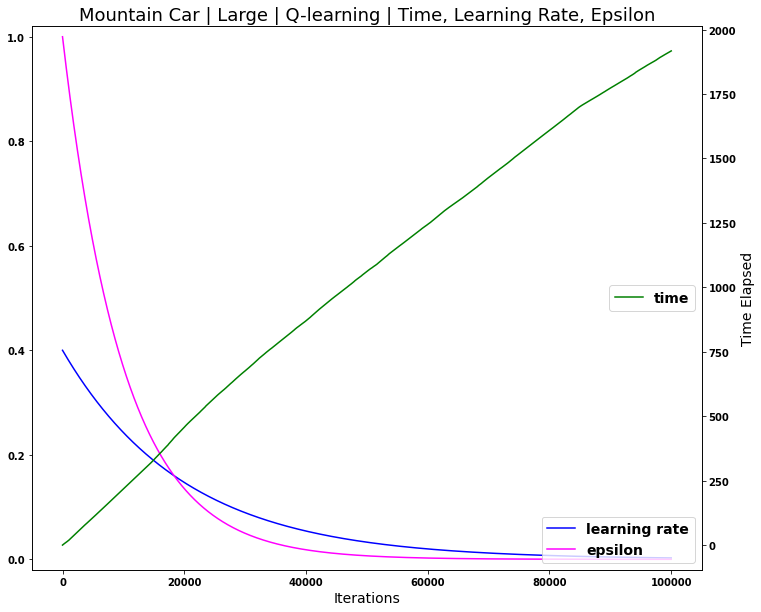

In [154]:
scores_l, scores_avg_l = mountain_car_l.Q_learning(num_episodes=100000, lr=0.4, epsilon_decay=0.9999, 
                                                   visualize=True, min_rate=0.0000001, learning_rate_decay=0.99995)

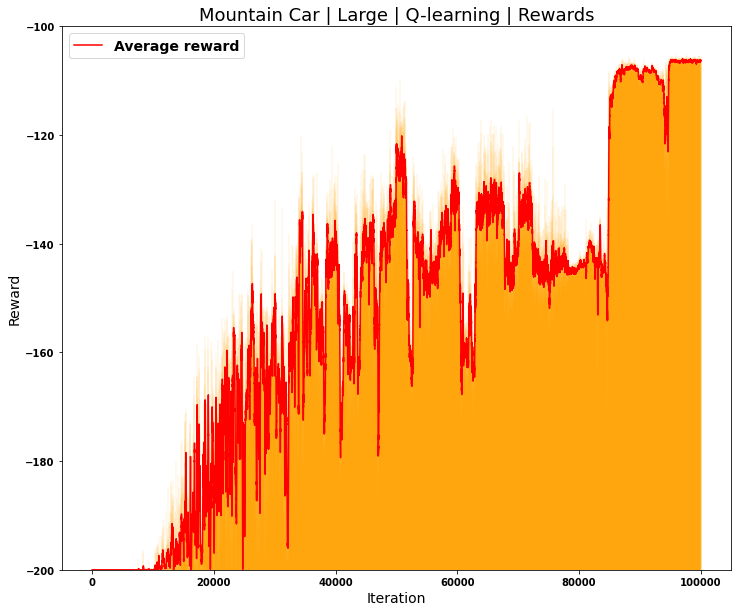

In [157]:
plot_q_curve(scores_l, scores_avg_l)

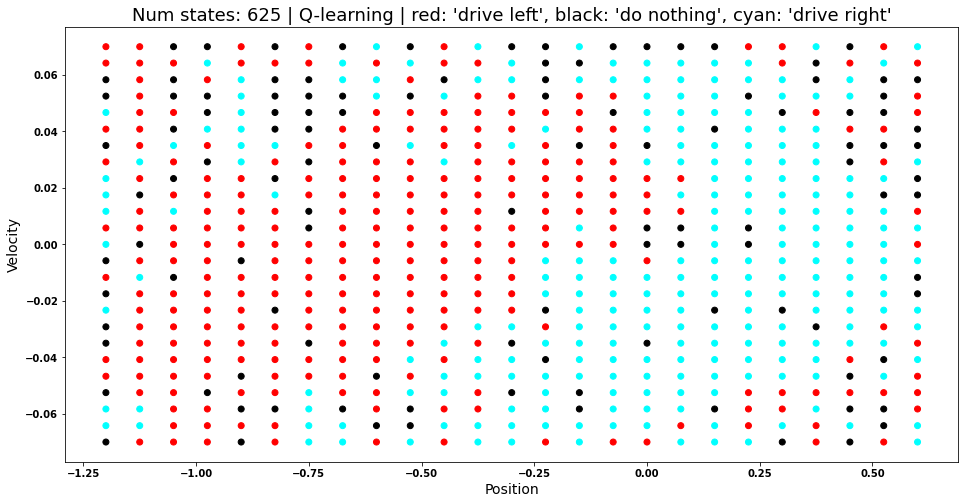

In [158]:
plot_policy_no_grid(mountain_car_l.optimal_policy, mountain_car_l.position_states, mountain_car_l.velocity_states,
                    figsize=(16,8),title="Num states: 625 | Q-learning | red: 'drive left', black: 'do nothing', cyan: 'drive right'") 

In [170]:
r = []
l = mountain_car_l
for _ in range(100):
    state = l.env.reset()
    r_tot = 0
    while True:
        #mountain_car_s.env.render()
        ind_s = to_state(state, l.discrete_states, 25)
        #ind_s = state_to_index(state, l.position_states, 
        #                       l.velocity_states, l.state_size)
        a = np.argmax(l.optimal_policy[ind_s])
        state, reward, done, _ = l.env.step(a)
        r_tot -= 1
        if done:
            r.append(r_tot)
            r_tot = 0
            break
    #mountain_car_s.env.close()
print("avg:", np.mean(r))

avg: -106.29


# More experiments

In [155]:
scores_l1 = scores_l[:]
scores_avg_l1 = scores_avg_l[:]